## Environment Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# hack - https://github.com/googlecolab/colabtools/issues/3409#issuecomment-1446281277
import locale
locale.getpreferredencoding = lambda: "UTF-8"
! pip install -Uq ipdb
import ipdb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.3 MB/s eta 0:00:00


In [3]:
# This get the RAPIDS-Colab install files and test check your GPU.  Run this and the next cell only.
# Please read the output of this cell.  If your Colab Instance is not RAPIDS compatible, it will warn you and give you remediation steps.
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
%cd rapidsai-csp-utils
!git checkout 22.12-patch
%cd ..
!python rapidsai-csp-utils/colab/env-check.py
!python rapidsai-csp-utils/colab/pip-install.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 390, done.
remote: Counting objects: 100% (121/121), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 390 (delta 89), reused 51 (delta 51), pack-reused 269
Receiving objects: 100% (390/390), 107.11 KiB | 1.98 MiB/s, done.
Resolving deltas: 100% (191/191), done.
/content/rapidsai-csp-utils
Branch '22.12-patch' set up to track remote branch '22.12-patch' from 'origin'.
Switched to a new branch '22.12-patch'
/content
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 1.5 MB/s eta 0:00:00
Traceback (most recent call last):
  File "/content/rapidsai-csp-utils/colab/env-check.py", line 26, in <module>
    gpu_name = pynvml.nvmlDeviceGetName(pynvml.nvmlDeviceGetHandleByIndex(0)).decode('UTF-8')
AttributeError: 'str' object has no attribute 'decode'. Did you mean: 'encode'?
Traceback (most recent call last):
  File "/content/rapidsai-csp-utils/colab/pip-install.py", line 26, in <module>
    gpu_name =

In [4]:
%%bash
# Install the Merlin Framework
pip install -Uq git+https://github.com/NVIDIA-Merlin/models.git@release-23.06
pip install -Uq git+https://github.com/NVIDIA-Merlin/nvtabular.git@release-23.06
pip install -Uq git+https://github.com/NVIDIA-Merlin/core.git@release-23.06
# pip install -Uq git+https://github.com/NVIDIA-Merlin/system.git@release-23.04
# pip install -Uq git+https://github.com/NVIDIA-Merlin/dataloader.git@release-23.04
pip install -Uq git+https://github.com/NVIDIA-Merlin/Transformers4Rec.git@release-23.06
# pip install -Uq xgboost lightfm implicit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.8/140.8 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.0/122.0 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.5/985.5 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 58.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 763.4/763.4 kB 61.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## Load Data
Reference
- https://github.com/NVIDIA-Merlin/models/blob/main/examples/02-Merlin-Models-and-NVTabular-integration.ipynb

In [1]:
import logging
import warnings

# Set the logging level to a higher value (e.g., CRITICAL)
logging.basicConfig(level=logging.ERROR)

warnings.filterwarnings("ignore")

In [2]:
import os
import shutil
import numpy as np
from nvtabular import ops
from merlin.schema.tags import Tags
import merlin.io
import merlin.models.tf as mm

import nvtabular as nvt
import tensorflow as tf


from os import path

# Get dataframe library - cudf or pandas
from merlin.core.dispatch import get_lib
pd = get_lib()

In [3]:
DATA_DIR = os.environ.get(
    "DATA_DIR", os.path.expanduser("/content/drive/MyDrive/ml-twotower-model/data/")
)

GIT_PROJECT = 'kchopra456/ml-model-template'

In [4]:
import glob

USE_AUGMENTED_DATASET= False
DATA_VERSION = 'v4'

_TRAIN,_VALID,_TEST = ('train_aug', 'valid_aug', 'test_aug') if USE_AUGMENTED_DATASET else ('train', 'valid', 'test')

TRAIN_PATHS = sorted(glob.glob(os.path.join(DATA_DIR, _TRAIN + f'_{DATA_VERSION}', "*.parquet")))
VALID_PATHS = sorted(glob.glob(os.path.join(DATA_DIR, _VALID + f'_{DATA_VERSION}', "*.parquet")))
TEST_PATHS = sorted(glob.glob(os.path.join(DATA_DIR, _TEST + f'_{DATA_VERSION}', "*.parquet")))

# TRAIN_PATHS = sorted(glob.glob(os.path.join(DATA_DIR, _TRAIN , "*.parquet")))
# VALID_PATHS = sorted(glob.glob(os.path.join(DATA_DIR, _VALID , "*.parquet")))
# TEST_PATHS = sorted(glob.glob(os.path.join(DATA_DIR, _TEST , "*.parquet")))
TRAIN_PATHS, VALID_PATHS, TEST_PATHS

(['/content/drive/MyDrive/ml-twotower-model/data/train_v4/part_0.parquet'],
 ['/content/drive/MyDrive/ml-twotower-model/data/valid_v4/part_0.parquet'],
 ['/content/drive/MyDrive/ml-twotower-model/data/test_v4/part_0.parquet'])

In [5]:
train = merlin.io.Dataset(
    TRAIN_PATHS, engine="parquet"
)
valid = merlin.io.Dataset(
    VALID_PATHS, engine="parquet"
)

In [6]:
schema = train.schema.select_by_tag([
    Tags.ITEM_ID,
    Tags.USER_ID,
    Tags.ITEM,
    Tags.USER,
    # Tags.TARGET,
    ])
schema

,name,tags,dtype,is_list,is_ragged,properties.num_buckets,properties.embedding_sizes.dimension,properties.embedding_sizes.cardinality,properties.freq_threshold,properties.cat_path,properties.start_index,properties.max_size,properties.domain.min,properties.domain.max,properties.domain.name,properties.value_count.min,properties.value_count.max
0,movie_id,"(Tags.ID, Tags.CATEGORICAL, Tags.ITEM)","DType(name='int64', element_type=<ElementType....",False,False,None,102.0,1665.0,0.0,.//categories/unique.movie_id.parquet,0.0,0.0,0,1664,movie_id,NaN,NaN
1,user_id,"(Tags.ID, Tags.USER, Tags.CATEGORICAL)","DType(name='int64', element_type=<ElementType....",False,False,None,74.0,944.0,0.0,.//categories/unique.user_id.parquet,0.0,0.0,0,943,user_id,NaN,NaN
2,gender,"(Tags.USER, Tags.CATEGORICAL)","DType(name='int64', element_type=<ElementType....",False,False,None,16.0,3.0,0.0,.//categories/unique.gender.parquet,0.0,0.0,0,2,gender,NaN,NaN
3,occupation,"(Tags.USER, Tags.CATEGORICAL)","DType(name='int64', element_type=<ElementType....",False,False,None,16.0,22.0,0.0,.//categories/unique.occupation.parquet,0.0,0.0,0,21,occupation,NaN,NaN
4,genres,"(Tags.CATEGORICAL, Tags.ITEM)","DType(name='int64', element_type=<ElementType....",True,True,None,16.0,20.0,0.0,.//categories/unique.genres.parquet,0.0,0.0,0,19,genres,0.0,NaN


In [7]:
# schema = schema.excluding_by_name('genres')

In [8]:
train.head()

,movie_id,movie_id_raw,user_id,gender,occupation,genres,rating
0,226,705,149,1,3,"[5, 13]",1
1,74,144,148,1,3,"[4, 3]",1
2,137,203,295,1,5,[15],1
3,9,300,761,1,3,"[4, 3]",1
4,43,25,212,2,7,[2],1


In [9]:
# missing from load
schema['movie_id'].tags._tags.add(Tags.ITEM_ID)
schema['user_id'].tags._tags.add(Tags.USER_ID)

In [10]:
# select only trainable features and exclude the target
train.schema = schema
valid.schema = schema

In [11]:
train.schema

,name,tags,dtype,is_list,is_ragged,properties.num_buckets,properties.embedding_sizes.dimension,properties.embedding_sizes.cardinality,properties.freq_threshold,properties.cat_path,properties.start_index,properties.max_size,properties.domain.min,properties.domain.max,properties.domain.name,properties.value_count.min,properties.value_count.max
0,movie_id,"(Tags.ID, Tags.ITEM_ID, Tags.CATEGORICAL, Tags...","DType(name='int64', element_type=<ElementType....",False,False,None,102.0,1665.0,0.0,.//categories/unique.movie_id.parquet,0.0,0.0,0,1664,movie_id,NaN,NaN
1,user_id,"(Tags.ID, Tags.USER_ID, Tags.USER, Tags.CATEGO...","DType(name='int64', element_type=<ElementType....",False,False,None,74.0,944.0,0.0,.//categories/unique.user_id.parquet,0.0,0.0,0,943,user_id,NaN,NaN
2,gender,"(Tags.USER, Tags.CATEGORICAL)","DType(name='int64', element_type=<ElementType....",False,False,None,16.0,3.0,0.0,.//categories/unique.gender.parquet,0.0,0.0,0,2,gender,NaN,NaN
3,occupation,"(Tags.USER, Tags.CATEGORICAL)","DType(name='int64', element_type=<ElementType....",False,False,None,16.0,22.0,0.0,.//categories/unique.occupation.parquet,0.0,0.0,0,21,occupation,NaN,NaN
4,genres,"(Tags.CATEGORICAL, Tags.ITEM)","DType(name='int64', element_type=<ElementType....",True,True,None,16.0,20.0,0.0,.//categories/unique.genres.parquet,0.0,0.0,0,19,genres,0.0,NaN


In [12]:
assert len(train.schema.select_by_tag(Tags.TARGET).column_names) == 0

## Build Model
Reference
- https://github.com/NVIDIA-Merlin/models/blob/main/examples/05-Retrieval-Model.ipynb

### Model definition

In [13]:
# collect model_helper.py
! rm model_helper.py || true
! wget --no-cache https://raw.githubusercontent.com/$GIT_PROJECT/master/model_helper.py #-O model_helper.py

--2023-09-03 11:47:58--  https://raw.githubusercontent.com/kchopra456/ml-model-template/master/model_helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10995 (11K) [text/plain]
Saving to: ‘model_helper.py’

model_helper.py     100%[===================>]  10.74K  --.-KB/s    in 0s      

2023-09-03 11:47:58 (97.7 MB/s) - ‘model_helper.py’ saved [10995/10995]



In [14]:
from model_helper import topk_metrics_aggregator
from model_helper import build_towers
from model_helper import default_plot_metrics
from model_helper import plot_metrics
from model_helper import merge_model_history
from model_helper import EvaluationCallback


In [16]:
# only define one time
if 'models' not in globals():
    models = dict()
    historys = dict()
    train_evaluation_clbks = dict()
    valid_evaluation_clbks = dict()
else:
    print('[INFO] skip redefining static variables')

[INFO] skip redefining static variables


### model_v1

In [17]:
VERSION = 'v1'

_tower_dim = [128, 128] # @param

_learning_rate = 0.01 # @param
_batch_size = 1024 * 2 # @param
_epochs = 50 # @param
_validation_batch_size = 2048 # @param
_sample_neg = _batch_size * 2 # @param
_validation_freq = 5 # @param
_loss = 'categorical_crossentropy' # @param
# _loss = 'bpr-max' # @param

_logq_sampling_correction = False # @param

embedding_dims = {
    'item': {
        'movie_id': 64,
        'genres': 8*2
    },
    'user': {
        'user_id': 64,
        'gender': 8,
        'occupation': 8*2
    }
}

In [ ]:
if VERSION in models:
    raise RuntimeError('Reusing model version: ', VERSION)

In [19]:
from merlin.models.tf.outputs.sampling.in_batch import InBatchSamplerV2

sampler = [InBatchSamplerV2(_sample_neg)]

models[VERSION] = model = build_towers(
    train,
    tower_dim=_tower_dim,
    neg_sampler=sampler,
    embedding_dims=embedding_dims,
    logq_sampling_correction=_logq_sampling_correction,
    item_categorical=Tags.CATEGORICAL
)

train_evaluation_clbks[VERSION] = EvaluationCallback(period=5, topk=100, data=train, type_='Train', schema=train.schema)
valid_evaluation_clbks[VERSION] = EvaluationCallback(period=5, topk=100, data=valid, type_='Validation', schema=train.schema)
historys[VERSION] = []

TOP_K = [100, 50, 10]
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=_learning_rate),
    run_eagerly=False,
    metrics=topk_metrics_aggregator(TOP_K),
    loss=_loss,
)

#### model

In [20]:
history = historys[VERSION]
model = models[VERSION]
train_evaluation_clbk = train_evaluation_clbks[VERSION]
valid_evaluation_clbk = valid_evaluation_clbks[VERSION]

In [21]:
# %pdb on
history.append(
    model.fit(train, validation_data=valid, batch_size=_batch_size, epochs=_epochs,
                 validation_batch_size=_validation_batch_size, validation_freq=_validation_freq,
                 callbacks=[train_evaluation_clbk,
                            valid_evaluation_clbk],
                  verbose=1)
)

Epoch 1/50
35/35 [==============================] - 40s 442ms/step - loss: 7.4656 - auc: 0.6264 - recall_at_100: 0.0734 - mrr_at_100: 0.0060 - ndcg_at_100: 0.0172 - map_at_100: 0.0060 - precision_at_100: 7.3440e-04 - recall_at_50: 0.0377 - mrr_at_50: 0.0055 - ndcg_at_50: 0.0114 - map_at_50: 0.0055 - precision_at_50: 7.5383e-04 - recall_at_10: 0.0096 - mrr_at_10: 0.0043 - ndcg_at_10: 0.0055 - map_at_10: 0.0043 - precision_at_10: 9.5819e-04 - regularization_loss: 0.0000e+00 - loss_batch: 7.3961
Epoch 2/50
35/35 [==============================] - 14s 334ms/step - loss: 7.1980 - auc: 0.7195 - recall_at_100: 0.1637 - mrr_at_100: 0.0120 - ndcg_at_100: 0.0377 - map_at_100: 0.0120 - precision_at_100: 0.0016 - recall_at_50: 0.0931 - mrr_at_50: 0.0111 - ndcg_at_50: 0.0263 - map_at_50: 0.0111 - precision_at_50: 0.0019 - recall_at_10: 0.0228 - mrr_at_10: 0.0082 - ndcg_at_10: 0.0116 - map_at_10: 0.0082 - precision_at_10: 0.0023 - regularization_loss: 0.0000e+00 - loss_batch: 7.1323
Epoch 3/50
35/35

69/69 [==============================] - 5s 18ms/step - loss: 1.4116 - auc: 0.4351 - recall_at_100: 0.3040 - mrr_at_100: 0.0194 - ndcg_at_100: 0.0677 - map_at_100: 0.0194 - precision_at_100: 0.0030 - recall_at_10: 0.0402 - mrr_at_10: 0.0122 - ndcg_at_10: 0.0186 - map_at_10: 0.0122 - precision_at_10: 0.0040 - regularization_loss: 0.0000e+00 - loss_batch: 1.4201
Candidate set rows: 943
Train dataset topk evaluation {'loss': 1.4115986824035645, 'auc': 0.4350752830505371, 'recall_at_100': 0.30534741282463074, 'mrr_at_100': 0.019562624394893646, 'ndcg_at_100': 0.06809685379266739, 'map_at_100': 0.019562624394893646, 'precision_at_100': 0.0030534740071743727, 'recall_at_10': 0.0409105159342289, 'mrr_at_10': 0.01234481856226921, 'ndcg_at_10': 0.018875306472182274, 'map_at_10': 0.01234481856226921, 'precision_at_10': 0.004091051407158375, 'regularization_loss': 0.0, 'loss_batch': 1.8250550031661987, 'coverage': 1.0, 'novelty': 0.029673683879291358}
Candidate set rows: 1387


15/15 [==============================] - 5s 31ms/step - loss: 0.9392 - auc: 0.4401 - recall_at_100: 0.1936 - mrr_at_100: 0.0082 - ndcg_at_100: 0.0389 - map_at_100: 0.0082 - precision_at_100: 0.0019 - recall_at_10: 0.0156 - mrr_at_10: 0.0037 - ndcg_at_10: 0.0064 - map_at_10: 0.0037 - precision_at_10: 0.0016 - regularization_loss: 0.0000e+00 - loss_batch: 1.0009
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.9392317533493042, 'auc': 0.44005346298217773, 'recall_at_100': 0.1994784027338028, 'mrr_at_100': 0.008846620097756386, 'ndcg_at_100': 0.04056026041507721, 'map_at_100': 0.008846620097756386, 'precision_at_100': 0.0019947837572544813, 'recall_at_10': 0.017587266862392426, 'mrr_at_10': 0.004197103902697563, 'ndcg_at_10': 0.007233300246298313, 'map_at_10': 0.004197103902697563, 'precision_at_10': 0.0017587268957868218, 'regularization_loss': 0.0, 'loss_batch': 1.6462594270706177, 'coverage': 1.0, 'novelty': 0.1493743069855853}
35/35 [==============================

69/69 [==============================] - 6s 20ms/step - loss: 1.7418 - auc: 0.4565 - recall_at_100: 0.3702 - mrr_at_100: 0.0268 - ndcg_at_100: 0.0858 - map_at_100: 0.0268 - precision_at_100: 0.0037 - recall_at_10: 0.0564 - mrr_at_10: 0.0179 - ndcg_at_10: 0.0267 - map_at_10: 0.0179 - precision_at_10: 0.0056 - regularization_loss: 0.0000e+00 - loss_batch: 1.7504
Candidate set rows: 943
Train dataset topk evaluation {'loss': 1.7418057918548584, 'auc': 0.4565114974975586, 'recall_at_100': 0.37496083974838257, 'mrr_at_100': 0.02738080732524395, 'ndcg_at_100': 0.08710438013076782, 'map_at_100': 0.02738080732524395, 'precision_at_100': 0.003749608527868986, 'recall_at_10': 0.058103758841753006, 'mrr_at_10': 0.018377035856246948, 'ndcg_at_10': 0.02748817764222622, 'map_at_10': 0.018377035856246948, 'precision_at_10': 0.005810375325381756, 'regularization_loss': 0.0, 'loss_batch': 2.157590627670288, 'coverage': 1.0, 'novelty': 0.03457505316418567}
Candidate set rows: 1387


15/15 [==============================] - 7s 31ms/step - loss: 0.9556 - auc: 0.4142 - recall_at_100: 0.1934 - mrr_at_100: 0.0076 - ndcg_at_100: 0.0382 - map_at_100: 0.0076 - precision_at_100: 0.0019 - recall_at_10: 0.0128 - mrr_at_10: 0.0031 - ndcg_at_10: 0.0053 - map_at_10: 0.0031 - precision_at_10: 0.0013 - regularization_loss: 0.0000e+00 - loss_batch: 1.0039
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.9556137919425964, 'auc': 0.4142487943172455, 'recall_at_100': 0.19707101583480835, 'mrr_at_100': 0.007745285052806139, 'ndcg_at_100': 0.038948770612478256, 'map_at_100': 0.007745285052806139, 'precision_at_100': 0.0019707102328538895, 'recall_at_10': 0.013775578700006008, 'mrr_at_10': 0.0031754521187394857, 'ndcg_at_10': 0.005571694113314152, 'map_at_10': 0.0031754521187394857, 'precision_at_10': 0.0013775578700006008, 'regularization_loss': 0.0, 'loss_batch': 1.508647084236145, 'coverage': 1.0, 'novelty': 0.1656129258868985}
35/35 [============================

69/69 [==============================] - 5s 19ms/step - loss: 1.8945 - auc: 0.4890 - recall_at_100: 0.4031 - mrr_at_100: 0.0317 - ndcg_at_100: 0.0957 - map_at_100: 0.0317 - precision_at_100: 0.0040 - recall_at_10: 0.0666 - mrr_at_10: 0.0221 - ndcg_at_10: 0.0323 - map_at_10: 0.0221 - precision_at_10: 0.0067 - regularization_loss: 0.0000e+00 - loss_batch: 1.9056
Candidate set rows: 943
Train dataset topk evaluation {'loss': 1.8944975137710571, 'auc': 0.4889791011810303, 'recall_at_100': 0.4047320485115051, 'mrr_at_100': 0.032033950090408325, 'ndcg_at_100': 0.09640742838382721, 'map_at_100': 0.032033950090408325, 'precision_at_100': 0.004047319758683443, 'recall_at_10': 0.0681319609284401, 'mrr_at_10': 0.022348662838339806, 'ndcg_at_10': 0.032865218818187714, 'map_at_10': 0.022348662838339806, 'precision_at_10': 0.006813195534050465, 'regularization_loss': 0.0, 'loss_batch': 2.4330897331237793, 'coverage': 0.9980781550288277, 'novelty': 0.03631812054689004}
Candidate set rows: 1387


15/15 [==============================] - 4s 23ms/step - loss: 0.9522 - auc: 0.4398 - recall_at_100: 0.1879 - mrr_at_100: 0.0065 - ndcg_at_100: 0.0362 - map_at_100: 0.0065 - precision_at_100: 0.0019 - recall_at_10: 0.0097 - mrr_at_10: 0.0021 - ndcg_at_10: 0.0039 - map_at_10: 0.0021 - precision_at_10: 9.7130e-04 - regularization_loss: 0.0000e+00 - loss_batch: 0.9946
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.9522467851638794, 'auc': 0.4398205578327179, 'recall_at_100': 0.19098569452762604, 'mrr_at_100': 0.006802073679864407, 'ndcg_at_100': 0.036917462944984436, 'map_at_100': 0.006802073679864407, 'precision_at_100': 0.001909857033751905, 'recall_at_10': 0.009963889606297016, 'mrr_at_10': 0.002372858813032508, 'ndcg_at_10': 0.004091642331331968, 'map_at_10': 0.002372858813032508, 'precision_at_10': 0.0009963888442143798, 'regularization_loss': 0.0, 'loss_batch': 1.4373327493667603, 'coverage': 1.0, 'novelty': 0.16821262932572245}
35/35 [=========================

69/69 [==============================] - 5s 28ms/step - loss: 2.0102 - auc: 0.5314 - recall_at_100: 0.4265 - mrr_at_100: 0.0358 - ndcg_at_100: 0.1037 - map_at_100: 0.0358 - precision_at_100: 0.0043 - recall_at_10: 0.0783 - mrr_at_10: 0.0256 - ndcg_at_10: 0.0377 - map_at_10: 0.0256 - precision_at_10: 0.0078 - regularization_loss: 0.0000e+00 - loss_batch: 2.0242
Candidate set rows: 943
Train dataset topk evaluation {'loss': 2.0101916790008545, 'auc': 0.5314323306083679, 'recall_at_100': 0.4294179677963257, 'mrr_at_100': 0.03636771813035011, 'ndcg_at_100': 0.10476049035787582, 'map_at_100': 0.03636771813035011, 'precision_at_100': 0.004294179379940033, 'recall_at_10': 0.07905757427215576, 'mrr_at_10': 0.02606891095638275, 'ndcg_at_10': 0.03823750093579292, 'map_at_10': 0.02606891095638275, 'precision_at_10': 0.007905757986009121, 'regularization_loss': 0.0, 'loss_batch': 2.6882760524749756, 'coverage': 0.9987187700192185, 'novelty': 0.03550184474060688}
Candidate set rows: 1387


15/15 [==============================] - 3s 22ms/step - loss: 0.9366 - auc: 0.4565 - recall_at_100: 0.1744 - mrr_at_100: 0.0057 - ndcg_at_100: 0.0332 - map_at_100: 0.0057 - precision_at_100: 0.0017 - recall_at_10: 0.0077 - mrr_at_10: 0.0017 - ndcg_at_10: 0.0030 - map_at_10: 0.0017 - precision_at_10: 7.6503e-04 - regularization_loss: 0.0000e+00 - loss_batch: 0.9850
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.9366077184677124, 'auc': 0.4564875364303589, 'recall_at_100': 0.18456600606441498, 'mrr_at_100': 0.006197926122695208, 'ndcg_at_100': 0.03526155650615692, 'map_at_100': 0.006197926122695208, 'precision_at_100': 0.0018456598045304418, 'recall_at_10': 0.00936204381287098, 'mrr_at_10': 0.0019779177382588387, 'ndcg_at_10': 0.003645944409072399, 'map_at_10': 0.0019779177382588387, 'precision_at_10': 0.000936204451136291, 'regularization_loss': 0.0, 'loss_batch': 1.491289734840393, 'coverage': 0.9992790194664743, 'novelty': 0.16289514596648816}
35/35 [===========

69/69 [==============================] - 6s 18ms/step - loss: 2.0419 - auc: 0.5541 - recall_at_100: 0.4350 - mrr_at_100: 0.0381 - ndcg_at_100: 0.1075 - map_at_100: 0.0381 - precision_at_100: 0.0043 - recall_at_10: 0.0847 - mrr_at_10: 0.0276 - ndcg_at_10: 0.0407 - map_at_10: 0.0276 - precision_at_10: 0.0085 - regularization_loss: 0.0000e+00 - loss_batch: 2.0560
Candidate set rows: 943
Train dataset topk evaluation {'loss': 2.041949510574341, 'auc': 0.5540745854377747, 'recall_at_100': 0.43327826261520386, 'mrr_at_100': 0.03812464326620102, 'ndcg_at_100': 0.10728941112756729, 'map_at_100': 0.03812464326620102, 'precision_at_100': 0.00433278176933527, 'recall_at_10': 0.08434232324361801, 'mrr_at_10': 0.027662569656968117, 'ndcg_at_10': 0.040684279054403305, 'map_at_10': 0.027662569656968117, 'precision_at_10': 0.008434231393039227, 'regularization_loss': 0.0, 'loss_batch': 2.725172281265259, 'coverage': 0.9993593850096092, 'novelty': 0.04279361045561808}
Candidate set rows: 1387


15/15 [==============================] - 4s 20ms/step - loss: 0.9576 - auc: 0.4860 - recall_at_100: 0.1808 - mrr_at_100: 0.0056 - ndcg_at_100: 0.0341 - map_at_100: 0.0056 - precision_at_100: 0.0018 - recall_at_10: 0.0075 - mrr_at_10: 0.0014 - ndcg_at_10: 0.0028 - map_at_10: 0.0014 - precision_at_10: 7.5134e-04 - regularization_loss: 0.0000e+00 - loss_batch: 1.0057
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.9575940370559692, 'auc': 0.48598650097846985, 'recall_at_100': 0.18556907773017883, 'mrr_at_100': 0.005777826067060232, 'ndcg_at_100': 0.035042621195316315, 'map_at_100': 0.005777826067060232, 'precision_at_100': 0.0018556907307356596, 'recall_at_10': 0.007422762922942638, 'mrr_at_10': 0.0014531866181641817, 'ndcg_at_10': 0.0027952820528298616, 'map_at_10': 0.0014531866181641817, 'precision_at_10': 0.0007422762573696673, 'regularization_loss': 0.0, 'loss_batch': 1.509317398071289, 'coverage': 1.0, 'novelty': 0.17914133738601823}
35/35 [=====================

69/69 [==============================] - 6s 29ms/step - loss: 2.1505 - auc: 0.5838 - recall_at_100: 0.4529 - mrr_at_100: 0.0399 - ndcg_at_100: 0.1123 - map_at_100: 0.0399 - precision_at_100: 0.0045 - recall_at_10: 0.0880 - mrr_at_10: 0.0288 - ndcg_at_10: 0.0424 - map_at_10: 0.0288 - precision_at_10: 0.0088 - regularization_loss: 0.0000e+00 - loss_batch: 2.1639
Candidate set rows: 943
Train dataset topk evaluation {'loss': 2.150468349456787, 'auc': 0.5837537050247192, 'recall_at_100': 0.4563402831554413, 'mrr_at_100': 0.040278784930706024, 'ndcg_at_100': 0.11321908235549927, 'map_at_100': 0.040278784930706024, 'precision_at_100': 0.004563402384519577, 'recall_at_10': 0.08892908692359924, 'mrr_at_10': 0.029146011918783188, 'ndcg_at_10': 0.04290051758289337, 'map_at_10': 0.029146011918783188, 'precision_at_10': 0.008892906829714775, 'regularization_loss': 0.0, 'loss_batch': 2.8030009269714355, 'coverage': 0.9993593850096092, 'novelty': 0.04445596831981897}
Candidate set rows: 1387


15/15 [==============================] - 4s 20ms/step - loss: 0.9345 - auc: 0.5331 - recall_at_100: 0.1786 - mrr_at_100: 0.0058 - ndcg_at_100: 0.0338 - map_at_100: 0.0058 - precision_at_100: 0.0018 - recall_at_10: 0.0078 - mrr_at_10: 0.0018 - ndcg_at_10: 0.0032 - map_at_10: 0.0018 - precision_at_10: 7.8090e-04 - regularization_loss: 0.0000e+00 - loss_batch: 0.9716
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.9344897866249084, 'auc': 0.5330910086631775, 'recall_at_100': 0.18048682808876038, 'mrr_at_100': 0.005904346704483032, 'ndcg_at_100': 0.03425811976194382, 'map_at_100': 0.005904346704483032, 'precision_at_100': 0.0018048681085929275, 'recall_at_10': 0.008158352226018906, 'mrr_at_10': 0.0018422899302095175, 'ndcg_at_10': 0.0032480256631970406, 'map_at_10': 0.0018422899302095175, 'precision_at_10': 0.0008158352575264871, 'regularization_loss': 0.0, 'loss_batch': 1.360236406326294, 'coverage': 1.0, 'novelty': 0.17812618058179072}
35/35 [=======================

69/69 [==============================] - 4s 19ms/step - loss: 2.2120 - auc: 0.5947 - recall_at_100: 0.4690 - mrr_at_100: 0.0411 - ndcg_at_100: 0.1162 - map_at_100: 0.0411 - precision_at_100: 0.0047 - recall_at_10: 0.0916 - mrr_at_10: 0.0297 - ndcg_at_10: 0.0439 - map_at_10: 0.0297 - precision_at_10: 0.0092 - regularization_loss: 0.0000e+00 - loss_batch: 2.2257
Candidate set rows: 943
Train dataset topk evaluation {'loss': 2.211961507797241, 'auc': 0.5947422385215759, 'recall_at_100': 0.4692173898220062, 'mrr_at_100': 0.041653890162706375, 'ndcg_at_100': 0.11665604263544083, 'map_at_100': 0.041653890162706375, 'precision_at_100': 0.00469217449426651, 'recall_at_10': 0.09219110757112503, 'mrr_at_10': 0.030214406549930573, 'ndcg_at_10': 0.044468216598033905, 'map_at_10': 0.030214406549930573, 'precision_at_10': 0.009219110012054443, 'regularization_loss': 0.0, 'loss_batch': 2.8768911361694336, 'coverage': 1.0, 'novelty': 0.04058357720778103}
Candidate set rows: 1387


15/15 [==============================] - 3s 22ms/step - loss: 0.9705 - auc: 0.5720 - recall_at_100: 0.1862 - mrr_at_100: 0.0054 - ndcg_at_100: 0.0347 - map_at_100: 0.0054 - precision_at_100: 0.0019 - recall_at_10: 0.0071 - mrr_at_10: 0.0013 - ndcg_at_10: 0.0026 - map_at_10: 0.0013 - precision_at_10: 7.1135e-04 - regularization_loss: 0.0000e+00 - loss_batch: 1.0002
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.9704582095146179, 'auc': 0.5720192193984985, 'recall_at_100': 0.18563595414161682, 'mrr_at_100': 0.005588837433606386, 'ndcg_at_100': 0.03479614108800888, 'map_at_100': 0.005588837433606386, 'precision_at_100': 0.0018563595367595553, 'recall_at_10': 0.007355891168117523, 'mrr_at_10': 0.001354577369056642, 'ndcg_at_10': 0.0026885566767305136, 'map_at_10': 0.001354577369056642, 'precision_at_10': 0.0007355891284532845, 'regularization_loss': 0.0, 'loss_batch': 1.3114571571350098, 'coverage': 1.0, 'novelty': 0.17385693215339232}
35/35 [========================

69/69 [==============================] - 5s 19ms/step - loss: 2.2373 - auc: 0.6135 - recall_at_100: 0.4732 - mrr_at_100: 0.0428 - ndcg_at_100: 0.1184 - map_at_100: 0.0428 - precision_at_100: 0.0047 - recall_at_10: 0.0954 - mrr_at_10: 0.0313 - ndcg_at_10: 0.0460 - map_at_10: 0.0313 - precision_at_10: 0.0095 - regularization_loss: 0.0000e+00 - loss_batch: 2.2516
Candidate set rows: 943
Train dataset topk evaluation {'loss': 2.237257480621338, 'auc': 0.6135204434394836, 'recall_at_100': 0.47699496150016785, 'mrr_at_100': 0.04295248165726662, 'ndcg_at_100': 0.11928920447826385, 'map_at_100': 0.04295248165726662, 'precision_at_100': 0.004769949242472649, 'recall_at_10': 0.09610836952924728, 'mrr_at_10': 0.03129086270928383, 'ndcg_at_10': 0.04619325324892998, 'map_at_10': 0.03129086270928383, 'precision_at_10': 0.009610837325453758, 'regularization_loss': 0.0, 'loss_batch': 2.9327635765075684, 'coverage': 1.0, 'novelty': 0.03912376052773514}
Candidate set rows: 1387


15/15 [==============================] - 3s 20ms/step - loss: 0.9264 - auc: 0.5997 - recall_at_100: 0.1716 - mrr_at_100: 0.0049 - ndcg_at_100: 0.0318 - map_at_100: 0.0049 - precision_at_100: 0.0017 - recall_at_10: 0.0050 - mrr_at_10: 0.0010 - ndcg_at_10: 0.0019 - map_at_10: 0.0010 - precision_at_10: 4.9550e-04 - regularization_loss: 0.0000e+00 - loss_batch: 0.9678
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.9264164566993713, 'auc': 0.5996909737586975, 'recall_at_100': 0.1770094931125641, 'mrr_at_100': 0.005105356685817242, 'ndcg_at_100': 0.03287111595273018, 'map_at_100': 0.005105356685817242, 'precision_at_100': 0.0017700947355479002, 'recall_at_10': 0.005617226008325815, 'mrr_at_10': 0.0010727872140705585, 'ndcg_at_10': 0.0020878207869827747, 'map_at_10': 0.0010727872140705585, 'precision_at_10': 0.0005617226706817746, 'regularization_loss': 0.0, 'loss_batch': 1.4009929895401, 'coverage': 1.0, 'novelty': 0.1695433297375045}
35/35 [===========================

69/69 [==============================] - 6s 18ms/step - loss: 2.2787 - auc: 0.6277 - recall_at_100: 0.4808 - mrr_at_100: 0.0434 - ndcg_at_100: 0.1206 - map_at_100: 0.0434 - precision_at_100: 0.0048 - recall_at_10: 0.0982 - mrr_at_10: 0.0316 - ndcg_at_10: 0.0469 - map_at_10: 0.0316 - precision_at_10: 0.0098 - regularization_loss: 0.0000e+00 - loss_batch: 2.2903
Candidate set rows: 943
Train dataset topk evaluation {'loss': 2.2786617279052734, 'auc': 0.6277113556861877, 'recall_at_100': 0.48643913865089417, 'mrr_at_100': 0.04431861266493797, 'ndcg_at_100': 0.12231932580471039, 'map_at_100': 0.04431861266493797, 'precision_at_100': 0.004864391405135393, 'recall_at_10': 0.10032477974891663, 'mrr_at_10': 0.03235705569386482, 'ndcg_at_10': 0.04798385500907898, 'map_at_10': 0.03235705569386482, 'precision_at_10': 0.010032477788627148, 'regularization_loss': 0.0, 'loss_batch': 2.8416831493377686, 'coverage': 0.9993593850096092, 'novelty': 0.03824781991482458}
Candidate set rows: 1387


15/15 [==============================] - 3s 23ms/step - loss: 0.9727 - auc: 0.6269 - recall_at_100: 0.1800 - mrr_at_100: 0.0052 - ndcg_at_100: 0.0335 - map_at_100: 0.0052 - precision_at_100: 0.0018 - recall_at_10: 0.0054 - mrr_at_10: 0.0011 - ndcg_at_10: 0.0020 - map_at_10: 0.0011 - precision_at_10: 5.4315e-04 - regularization_loss: 0.0000e+00 - loss_batch: 1.0070
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.9726698398590088, 'auc': 0.6269198656082153, 'recall_at_100': 0.1858365684747696, 'mrr_at_100': 0.00550554133951664, 'ndcg_at_100': 0.03471415117383003, 'map_at_100': 0.00550554133951664, 'precision_at_100': 0.001858365605585277, 'recall_at_10': 0.006085328292101622, 'mrr_at_10': 0.001221099286340177, 'ndcg_at_10': 0.002307097427546978, 'map_at_10': 0.001221099286340177, 'precision_at_10': 0.0006085329223424196, 'regularization_loss': 0.0, 'loss_batch': 1.36625075340271, 'coverage': 1.0, 'novelty': 0.16163866986630102}
35/35 [==============================]

69/69 [==============================] - 4s 19ms/step - loss: 2.2863 - auc: 0.6302 - recall_at_100: 0.4830 - mrr_at_100: 0.0426 - ndcg_at_100: 0.1200 - map_at_100: 0.0426 - precision_at_100: 0.0048 - recall_at_10: 0.0940 - mrr_at_10: 0.0306 - ndcg_at_10: 0.0452 - map_at_10: 0.0306 - precision_at_10: 0.0094 - regularization_loss: 0.0000e+00 - loss_batch: 2.2999
Candidate set rows: 943
Train dataset topk evaluation {'loss': 2.2863054275512695, 'auc': 0.6302329897880554, 'recall_at_100': 0.4825930893421173, 'mrr_at_100': 0.04372122138738632, 'ndcg_at_100': 0.12097881734371185, 'map_at_100': 0.04372122138738632, 'precision_at_100': 0.004825929645448923, 'recall_at_10': 0.09767527878284454, 'mrr_at_10': 0.03187732771039009, 'ndcg_at_10': 0.0470026358962059, 'map_at_10': 0.03187732771039009, 'precision_at_10': 0.00976752769201994, 'regularization_loss': 0.0, 'loss_batch': 2.946545124053955, 'coverage': 1.0, 'novelty': 0.04414794007490637}
Candidate set rows: 1387


15/15 [==============================] - 4s 30ms/step - loss: 0.9612 - auc: 0.6345 - recall_at_100: 0.1765 - mrr_at_100: 0.0049 - ndcg_at_100: 0.0325 - map_at_100: 0.0049 - precision_at_100: 0.0018 - recall_at_10: 0.0052 - mrr_at_10: 9.4729e-04 - ndcg_at_10: 0.0019 - map_at_10: 9.4729e-04 - precision_at_10: 5.1563e-04 - regularization_loss: 0.0000e+00 - loss_batch: 0.9980
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.9611834287643433, 'auc': 0.6344826817512512, 'recall_at_100': 0.1804199516773224, 'mrr_at_100': 0.005052740685641766, 'ndcg_at_100': 0.033316414803266525, 'map_at_100': 0.005052740685641766, 'precision_at_100': 0.0018041996518149972, 'recall_at_10': 0.005349738989025354, 'mrr_at_10': 0.001007348415441811, 'ndcg_at_10': 0.0019739544950425625, 'map_at_10': 0.001007348415441811, 'precision_at_10': 0.0005349739803932607, 'regularization_loss': 0.0, 'loss_batch': 1.3832210302352905, 'coverage': 1.0, 'novelty': 0.1727106227106227}
35/35 [=================

#### analysis

In [22]:
history = historys[VERSION]
model = models[VERSION]
train_evaluation_clbk = train_evaluation_clbks[VERSION]
valid_evaluation_clbk = valid_evaluation_clbks[VERSION]

Plot for model v1


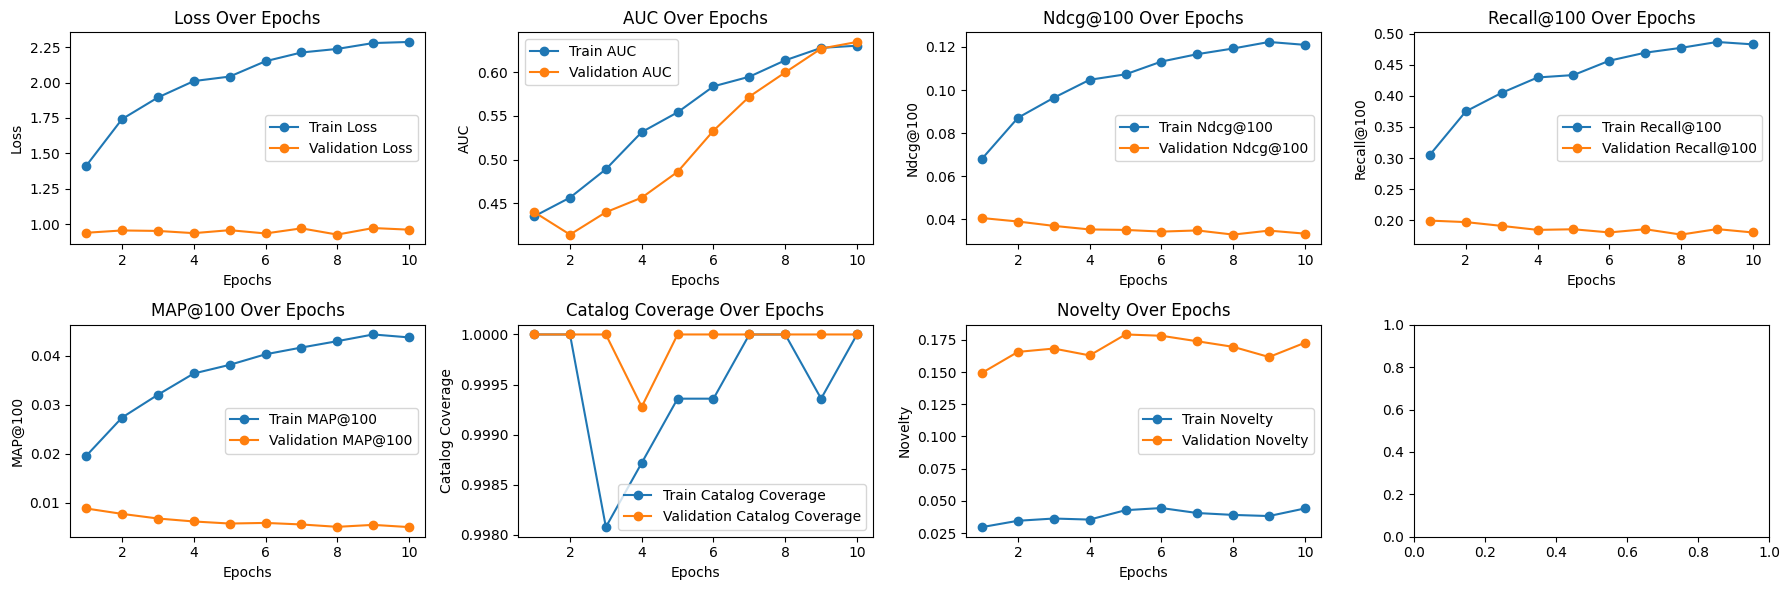

In [23]:
_history = train_evaluation_clbk.get_records()
_history_val = valid_evaluation_clbk.get_records()
AUC_TERM = [k for k in _history if k.startswith('auc')][0]
_metrics  = {
    'Loss': 'loss',
    'AUC': AUC_TERM,
    'Ndcg@100': 'ndcg_at_100',
    'Recall@100': 'recall_at_100',
    'MAP@100':'map_at_100',
    'Catalog Coverage': 'coverage',
    'Novelty':'novelty'
}
print('Plot for model', VERSION)
plot_metrics(_history, _history_val, _metrics)


Plot for model v10


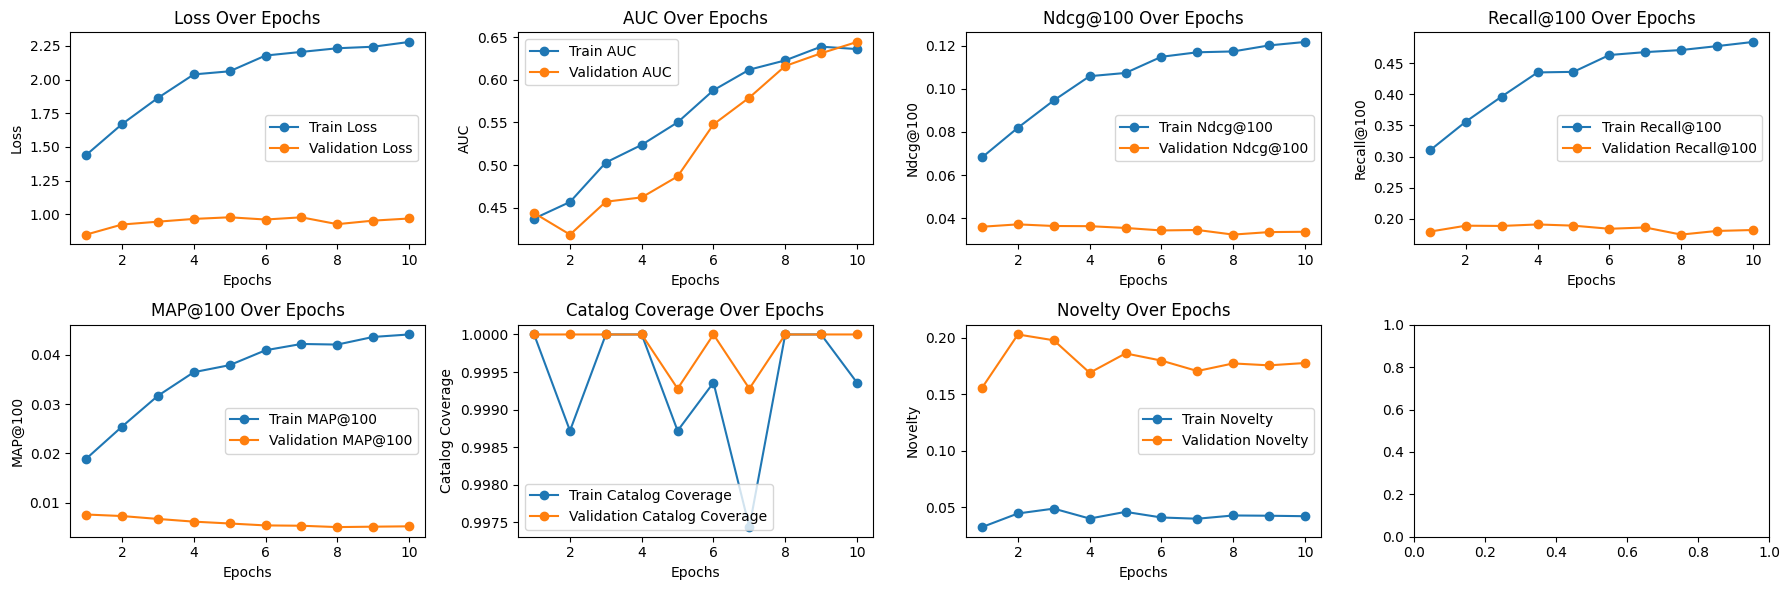

In [24]:
_history = train_evaluation_clbk.get_records()
_history_val = valid_evaluation_clbk.get_records()
AUC_TERM = [k for k in _history if k.startswith('auc')][0]
_metrics  = {
    'Loss': 'loss',
    'AUC': AUC_TERM,
    'Ndcg@100': 'ndcg_at_100',
    'Recall@100': 'recall_at_100',
    'MAP@100':'map_at_100',
    'Catalog Coverage': 'coverage',
    'Novelty':'novelty'
}
print('Plot for model', VERSION)
plot_metrics(_history, _history_val, _metrics)


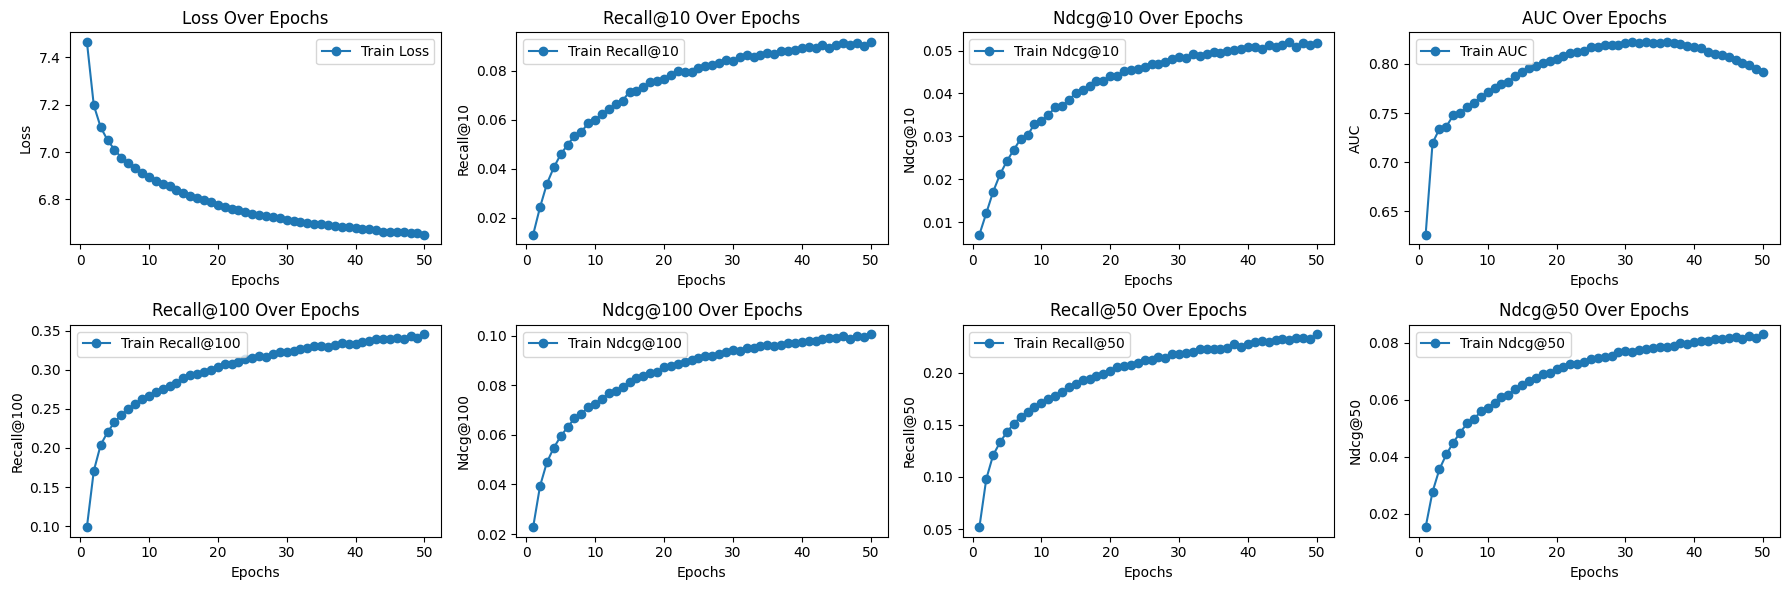

In [24]:
_history = merge_model_history(*history)
# AUC_TERM = [k for k in _history if k.startswith('auc')][0]
METRIC_AT = {'@'.join([k.split('_')[0].title(), k.split('_')[-1]]):k for k in _history if k.startswith('recall') or k.startswith('ndcg')}
val_history = { k[4:]:v for k,v in _history.items() if k.startswith('val')}
plot_metrics(_history, None, default_plot_metrics | {'AUC': 'auc', **METRIC_AT,})
# {'AUC': AUC_TERM, 'Recall@100': 'recall_at_100','NDCG@10': 'ndcg_at_10',}

### model_v2

In [25]:
VERSION = 'v2'

_tower_dim = [256, 128] # @param

_learning_rate = 0.01 # @param
_batch_size = 1024 * 2 # @param
_epochs = 50 # @param
_validation_batch_size = 2048 # @param
_sample_neg = _batch_size * 2 # @param
_validation_freq = 5 # @param
_loss = 'categorical_crossentropy' # @param
# _loss = 'bpr-max' # @param

_logq_sampling_correction = False # @param

embedding_dims = {
    'item': {
        'movie_id': 64,
        'genres': 8*2
    },
    'user': {
        'user_id': 64,
        'gender': 8,
        'occupation': 8*2
    }
}

In [26]:
if VERSION in models:
    raise RuntimeError('Reusing model version: ', VERSION)

In [27]:
from merlin.models.tf.outputs.sampling.in_batch import InBatchSamplerV2

sampler = [InBatchSamplerV2(_sample_neg)]

models[VERSION] = model = build_towers(
    train,
    tower_dim=_tower_dim,
    neg_sampler=sampler,
    embedding_dims=embedding_dims,
    logq_sampling_correction=_logq_sampling_correction,
    item_categorical=Tags.CATEGORICAL
)

train_evaluation_clbks[VERSION] = EvaluationCallback(period=5, topk=100, data=train, type_='Train', schema=train.schema)
valid_evaluation_clbks[VERSION] = EvaluationCallback(period=5, topk=100, data=valid, type_='Validation', schema=train.schema)
historys[VERSION] = []

TOP_K = [100, 50, 10]
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=_learning_rate),
    run_eagerly=False,
    metrics=topk_metrics_aggregator(TOP_K),
    loss=_loss,
)

#### model

In [28]:
history = historys[VERSION]
model = models[VERSION]
train_evaluation_clbk = train_evaluation_clbks[VERSION]
valid_evaluation_clbk = valid_evaluation_clbks[VERSION]

In [29]:
# %pdb on
history.append(
    model.fit(train, validation_data=valid, batch_size=_batch_size, epochs=_epochs,
                 validation_batch_size=_validation_batch_size, validation_freq=_validation_freq,
                 callbacks=[train_evaluation_clbk,
                            valid_evaluation_clbk],
                  verbose=1)
)

Epoch 1/50
35/35 [==============================] - 23s 306ms/step - loss: 7.4517 - auc: 0.6313 - recall_at_100: 0.0766 - mrr_at_100: 0.0057 - ndcg_at_100: 0.0175 - map_at_100: 0.0057 - precision_at_100: 7.6571e-04 - recall_at_50: 0.0395 - mrr_at_50: 0.0051 - ndcg_at_50: 0.0115 - map_at_50: 0.0051 - precision_at_50: 7.8982e-04 - recall_at_10: 0.0093 - mrr_at_10: 0.0039 - ndcg_at_10: 0.0052 - map_at_10: 0.0039 - precision_at_10: 9.3371e-04 - regularization_loss: 0.0000e+00 - loss_batch: 7.3834
Epoch 2/50
35/35 [==============================] - 5s 121ms/step - loss: 7.2022 - auc: 0.7072 - recall_at_100: 0.1650 - mrr_at_100: 0.0122 - ndcg_at_100: 0.0380 - map_at_100: 0.0122 - precision_at_100: 0.0016 - recall_at_50: 0.0909 - mrr_at_50: 0.0112 - ndcg_at_50: 0.0260 - map_at_50: 0.0112 - precision_at_50: 0.0018 - recall_at_10: 0.0224 - mrr_at_10: 0.0084 - ndcg_at_10: 0.0116 - map_at_10: 0.0084 - precision_at_10: 0.0022 - regularization_loss: 0.0000e+00 - loss_batch: 7.1369
Epoch 3/50
35/35 

69/69 [==============================] - 5s 17ms/step - loss: 1.4507 - auc: 0.4344 - recall_at_100: 0.3137 - mrr_at_100: 0.0204 - ndcg_at_100: 0.0703 - map_at_100: 0.0204 - precision_at_100: 0.0031 - recall_at_10: 0.0414 - mrr_at_10: 0.0128 - ndcg_at_10: 0.0193 - map_at_10: 0.0128 - precision_at_10: 0.0041 - regularization_loss: 0.0000e+00 - loss_batch: 1.4570
Candidate set rows: 943
Train dataset topk evaluation {'loss': 1.450700283050537, 'auc': 0.43444398045539856, 'recall_at_100': 0.31433576345443726, 'mrr_at_100': 0.0207695122808218, 'ndcg_at_100': 0.07076311111450195, 'map_at_100': 0.0207695122808218, 'precision_at_100': 0.0031433573458343744, 'recall_at_10': 0.04277655854821205, 'mrr_at_10': 0.013233664445579052, 'ndcg_at_10': 0.01998930796980858, 'map_at_10': 0.013233664445579052, 'precision_at_10': 0.0042776563204824924, 'regularization_loss': 0.0, 'loss_batch': 1.7555452585220337, 'coverage': 1.0, 'novelty': 0.022699918155120118}
Candidate set rows: 1387


15/15 [==============================] - 4s 20ms/step - loss: 0.9246 - auc: 0.4292 - recall_at_100: 0.1947 - mrr_at_100: 0.0087 - ndcg_at_100: 0.0394 - map_at_100: 0.0087 - precision_at_100: 0.0019 - recall_at_10: 0.0154 - mrr_at_10: 0.0042 - ndcg_at_10: 0.0068 - map_at_10: 0.0042 - precision_at_10: 0.0015 - regularization_loss: 0.0000e+00 - loss_batch: 0.9862
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.9245553612709045, 'auc': 0.4292261302471161, 'recall_at_100': 0.19593419134616852, 'mrr_at_100': 0.009524035267531872, 'ndcg_at_100': 0.040457285940647125, 'map_at_100': 0.009524035267531872, 'precision_at_100': 0.001959341811016202, 'recall_at_10': 0.017520396038889885, 'mrr_at_10': 0.005000042263418436, 'ndcg_at_10': 0.007850210182368755, 'map_at_10': 0.005000042263418436, 'precision_at_10': 0.0017520396504551172, 'regularization_loss': 0.0, 'loss_batch': 1.630541205406189, 'coverage': 1.0, 'novelty': 0.12573333333333334}
35/35 [==============================

69/69 [==============================] - 4s 18ms/step - loss: 1.6729 - auc: 0.4487 - recall_at_100: 0.3586 - mrr_at_100: 0.0256 - ndcg_at_100: 0.0827 - map_at_100: 0.0256 - precision_at_100: 0.0036 - recall_at_10: 0.0530 - mrr_at_10: 0.0170 - ndcg_at_10: 0.0253 - map_at_10: 0.0170 - precision_at_10: 0.0053 - regularization_loss: 0.0000e+00 - loss_batch: 1.6825
Candidate set rows: 943
Train dataset topk evaluation {'loss': 1.6728544235229492, 'auc': 0.44870725274086, 'recall_at_100': 0.3584086000919342, 'mrr_at_100': 0.026279762387275696, 'ndcg_at_100': 0.08320248126983643, 'map_at_100': 0.026279762387275696, 'precision_at_100': 0.0035840854980051517, 'recall_at_10': 0.054656561464071274, 'mrr_at_10': 0.01773594319820404, 'ndcg_at_10': 0.026210462674498558, 'map_at_10': 0.01773594319820404, 'precision_at_10': 0.005465656518936157, 'regularization_loss': 0.0, 'loss_batch': 2.1417653560638428, 'coverage': 0.9993593850096092, 'novelty': 0.04061329083939877}
Candidate set rows: 1387


15/15 [==============================] - 5s 32ms/step - loss: 0.9159 - auc: 0.4032 - recall_at_100: 0.1833 - mrr_at_100: 0.0073 - ndcg_at_100: 0.0362 - map_at_100: 0.0073 - precision_at_100: 0.0018 - recall_at_10: 0.0124 - mrr_at_10: 0.0031 - ndcg_at_10: 0.0052 - map_at_10: 0.0031 - precision_at_10: 0.0012 - regularization_loss: 0.0000e+00 - loss_batch: 0.9811
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.9158834218978882, 'auc': 0.4032352566719055, 'recall_at_100': 0.1878427118062973, 'mrr_at_100': 0.007594686467200518, 'ndcg_at_100': 0.03722952678799629, 'map_at_100': 0.007594686467200518, 'precision_at_100': 0.001878427225165069, 'recall_at_10': 0.013374348171055317, 'mrr_at_10': 0.0033344055991619825, 'ndcg_at_10': 0.005608723033219576, 'map_at_10': 0.0033344055991619825, 'precision_at_10': 0.0013374347472563386, 'regularization_loss': 0.0, 'loss_batch': 1.6625498533248901, 'coverage': 1.0, 'novelty': 0.19062057812815847}
35/35 [=============================

69/69 [==============================] - 5s 18ms/step - loss: 1.8795 - auc: 0.5062 - recall_at_100: 0.3992 - mrr_at_100: 0.0309 - ndcg_at_100: 0.0943 - map_at_100: 0.0309 - precision_at_100: 0.0040 - recall_at_10: 0.0655 - mrr_at_10: 0.0214 - ndcg_at_10: 0.0315 - map_at_10: 0.0214 - precision_at_10: 0.0066 - regularization_loss: 0.0000e+00 - loss_batch: 1.8904
Candidate set rows: 943
Train dataset topk evaluation {'loss': 1.8794608116149902, 'auc': 0.5061850547790527, 'recall_at_100': 0.4013561010360718, 'mrr_at_100': 0.0323757641017437, 'ndcg_at_100': 0.09608624875545502, 'map_at_100': 0.0323757641017437, 'precision_at_100': 0.004013560246676207, 'recall_at_10': 0.06861627846956253, 'mrr_at_10': 0.02285512536764145, 'ndcg_at_10': 0.033364225178956985, 'map_at_10': 0.02285512536764145, 'precision_at_10': 0.006861627567559481, 'regularization_loss': 0.0, 'loss_batch': 2.412325620651245, 'coverage': 0.9993593850096092, 'novelty': 0.041123370110330994}
Candidate set rows: 1387


15/15 [==============================] - 4s 32ms/step - loss: 0.9345 - auc: 0.4520 - recall_at_100: 0.1789 - mrr_at_100: 0.0062 - ndcg_at_100: 0.0344 - map_at_100: 0.0062 - precision_at_100: 0.0018 - recall_at_10: 0.0101 - mrr_at_10: 0.0021 - ndcg_at_10: 0.0039 - map_at_10: 0.0021 - precision_at_10: 0.0010 - regularization_loss: 0.0000e+00 - loss_batch: 0.9940
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.9345437288284302, 'auc': 0.45196041464805603, 'recall_at_100': 0.18704025447368622, 'mrr_at_100': 0.006452036090195179, 'ndcg_at_100': 0.03593546524643898, 'map_at_100': 0.006452036090195179, 'precision_at_100': 0.0018704024842008948, 'recall_at_10': 0.010030761361122131, 'mrr_at_10': 0.0021426023449748755, 'ndcg_at_10': 0.003915715496987104, 'map_at_10': 0.0021426023449748755, 'precision_at_10': 0.0010030760895460844, 'regularization_loss': 0.0, 'loss_batch': 1.6155928373336792, 'coverage': 1.0, 'novelty': 0.17456497593483894}
35/35 [==========================

69/69 [==============================] - 5s 17ms/step - loss: 2.0096 - auc: 0.5184 - recall_at_100: 0.4251 - mrr_at_100: 0.0364 - ndcg_at_100: 0.1042 - map_at_100: 0.0364 - precision_at_100: 0.0043 - recall_at_10: 0.0789 - mrr_at_10: 0.0262 - ndcg_at_10: 0.0383 - map_at_10: 0.0262 - precision_at_10: 0.0079 - regularization_loss: 0.0000e+00 - loss_batch: 2.0228
Candidate set rows: 943
Train dataset topk evaluation {'loss': 2.0096468925476074, 'auc': 0.5183697938919067, 'recall_at_100': 0.42772287130355835, 'mrr_at_100': 0.036867912858724594, 'ndcg_at_100': 0.10496245324611664, 'map_at_100': 0.036867912858724594, 'precision_at_100': 0.004277228843420744, 'recall_at_10': 0.07910031080245972, 'mrr_at_10': 0.026545757427811623, 'ndcg_at_10': 0.0386384017765522, 'map_at_10': 0.026545757427811623, 'precision_at_10': 0.007910029962658882, 'regularization_loss': 0.0, 'loss_batch': 2.6494081020355225, 'coverage': 1.0, 'novelty': 0.037933947463695245}
Candidate set rows: 1387


15/15 [==============================] - 3s 20ms/step - loss: 0.9382 - auc: 0.4633 - recall_at_100: 0.1798 - mrr_at_100: 0.0056 - ndcg_at_100: 0.0339 - map_at_100: 0.0056 - precision_at_100: 0.0018 - recall_at_10: 0.0078 - mrr_at_10: 0.0016 - ndcg_at_10: 0.0029 - map_at_10: 0.0016 - precision_at_10: 7.8152e-04 - regularization_loss: 0.0000e+00 - loss_batch: 0.9922
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.9381605982780457, 'auc': 0.46327170729637146, 'recall_at_100': 0.1838304102420807, 'mrr_at_100': 0.006125845015048981, 'ndcg_at_100': 0.03505486622452736, 'map_at_100': 0.006125845015048981, 'precision_at_100': 0.0018383038695901632, 'recall_at_10': 0.009428915567696095, 'mrr_at_10': 0.001962898066267371, 'ndcg_at_10': 0.003631420899182558, 'map_at_10': 0.001962898066267371, 'precision_at_10': 0.0009428916382603347, 'regularization_loss': 0.0, 'loss_batch': 1.557369351387024, 'coverage': 1.0, 'novelty': 0.16939105442787855}
35/35 [==========================

69/69 [==============================] - 6s 22ms/step - loss: 2.0985 - auc: 0.5587 - recall_at_100: 0.4393 - mrr_at_100: 0.0383 - ndcg_at_100: 0.1084 - map_at_100: 0.0383 - precision_at_100: 0.0044 - recall_at_10: 0.0838 - mrr_at_10: 0.0276 - ndcg_at_10: 0.0406 - map_at_10: 0.0276 - precision_at_10: 0.0084 - regularization_loss: 0.0000e+00 - loss_batch: 2.1121
Candidate set rows: 943
Train dataset topk evaluation {'loss': 2.0984621047973633, 'auc': 0.5587150454521179, 'recall_at_100': 0.44374802708625793, 'mrr_at_100': 0.039011452347040176, 'ndcg_at_100': 0.10979478061199188, 'map_at_100': 0.039011452347040176, 'precision_at_100': 0.00443747965618968, 'recall_at_10': 0.08556736260652542, 'mrr_at_10': 0.028279220685362816, 'ndcg_at_10': 0.04145564138889313, 'map_at_10': 0.028279220685362816, 'precision_at_10': 0.008556736633181572, 'regularization_loss': 0.0, 'loss_batch': 2.7586615085601807, 'coverage': 1.0, 'novelty': 0.04278390272673654}
Candidate set rows: 1387


15/15 [==============================] - 3s 21ms/step - loss: 0.9322 - auc: 0.4904 - recall_at_100: 0.1787 - mrr_at_100: 0.0054 - ndcg_at_100: 0.0335 - map_at_100: 0.0054 - precision_at_100: 0.0018 - recall_at_10: 0.0059 - mrr_at_10: 0.0012 - ndcg_at_10: 0.0022 - map_at_10: 0.0012 - precision_at_10: 5.9455e-04 - regularization_loss: 0.0000e+00 - loss_batch: 0.9808
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.9322301149368286, 'auc': 0.49041640758514404, 'recall_at_100': 0.18008559942245483, 'mrr_at_100': 0.005593716632574797, 'ndcg_at_100': 0.033974967896938324, 'map_at_100': 0.005593716632574797, 'precision_at_100': 0.001800855970941484, 'recall_at_10': 0.006887789350003004, 'mrr_at_10': 0.0013730201171711087, 'ndcg_at_10': 0.0026167191099375486, 'map_at_10': 0.0013730201171711087, 'precision_at_10': 0.0006887789350003004, 'regularization_loss': 0.0, 'loss_batch': 1.488382339477539, 'coverage': 1.0, 'novelty': 0.18371322813169688}
35/35 [======================

69/69 [==============================] - 5s 28ms/step - loss: 2.2053 - auc: 0.5926 - recall_at_100: 0.4667 - mrr_at_100: 0.0411 - ndcg_at_100: 0.1157 - map_at_100: 0.0411 - precision_at_100: 0.0047 - recall_at_10: 0.0904 - mrr_at_10: 0.0298 - ndcg_at_10: 0.0438 - map_at_10: 0.0298 - precision_at_10: 0.0090 - regularization_loss: 0.0000e+00 - loss_batch: 2.2176
Candidate set rows: 943
Train dataset topk evaluation {'loss': 2.205334424972534, 'auc': 0.5925614833831787, 'recall_at_100': 0.4677644371986389, 'mrr_at_100': 0.041662801057100296, 'ndcg_at_100': 0.11641126871109009, 'map_at_100': 0.041662801057100296, 'precision_at_100': 0.004677643533796072, 'recall_at_10': 0.09240477532148361, 'mrr_at_10': 0.030305031687021255, 'ndcg_at_10': 0.04459192976355553, 'map_at_10': 0.030305031687021255, 'precision_at_10': 0.009240476414561272, 'regularization_loss': 0.0, 'loss_batch': 2.798342227935791, 'coverage': 1.0, 'novelty': 0.039747102212855635}
Candidate set rows: 1387


15/15 [==============================] - 3s 22ms/step - loss: 0.9320 - auc: 0.5471 - recall_at_100: 0.1700 - mrr_at_100: 0.0051 - ndcg_at_100: 0.0317 - map_at_100: 0.0051 - precision_at_100: 0.0017 - recall_at_10: 0.0078 - mrr_at_10: 0.0014 - ndcg_at_10: 0.0029 - map_at_10: 0.0014 - precision_at_10: 7.8164e-04 - regularization_loss: 0.0000e+00 - loss_batch: 0.9870
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.9319728016853333, 'auc': 0.5471240282058716, 'recall_at_100': 0.17787882685661316, 'mrr_at_100': 0.0054692490957677364, 'ndcg_at_100': 0.03338274359703064, 'map_at_100': 0.0054692490957677364, 'precision_at_100': 0.0017787881661206484, 'recall_at_10': 0.008559582754969597, 'mrr_at_10': 0.0016015779692679644, 'ndcg_at_10': 0.0031499324832111597, 'map_at_10': 0.0016015779692679644, 'precision_at_10': 0.0008559582638554275, 'regularization_loss': 0.0, 'loss_batch': 1.5627264976501465, 'coverage': 1.0, 'novelty': 0.17309104258443464}
35/35 [====================

69/69 [==============================] - 5s 18ms/step - loss: 2.2520 - auc: 0.6172 - recall_at_100: 0.4744 - mrr_at_100: 0.0425 - ndcg_at_100: 0.1185 - map_at_100: 0.0425 - precision_at_100: 0.0047 - recall_at_10: 0.0953 - mrr_at_10: 0.0309 - ndcg_at_10: 0.0457 - map_at_10: 0.0309 - precision_at_10: 0.0095 - regularization_loss: 0.0000e+00 - loss_batch: 2.2659
Candidate set rows: 943
Train dataset topk evaluation {'loss': 2.251980781555176, 'auc': 0.6171804666519165, 'recall_at_100': 0.4770946800708771, 'mrr_at_100': 0.04295465350151062, 'ndcg_at_100': 0.1193406879901886, 'map_at_100': 0.04295465350151062, 'precision_at_100': 0.004770947620272636, 'recall_at_10': 0.09652146697044373, 'mrr_at_10': 0.03131059184670448, 'ndcg_at_10': 0.046305228024721146, 'map_at_10': 0.03131059184670448, 'precision_at_10': 0.009652147069573402, 'regularization_loss': 0.0, 'loss_batch': 2.92571759223938, 'coverage': 0.9993593850096092, 'novelty': 0.04092526690391459}
Candidate set rows: 1387


15/15 [==============================] - 4s 27ms/step - loss: 0.9319 - auc: 0.5881 - recall_at_100: 0.1730 - mrr_at_100: 0.0049 - ndcg_at_100: 0.0320 - map_at_100: 0.0049 - precision_at_100: 0.0017 - recall_at_10: 0.0059 - mrr_at_10: 0.0010 - ndcg_at_10: 0.0021 - map_at_10: 0.0010 - precision_at_10: 5.8843e-04 - regularization_loss: 0.0000e+00 - loss_batch: 0.9852
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.931909441947937, 'auc': 0.5881393551826477, 'recall_at_100': 0.17667514085769653, 'mrr_at_100': 0.005196542013436556, 'ndcg_at_100': 0.032921675592660904, 'map_at_100': 0.005196542013436556, 'precision_at_100': 0.0017667512875050306, 'recall_at_10': 0.006553430575877428, 'mrr_at_10': 0.0012283436954021454, 'ndcg_at_10': 0.002415504539385438, 'map_at_10': 0.0012283436954021454, 'precision_at_10': 0.0006553430575877428, 'regularization_loss': 0.0, 'loss_batch': 1.5421251058578491, 'coverage': 1.0, 'novelty': 0.17372881355932204}
35/35 [=======================

69/69 [==============================] - 6s 29ms/step - loss: 2.3061 - auc: 0.6269 - recall_at_100: 0.4859 - mrr_at_100: 0.0439 - ndcg_at_100: 0.1218 - map_at_100: 0.0439 - precision_at_100: 0.0049 - recall_at_10: 0.0984 - mrr_at_10: 0.0320 - ndcg_at_10: 0.0473 - map_at_10: 0.0320 - precision_at_10: 0.0098 - regularization_loss: 0.0000e+00 - loss_batch: 2.3191
Candidate set rows: 943
Train dataset topk evaluation {'loss': 2.3060572147369385, 'auc': 0.6268781423568726, 'recall_at_100': 0.4870801270008087, 'mrr_at_100': 0.04374483600258827, 'ndcg_at_100': 0.12179314345121384, 'map_at_100': 0.04374483600258827, 'precision_at_100': 0.004870801232755184, 'recall_at_10': 0.0981026217341423, 'mrr_at_10': 0.03178185597062111, 'ndcg_at_10': 0.04703488200902939, 'map_at_10': 0.03178185597062111, 'precision_at_10': 0.00981026142835617, 'regularization_loss': 0.0, 'loss_batch': 2.936901092529297, 'coverage': 1.0, 'novelty': 0.04214525139664804}
Candidate set rows: 1387


15/15 [==============================] - 3s 20ms/step - loss: 0.9370 - auc: 0.6216 - recall_at_100: 0.1730 - mrr_at_100: 0.0053 - ndcg_at_100: 0.0325 - map_at_100: 0.0053 - precision_at_100: 0.0017 - recall_at_10: 0.0082 - mrr_at_10: 0.0015 - ndcg_at_10: 0.0030 - map_at_10: 0.0015 - precision_at_10: 8.2329e-04 - regularization_loss: 0.0000e+00 - loss_batch: 0.9932
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.9369809627532959, 'auc': 0.6215956211090088, 'recall_at_100': 0.1768757551908493, 'mrr_at_100': 0.005282972939312458, 'ndcg_at_100': 0.03310109302401543, 'map_at_100': 0.005282972939312458, 'precision_at_100': 0.0017687574727460742, 'recall_at_10': 0.007155276369303465, 'mrr_at_10': 0.001272951252758503, 'ndcg_at_10': 0.0025813544634729624, 'map_at_10': 0.001272951252758503, 'precision_at_10': 0.0007155276834964752, 'regularization_loss': 0.0, 'loss_batch': 1.5810022354125977, 'coverage': 1.0, 'novelty': 0.17401734637386973}
35/35 [=========================

69/69 [==============================] - 5s 22ms/step - loss: 2.3572 - auc: 0.6335 - recall_at_100: 0.5037 - mrr_at_100: 0.0464 - ndcg_at_100: 0.1272 - map_at_100: 0.0464 - precision_at_100: 0.0050 - recall_at_10: 0.1053 - mrr_at_10: 0.0339 - ndcg_at_10: 0.0503 - map_at_10: 0.0339 - precision_at_10: 0.0105 - regularization_loss: 0.0000e+00 - loss_batch: 2.3711
Candidate set rows: 943
Train dataset topk evaluation {'loss': 2.3571925163269043, 'auc': 0.6334918737411499, 'recall_at_100': 0.5024073123931885, 'mrr_at_100': 0.0459333136677742, 'ndcg_at_100': 0.12666277587413788, 'map_at_100': 0.0459333136677742, 'precision_at_100': 0.005024073179811239, 'recall_at_10': 0.10489729791879654, 'mrr_at_10': 0.03347828611731529, 'ndcg_at_10': 0.04987850412726402, 'map_at_10': 0.03347828611731529, 'precision_at_10': 0.010489730164408684, 'regularization_loss': 0.0, 'loss_batch': 3.0332484245300293, 'coverage': 0.9993593850096092, 'novelty': 0.03834112624517178}
Candidate set rows: 1387


15/15 [==============================] - 4s 21ms/step - loss: 0.9222 - auc: 0.6392 - recall_at_100: 0.1691 - mrr_at_100: 0.0045 - ndcg_at_100: 0.0309 - map_at_100: 0.0045 - precision_at_100: 0.0017 - recall_at_10: 0.0046 - mrr_at_10: 7.2284e-04 - ndcg_at_10: 0.0016 - map_at_10: 7.2284e-04 - precision_at_10: 4.5946e-04 - regularization_loss: 0.0000e+00 - loss_batch: 0.9646
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.922177255153656, 'auc': 0.6392099857330322, 'recall_at_100': 0.17326468229293823, 'mrr_at_100': 0.0048625050112605095, 'ndcg_at_100': 0.03196272999048233, 'map_at_100': 0.0048625050112605095, 'precision_at_100': 0.0017326467204838991, 'recall_at_10': 0.005349738989025354, 'mrr_at_10': 0.0010010063415393233, 'ndcg_at_10': 0.0019729326013475657, 'map_at_10': 0.0010010063415393233, 'precision_at_10': 0.0005349739221855998, 'regularization_loss': 0.0, 'loss_batch': 1.4082874059677124, 'coverage': 1.0, 'novelty': 0.16643134486410166}
35/35 [=============

69/69 [==============================] - 7s 19ms/step - loss: 2.3662 - auc: 0.6286 - recall_at_100: 0.4959 - mrr_at_100: 0.0450 - ndcg_at_100: 0.1246 - map_at_100: 0.0450 - precision_at_100: 0.0050 - recall_at_10: 0.1022 - mrr_at_10: 0.0327 - ndcg_at_10: 0.0487 - map_at_10: 0.0327 - precision_at_10: 0.0102 - regularization_loss: 0.0000e+00 - loss_batch: 2.3801
Candidate set rows: 943
Train dataset topk evaluation {'loss': 2.366194248199463, 'auc': 0.6286464929580688, 'recall_at_100': 0.4997008740901947, 'mrr_at_100': 0.045407574623823166, 'ndcg_at_100': 0.12562337517738342, 'map_at_100': 0.045407574623823166, 'precision_at_100': 0.004997008480131626, 'recall_at_10': 0.1030455008149147, 'mrr_at_10': 0.0330708883702755, 'ndcg_at_10': 0.04914490133523941, 'map_at_10': 0.0330708883702755, 'precision_at_10': 0.01030454970896244, 'regularization_loss': 0.0, 'loss_batch': 3.042048215866089, 'coverage': 0.9993593850096092, 'novelty': 0.044921875}
Candidate set rows: 1387


15/15 [==============================] - 3s 20ms/step - loss: 0.9445 - auc: 0.6491 - recall_at_100: 0.1691 - mrr_at_100: 0.0048 - ndcg_at_100: 0.0313 - map_at_100: 0.0048 - precision_at_100: 0.0017 - recall_at_10: 0.0053 - mrr_at_10: 0.0010 - ndcg_at_10: 0.0020 - map_at_10: 0.0010 - precision_at_10: 5.3061e-04 - regularization_loss: 0.0000e+00 - loss_batch: 0.9892
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.944548487663269, 'auc': 0.649059534072876, 'recall_at_100': 0.17634077370166779, 'mrr_at_100': 0.00501843448728323, 'ndcg_at_100': 0.032658763229846954, 'map_at_100': 0.00501843448728323, 'precision_at_100': 0.0017634077230468392, 'recall_at_10': 0.0055503542535007, 'mrr_at_10': 0.0010818627197295427, 'ndcg_at_10': 0.002081438433378935, 'map_at_10': 0.0010818627197295427, 'precision_at_10': 0.0005550354835577309, 'regularization_loss': 0.0, 'loss_batch': 1.4558539390563965, 'coverage': 1.0, 'novelty': 0.17795810530288733}
35/35 [============================

#### analysis

In [30]:
history = historys[VERSION]
model = models[VERSION]
train_evaluation_clbk = train_evaluation_clbks[VERSION]
valid_evaluation_clbk = valid_evaluation_clbks[VERSION]

Plot for model v2


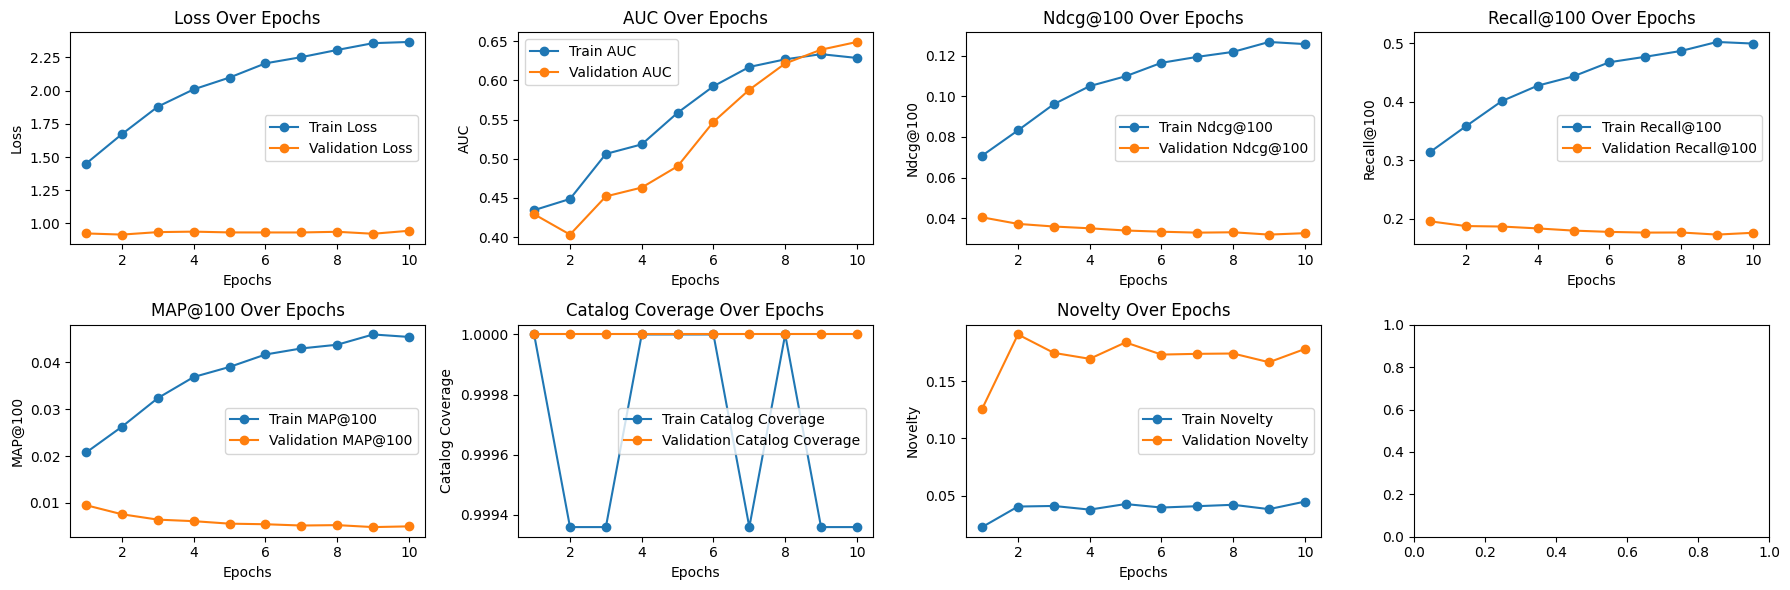

In [31]:
_history = train_evaluation_clbk.get_records()
_history_val = valid_evaluation_clbk.get_records()
AUC_TERM = [k for k in _history if k.startswith('auc')][0]
_metrics  = {
    'Loss': 'loss',
    'AUC': AUC_TERM,
    'Ndcg@100': 'ndcg_at_100',
    'Recall@100': 'recall_at_100',
    'MAP@100':'map_at_100',
    'Catalog Coverage': 'coverage',
    'Novelty':'novelty'
}
print('Plot for model', VERSION)
plot_metrics(_history, _history_val, _metrics)


Plot for model v10


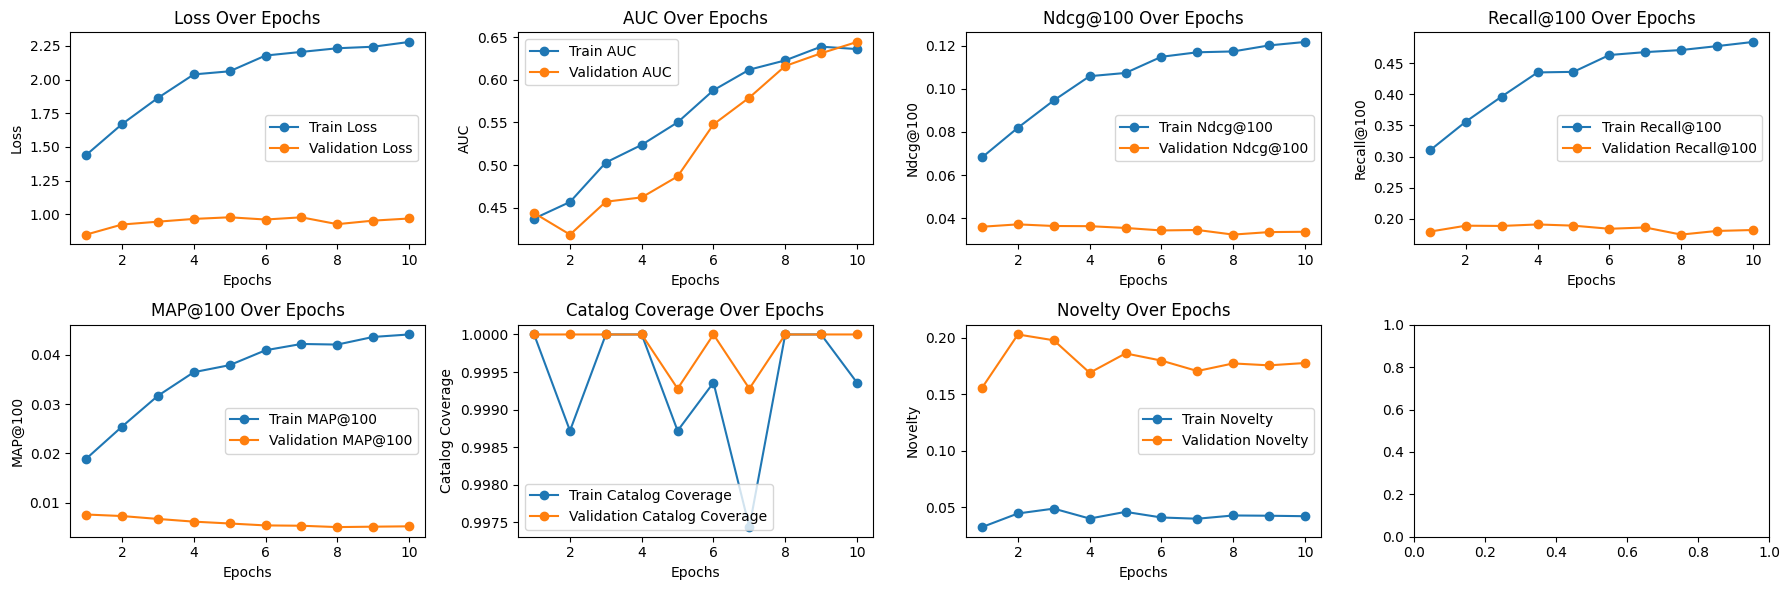

In [ ]:
_history = train_evaluation_clbk.get_records()
_history_val = valid_evaluation_clbk.get_records()
AUC_TERM = [k for k in _history if k.startswith('auc')][0]
_metrics  = {
    'Loss': 'loss',
    'AUC': AUC_TERM,
    'Ndcg@100': 'ndcg_at_100',
    'Recall@100': 'recall_at_100',
    'MAP@100':'map_at_100',
    'Catalog Coverage': 'coverage',
    'Novelty':'novelty'
}
print('Plot for model', VERSION)
plot_metrics(_history, _history_val, _metrics)


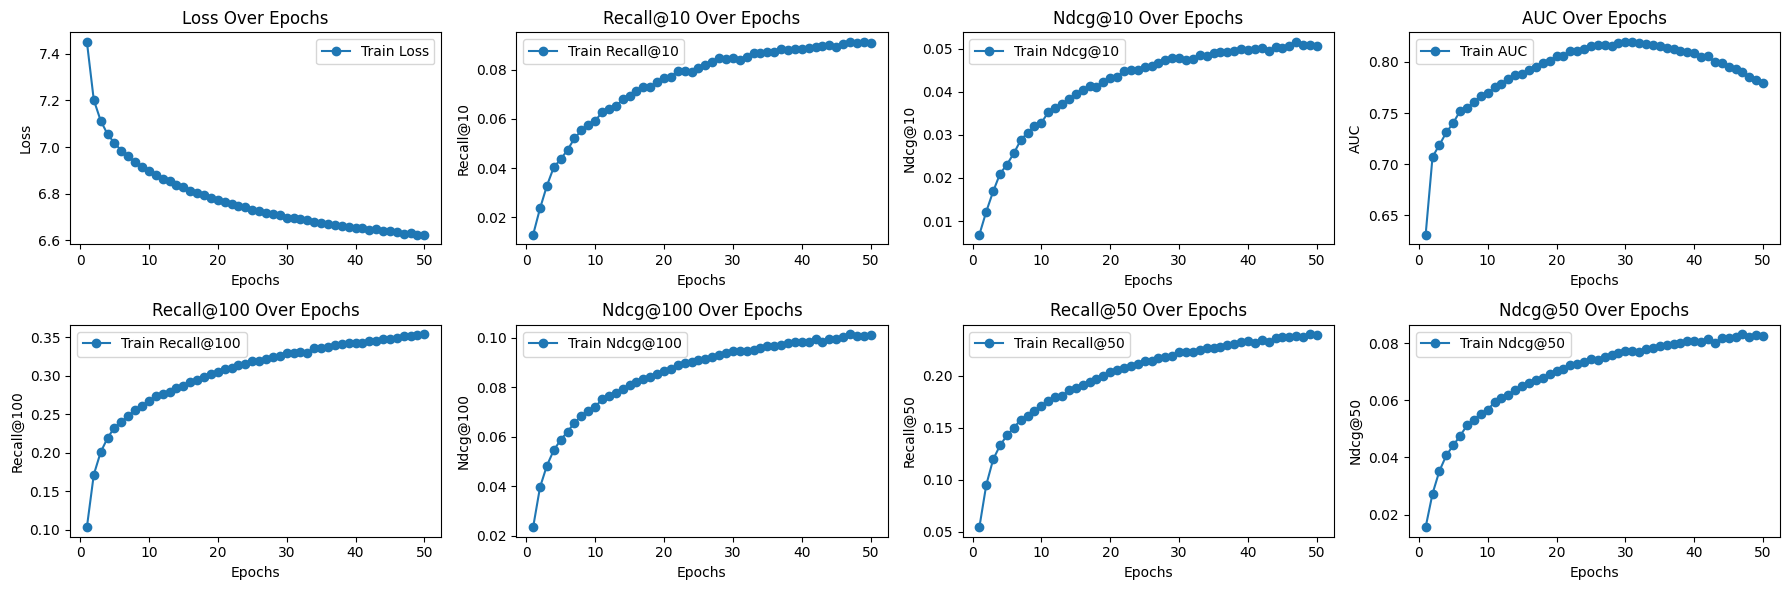

In [32]:
_history = merge_model_history(*history)
# AUC_TERM = [k for k in _history if k.startswith('auc')][0]
METRIC_AT = {'@'.join([k.split('_')[0].title(), k.split('_')[-1]]):k for k in _history if k.startswith('recall') or k.startswith('ndcg')}
val_history = { k[4:]:v for k,v in _history.items() if k.startswith('val')}
plot_metrics(_history, None, default_plot_metrics | {'AUC': 'auc', **METRIC_AT,})
# {'AUC': AUC_TERM, 'Recall@100': 'recall_at_100','NDCG@10': 'ndcg_at_10',}

### model_v3

In [33]:
VERSION = 'v3'

_tower_dim = [256, 128] # @param

_learning_rate = 0.01 # @param
_batch_size = 1024 * 4 # @param
_epochs = 50 # @param
_validation_batch_size = 2048 # @param
_sample_neg = _batch_size * 2 # @param
_validation_freq = 5 # @param
_loss = 'categorical_crossentropy' # @param
# _loss = 'bpr-max' # @param

_logq_sampling_correction = False # @param

embedding_dims = {
    'item': {
        'movie_id': 64,
        'genres': 8*2
    },
    'user': {
        'user_id': 64,
        'gender': 8,
        'occupation': 8*2
    }
}

In [34]:
if VERSION in models:
    raise RuntimeError('Reusing model version: ', VERSION)

In [35]:
from merlin.models.tf.outputs.sampling.in_batch import InBatchSamplerV2

sampler = [InBatchSamplerV2(_sample_neg)]

models[VERSION] = model = build_towers(
    train,
    tower_dim=_tower_dim,
    neg_sampler=sampler,
    embedding_dims=embedding_dims,
    logq_sampling_correction=_logq_sampling_correction,
    item_categorical=Tags.CATEGORICAL
)

train_evaluation_clbks[VERSION] = EvaluationCallback(period=5, topk=100, data=train, type_='Train', schema=train.schema)
valid_evaluation_clbks[VERSION] = EvaluationCallback(period=5, topk=100, data=valid, type_='Validation', schema=train.schema)
historys[VERSION] = []

TOP_K = [100, 50, 10]
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=_learning_rate),
    run_eagerly=False,
    metrics=topk_metrics_aggregator(TOP_K),
    loss=_loss,
)

#### model

In [36]:
history = historys[VERSION]
model = models[VERSION]
train_evaluation_clbk = train_evaluation_clbks[VERSION]
valid_evaluation_clbk = valid_evaluation_clbks[VERSION]

In [37]:
# %pdb on
history.append(
    model.fit(train, validation_data=valid, batch_size=_batch_size, epochs=_epochs,
                 validation_batch_size=_validation_batch_size, validation_freq=_validation_freq,
                 callbacks=[train_evaluation_clbk,
                            valid_evaluation_clbk],
                  verbose=1)
)

Epoch 1/50
18/18 [==============================] - 22s 467ms/step - loss: 8.2338 - auc: 0.5748 - recall_at_100: 0.0330 - mrr_at_100: 0.0028 - ndcg_at_100: 0.0079 - map_at_100: 0.0028 - precision_at_100: 3.3031e-04 - recall_at_50: 0.0171 - mrr_at_50: 0.0026 - ndcg_at_50: 0.0053 - map_at_50: 0.0026 - precision_at_50: 3.4155e-04 - recall_at_10: 0.0045 - mrr_at_10: 0.0021 - ndcg_at_10: 0.0027 - map_at_10: 0.0021 - precision_at_10: 4.5351e-04 - regularization_loss: 0.0000e+00 - loss_batch: 8.0263
Epoch 2/50
18/18 [==============================] - 5s 206ms/step - loss: 7.9641 - auc: 0.7039 - recall_at_100: 0.0778 - mrr_at_100: 0.0066 - ndcg_at_100: 0.0186 - map_at_100: 0.0066 - precision_at_100: 7.7775e-04 - recall_at_50: 0.0425 - mrr_at_50: 0.0061 - ndcg_at_50: 0.0129 - map_at_50: 0.0061 - precision_at_50: 8.5075e-04 - recall_at_10: 0.0114 - mrr_at_10: 0.0048 - ndcg_at_10: 0.0063 - map_at_10: 0.0048 - precision_at_10: 0.0011 - regularization_loss: 0.0000e+00 - loss_batch: 7.7577
Epoch 3/5

69/69 [==============================] - 6s 29ms/step - loss: 1.2540 - auc: 0.4601 - recall_at_100: 0.2681 - mrr_at_100: 0.0160 - ndcg_at_100: 0.0585 - map_at_100: 0.0160 - precision_at_100: 0.0027 - recall_at_10: 0.0331 - mrr_at_10: 0.0098 - ndcg_at_10: 0.0151 - map_at_10: 0.0098 - precision_at_10: 0.0033 - regularization_loss: 0.0000e+00 - loss_batch: 1.2694
Candidate set rows: 943
Train dataset topk evaluation {'loss': 1.2540326118469238, 'auc': 0.460082083940506, 'recall_at_100': 0.26848238706588745, 'mrr_at_100': 0.016158150508999825, 'ndcg_at_100': 0.058669716119766235, 'map_at_100': 0.016158150508999825, 'precision_at_100': 0.0026848234701901674, 'recall_at_10': 0.032848067581653595, 'mrr_at_10': 0.009943155571818352, 'ndcg_at_10': 0.01518954522907734, 'map_at_10': 0.009943155571818352, 'precision_at_10': 0.0032848073169589043, 'regularization_loss': 0.0, 'loss_batch': 1.9979944229125977, 'coverage': 1.0, 'novelty': 0.03607636099315199}
Candidate set rows: 1387


15/15 [==============================] - 3s 20ms/step - loss: 0.8486 - auc: 0.4653 - recall_at_100: 0.1696 - mrr_at_100: 0.0075 - ndcg_at_100: 0.0343 - map_at_100: 0.0075 - precision_at_100: 0.0017 - recall_at_10: 0.0146 - mrr_at_10: 0.0037 - ndcg_at_10: 0.0062 - map_at_10: 0.0037 - precision_at_10: 0.0015 - regularization_loss: 0.0000e+00 - loss_batch: 0.9237
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.8485943078994751, 'auc': 0.46530160307884216, 'recall_at_100': 0.17814631760120392, 'mrr_at_100': 0.008358575403690338, 'ndcg_at_100': 0.03637535497546196, 'map_at_100': 0.008358575403690338, 'precision_at_100': 0.0017814630409702659, 'recall_at_10': 0.01584860309958458, 'mrr_at_10': 0.004373014438897371, 'ndcg_at_10': 0.0069615901447832584, 'map_at_10': 0.004373014438897371, 'precision_at_10': 0.0015848602633923292, 'regularization_loss': 0.0, 'loss_batch': 1.7085343599319458, 'coverage': 1.0, 'novelty': 0.16994052982519373}
18/18 [============================

69/69 [==============================] - 6s 28ms/step - loss: 1.7205 - auc: 0.4748 - recall_at_100: 0.3623 - mrr_at_100: 0.0250 - ndcg_at_100: 0.0826 - map_at_100: 0.0250 - precision_at_100: 0.0036 - recall_at_10: 0.0528 - mrr_at_10: 0.0165 - ndcg_at_10: 0.0248 - map_at_10: 0.0165 - precision_at_10: 0.0053 - regularization_loss: 0.0000e+00 - loss_batch: 1.7399
Candidate set rows: 943
Train dataset topk evaluation {'loss': 1.7205226421356201, 'auc': 0.4747985601425171, 'recall_at_100': 0.3660579323768616, 'mrr_at_100': 0.026326337829232216, 'ndcg_at_100': 0.08444422483444214, 'map_at_100': 0.026326337829232216, 'precision_at_100': 0.0036605792120099068, 'recall_at_10': 0.054884474724531174, 'mrr_at_10': 0.017661230638623238, 'ndcg_at_10': 0.026200098916888237, 'map_at_10': 0.017661230638623238, 'precision_at_10': 0.0054884483106434345, 'regularization_loss': 0.0, 'loss_batch': 2.6599318981170654, 'coverage': 1.0, 'novelty': 0.03731845344097511}
Candidate set rows: 1387


15/15 [==============================] - 3s 20ms/step - loss: 0.9371 - auc: 0.4671 - recall_at_100: 0.1860 - mrr_at_100: 0.0068 - ndcg_at_100: 0.0362 - map_at_100: 0.0068 - precision_at_100: 0.0019 - recall_at_10: 0.0114 - mrr_at_10: 0.0025 - ndcg_at_10: 0.0045 - map_at_10: 0.0025 - precision_at_10: 0.0011 - regularization_loss: 0.0000e+00 - loss_batch: 0.9976
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.9371123313903809, 'auc': 0.4671098589897156, 'recall_at_100': 0.1906513273715973, 'mrr_at_100': 0.007313276641070843, 'ndcg_at_100': 0.03743205964565277, 'map_at_100': 0.007313276641070843, 'precision_at_100': 0.00190651323646307, 'recall_at_10': 0.012571887113153934, 'mrr_at_10': 0.0029044358525425196, 'ndcg_at_10': 0.005085775163024664, 'map_at_10': 0.0029044358525425196, 'precision_at_10': 0.001257188618183136, 'regularization_loss': 0.0, 'loss_batch': 1.6300443410873413, 'coverage': 1.0, 'novelty': 0.16923905240488155}
18/18 [==============================]

69/69 [==============================] - 4s 18ms/step - loss: 1.8726 - auc: 0.4871 - recall_at_100: 0.3945 - mrr_at_100: 0.0317 - ndcg_at_100: 0.0944 - map_at_100: 0.0317 - precision_at_100: 0.0039 - recall_at_10: 0.0669 - mrr_at_10: 0.0223 - ndcg_at_10: 0.0325 - map_at_10: 0.0223 - precision_at_10: 0.0067 - regularization_loss: 0.0000e+00 - loss_batch: 1.8924
Candidate set rows: 943
Train dataset topk evaluation {'loss': 1.8726227283477783, 'auc': 0.487107515335083, 'recall_at_100': 0.39897724986076355, 'mrr_at_100': 0.032806482166051865, 'ndcg_at_100': 0.09610913693904877, 'map_at_100': 0.032806482166051865, 'precision_at_100': 0.003989771939814091, 'recall_at_10': 0.0691290870308876, 'mrr_at_10': 0.023325230926275253, 'ndcg_at_10': 0.03385855257511139, 'map_at_10': 0.023325230926275253, 'precision_at_10': 0.006912908982485533, 'regularization_loss': 0.0, 'loss_batch': 2.8296115398406982, 'coverage': 0.9993593850096092, 'novelty': 0.03563869992441421}
Candidate set rows: 1387


15/15 [==============================] - 5s 29ms/step - loss: 0.9736 - auc: 0.4523 - recall_at_100: 0.1884 - mrr_at_100: 0.0066 - ndcg_at_100: 0.0363 - map_at_100: 0.0066 - precision_at_100: 0.0019 - recall_at_10: 0.0103 - mrr_at_10: 0.0023 - ndcg_at_10: 0.0041 - map_at_10: 0.0023 - precision_at_10: 0.0010 - regularization_loss: 0.0000e+00 - loss_batch: 1.0228
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.9736402034759521, 'auc': 0.45230576395988464, 'recall_at_100': 0.1939949244260788, 'mrr_at_100': 0.0071121398359537125, 'ndcg_at_100': 0.03769390657544136, 'map_at_100': 0.0071121398359537125, 'precision_at_100': 0.0019399492302909493, 'recall_at_10': 0.011501939035952091, 'mrr_at_10': 0.0026699071750044823, 'ndcg_at_10': 0.004661167040467262, 'map_at_10': 0.0026699071750044823, 'precision_at_10': 0.0011501939734444022, 'regularization_loss': 0.0, 'loss_batch': 1.5369559526443481, 'coverage': 1.0, 'novelty': 0.15706195869420386}
18/18 [=========================

69/69 [==============================] - 5s 18ms/step - loss: 2.0520 - auc: 0.5001 - recall_at_100: 0.4321 - mrr_at_100: 0.0364 - ndcg_at_100: 0.1053 - map_at_100: 0.0364 - precision_at_100: 0.0043 - recall_at_10: 0.0792 - mrr_at_10: 0.0259 - ndcg_at_10: 0.0382 - map_at_10: 0.0259 - precision_at_10: 0.0079 - regularization_loss: 0.0000e+00 - loss_batch: 2.0724
Candidate set rows: 943
Train dataset topk evaluation {'loss': 2.0520477294921875, 'auc': 0.5000914931297302, 'recall_at_100': 0.4339050054550171, 'mrr_at_100': 0.037677403539419174, 'ndcg_at_100': 0.10678587853908539, 'map_at_100': 0.037677403539419174, 'precision_at_100': 0.004339050035923719, 'recall_at_10': 0.08118002116680145, 'mrr_at_10': 0.027178799733519554, 'ndcg_at_10': 0.0396139957010746, 'map_at_10': 0.027178799733519554, 'precision_at_10': 0.008118003606796265, 'regularization_loss': 0.0, 'loss_batch': 3.037290334701538, 'coverage': 0.9987187700192185, 'novelty': 0.03876988858282284}
Candidate set rows: 1387


15/15 [==============================] - 3s 21ms/step - loss: 0.9594 - auc: 0.4355 - recall_at_100: 0.1781 - mrr_at_100: 0.0053 - ndcg_at_100: 0.0332 - map_at_100: 0.0053 - precision_at_100: 0.0018 - recall_at_10: 0.0063 - mrr_at_10: 0.0014 - ndcg_at_10: 0.0025 - map_at_10: 0.0014 - precision_at_10: 6.3160e-04 - regularization_loss: 0.0000e+00 - loss_batch: 1.0140
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.9593762755393982, 'auc': 0.43554237484931946, 'recall_at_100': 0.18389728665351868, 'mrr_at_100': 0.005826929584145546, 'ndcg_at_100': 0.03469298034906387, 'map_at_100': 0.005826929584145546, 'precision_at_100': 0.0018389730248600245, 'recall_at_10': 0.007289019878953695, 'mrr_at_10': 0.001643134281039238, 'ndcg_at_10': 0.0029178368858993053, 'map_at_10': 0.001643134281039238, 'precision_at_10': 0.0007289020577445626, 'regularization_loss': 0.0, 'loss_batch': 1.5850950479507446, 'coverage': 1.0, 'novelty': 0.16529360210341806}
18/18 [=======================

69/69 [==============================] - 6s 21ms/step - loss: 2.1429 - auc: 0.5142 - recall_at_100: 0.4531 - mrr_at_100: 0.0394 - ndcg_at_100: 0.1118 - map_at_100: 0.0394 - precision_at_100: 0.0045 - recall_at_10: 0.0866 - mrr_at_10: 0.0283 - ndcg_at_10: 0.0417 - map_at_10: 0.0283 - precision_at_10: 0.0087 - regularization_loss: 0.0000e+00 - loss_batch: 2.1653
Candidate set rows: 943
Train dataset topk evaluation {'loss': 2.142930746078491, 'auc': 0.5142402052879333, 'recall_at_100': 0.4536053240299225, 'mrr_at_100': 0.040524356067180634, 'ndcg_at_100': 0.1129583939909935, 'map_at_100': 0.040524356067180634, 'precision_at_100': 0.004536052234470844, 'recall_at_10': 0.08915700763463974, 'mrr_at_10': 0.029505915939807892, 'ndcg_at_10': 0.0432254895567894, 'map_at_10': 0.029505915939807892, 'precision_at_10': 0.008915700949728489, 'regularization_loss': 0.0, 'loss_batch': 3.226247787475586, 'coverage': 0.9987187700192185, 'novelty': 0.04192788226401672}
Candidate set rows: 1387


15/15 [==============================] - 3s 21ms/step - loss: 0.9076 - auc: 0.4248 - recall_at_100: 0.1681 - mrr_at_100: 0.0047 - ndcg_at_100: 0.0310 - map_at_100: 0.0047 - precision_at_100: 0.0017 - recall_at_10: 0.0055 - mrr_at_10: 9.7304e-04 - ndcg_at_10: 0.0020 - map_at_10: 9.7304e-04 - precision_at_10: 5.4953e-04 - regularization_loss: 0.0000e+00 - loss_batch: 0.9597
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.9076355695724487, 'auc': 0.4247729778289795, 'recall_at_100': 0.17192724347114563, 'mrr_at_100': 0.004966572858393192, 'ndcg_at_100': 0.031931810081005096, 'map_at_100': 0.004966572858393192, 'precision_at_100': 0.0017192725790664554, 'recall_at_10': 0.006754045840352774, 'mrr_at_10': 0.0011527945753186941, 'ndcg_at_10': 0.0023965181317180395, 'map_at_10': 0.0011527945753186941, 'precision_at_10': 0.0006754046771675348, 'regularization_loss': 0.0, 'loss_batch': 1.5045801401138306, 'coverage': 0.9992790194664743, 'novelty': 0.17264738191138776}
18/18

69/69 [==============================] - 5s 28ms/step - loss: 2.2973 - auc: 0.5191 - recall_at_100: 0.4892 - mrr_at_100: 0.0435 - ndcg_at_100: 0.1222 - map_at_100: 0.0435 - precision_at_100: 0.0049 - recall_at_10: 0.0996 - mrr_at_10: 0.0314 - ndcg_at_10: 0.0471 - map_at_10: 0.0314 - precision_at_10: 0.0100 - regularization_loss: 0.0000e+00 - loss_batch: 2.3158
Candidate set rows: 943
Train dataset topk evaluation {'loss': 2.29726243019104, 'auc': 0.5190882086753845, 'recall_at_100': 0.4892738163471222, 'mrr_at_100': 0.04488224908709526, 'ndcg_at_100': 0.12340493500232697, 'map_at_100': 0.04488224908709526, 'precision_at_100': 0.0048927380703389645, 'recall_at_10': 0.10166376829147339, 'mrr_at_10': 0.03279272839426994, 'ndcg_at_10': 0.04863143712282181, 'map_at_10': 0.03279272839426994, 'precision_at_10': 0.010166377760469913, 'regularization_loss': 0.0, 'loss_batch': 3.198376178741455, 'coverage': 1.0, 'novelty': 0.03715963273830634}
Candidate set rows: 1387


15/15 [==============================] - 3s 21ms/step - loss: 0.8937 - auc: 0.3926 - recall_at_100: 0.1623 - mrr_at_100: 0.0043 - ndcg_at_100: 0.0297 - map_at_100: 0.0043 - precision_at_100: 0.0016 - recall_at_10: 0.0049 - mrr_at_10: 8.1233e-04 - ndcg_at_10: 0.0017 - map_at_10: 8.1233e-04 - precision_at_10: 4.8846e-04 - regularization_loss: 0.0000e+00 - loss_batch: 0.9376
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.8936988711357117, 'auc': 0.3925538957118988, 'recall_at_100': 0.16764745116233826, 'mrr_at_100': 0.004467897582799196, 'ndcg_at_100': 0.030646905303001404, 'map_at_100': 0.004467897582799196, 'precision_at_100': 0.0016764744650572538, 'recall_at_10': 0.004747893661260605, 'mrr_at_10': 0.0008158352575264871, 'ndcg_at_10': 0.001693759928457439, 'map_at_10': 0.0008158352575264871, 'precision_at_10': 0.0004747893544845283, 'regularization_loss': 0.0, 'loss_batch': 1.3966937065124512, 'coverage': 1.0, 'novelty': 0.16360166551006244}
18/18 [==============

69/69 [==============================] - 6s 28ms/step - loss: 2.3783 - auc: 0.5494 - recall_at_100: 0.5000 - mrr_at_100: 0.0444 - ndcg_at_100: 0.1248 - map_at_100: 0.0444 - precision_at_100: 0.0050 - recall_at_10: 0.1007 - mrr_at_10: 0.0318 - ndcg_at_10: 0.0477 - map_at_10: 0.0318 - precision_at_10: 0.0101 - regularization_loss: 0.0000e+00 - loss_batch: 2.3968
Candidate set rows: 943
Train dataset topk evaluation {'loss': 2.3782968521118164, 'auc': 0.5494202375411987, 'recall_at_100': 0.5036893486976624, 'mrr_at_100': 0.045687235891819, 'ndcg_at_100': 0.1266041249036789, 'map_at_100': 0.045687235891819, 'precision_at_100': 0.005036893766373396, 'recall_at_10': 0.10390017181634903, 'mrr_at_10': 0.03318535163998604, 'ndcg_at_10': 0.049422167241573334, 'map_at_10': 0.03318535163998604, 'precision_at_10': 0.010390017181634903, 'regularization_loss': 0.0, 'loss_batch': 3.2761175632476807, 'coverage': 1.0, 'novelty': 0.039977954892318125}
Candidate set rows: 1387


15/15 [==============================] - 3s 22ms/step - loss: 0.8500 - auc: 0.4381 - recall_at_100: 0.1519 - mrr_at_100: 0.0039 - ndcg_at_100: 0.0276 - map_at_100: 0.0039 - precision_at_100: 0.0015 - recall_at_10: 0.0035 - mrr_at_10: 6.4538e-04 - ndcg_at_10: 0.0013 - map_at_10: 6.4538e-04 - precision_at_10: 3.4723e-04 - regularization_loss: 0.0000e+00 - loss_batch: 0.9078
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.8499851822853088, 'auc': 0.4380994141101837, 'recall_at_100': 0.15668047964572906, 'mrr_at_100': 0.004115920513868332, 'ndcg_at_100': 0.02850589156150818, 'map_at_100': 0.004115920513868332, 'precision_at_100': 0.0015668049454689026, 'recall_at_10': 0.003811689093708992, 'mrr_at_10': 0.0007398350280709565, 'ndcg_at_10': 0.0014283392811194062, 'map_at_10': 0.0007398350280709565, 'precision_at_10': 0.00038116893847472966, 'regularization_loss': 0.0, 'loss_batch': 1.5123406648635864, 'coverage': 1.0, 'novelty': 0.16997116077865898}
18/18 [=============

69/69 [==============================] - 4s 18ms/step - loss: 2.5036 - auc: 0.5649 - recall_at_100: 0.5320 - mrr_at_100: 0.0473 - ndcg_at_100: 0.1331 - map_at_100: 0.0473 - precision_at_100: 0.0053 - recall_at_10: 0.1096 - mrr_at_10: 0.0339 - ndcg_at_10: 0.0513 - map_at_10: 0.0339 - precision_at_10: 0.0110 - regularization_loss: 0.0000e+00 - loss_batch: 2.5229
Candidate set rows: 943
Train dataset topk evaluation {'loss': 2.5035781860351562, 'auc': 0.5649489164352417, 'recall_at_100': 0.530853807926178, 'mrr_at_100': 0.04850323498249054, 'ndcg_at_100': 0.13398662209510803, 'map_at_100': 0.04850323498249054, 'precision_at_100': 0.005308537278324366, 'recall_at_10': 0.11144981533288956, 'mrr_at_10': 0.03521297872066498, 'ndcg_at_10': 0.052721843123435974, 'map_at_10': 0.03521297872066498, 'precision_at_10': 0.011144982650876045, 'regularization_loss': 0.0, 'loss_batch': 3.440194606781006, 'coverage': 0.9993593850096092, 'novelty': 0.040463419866981334}
Candidate set rows: 1387


15/15 [==============================] - 4s 21ms/step - loss: 0.8114 - auc: 0.4360 - recall_at_100: 0.1436 - mrr_at_100: 0.0036 - ndcg_at_100: 0.0259 - map_at_100: 0.0036 - precision_at_100: 0.0014 - recall_at_10: 0.0030 - mrr_at_10: 5.9788e-04 - ndcg_at_10: 0.0011 - map_at_10: 5.9788e-04 - precision_at_10: 2.9706e-04 - regularization_loss: 0.0000e+00 - loss_batch: 0.8644
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.8114013075828552, 'auc': 0.43603837490081787, 'recall_at_100': 0.1482546478509903, 'mrr_at_100': 0.0037334111984819174, 'ndcg_at_100': 0.0268144179135561, 'map_at_100': 0.0037334111984819174, 'precision_at_100': 0.0014825464459136128, 'recall_at_10': 0.0030761000234633684, 'mrr_at_10': 0.0005267742089927197, 'ndcg_at_10': 0.0010911925928667188, 'map_at_10': 0.0005267742089927197, 'precision_at_10': 0.0003076100256294012, 'regularization_loss': 0.0, 'loss_batch': 1.418939232826233, 'coverage': 1.0, 'novelty': 0.17037037037037037}
18/18 [=============

69/69 [==============================] - 7s 29ms/step - loss: 2.5631 - auc: 0.5762 - recall_at_100: 0.5434 - mrr_at_100: 0.0482 - ndcg_at_100: 0.1361 - map_at_100: 0.0482 - precision_at_100: 0.0054 - recall_at_10: 0.1122 - mrr_at_10: 0.0343 - ndcg_at_10: 0.0522 - map_at_10: 0.0343 - precision_at_10: 0.0112 - regularization_loss: 0.0000e+00 - loss_batch: 2.5809
Candidate set rows: 943
Train dataset topk evaluation {'loss': 2.563093662261963, 'auc': 0.5762189626693726, 'recall_at_100': 0.5455257892608643, 'mrr_at_100': 0.04957983270287514, 'ndcg_at_100': 0.13772639632225037, 'map_at_100': 0.04957983270287514, 'precision_at_100': 0.005455257836729288, 'recall_at_10': 0.11502521485090256, 'mrr_at_10': 0.03570263087749481, 'ndcg_at_10': 0.053901948034763336, 'map_at_10': 0.03570263087749481, 'precision_at_10': 0.011502521112561226, 'regularization_loss': 0.0, 'loss_batch': 3.425182580947876, 'coverage': 0.9987187700192185, 'novelty': 0.0368705035971223}
Candidate set rows: 1387


15/15 [==============================] - 3s 21ms/step - loss: 0.8516 - auc: 0.4500 - recall_at_100: 0.1552 - mrr_at_100: 0.0039 - ndcg_at_100: 0.0280 - map_at_100: 0.0039 - precision_at_100: 0.0016 - recall_at_10: 0.0033 - mrr_at_10: 5.9964e-04 - ndcg_at_10: 0.0012 - map_at_10: 5.9964e-04 - precision_at_10: 3.3133e-04 - regularization_loss: 0.0000e+00 - loss_batch: 0.8922
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.8516452312469482, 'auc': 0.45002567768096924, 'recall_at_100': 0.15520930290222168, 'mrr_at_100': 0.0038798735477030277, 'ndcg_at_100': 0.0280012134462595, 'map_at_100': 0.0038798735477030277, 'precision_at_100': 0.0015520928427577019, 'recall_at_10': 0.0027417412493377924, 'mrr_at_10': 0.0005284725339151919, 'ndcg_at_10': 0.0010218381648883224, 'map_at_10': 0.0005284725339151919, 'precision_at_10': 0.00027417411911301315, 'regularization_loss': 0.0, 'loss_batch': 1.3159438371658325, 'coverage': 0.9992790194664743, 'novelty': 0.15926363789900355}
18

69/69 [==============================] - 5s 28ms/step - loss: 2.6459 - auc: 0.5918 - recall_at_100: 0.5539 - mrr_at_100: 0.0487 - ndcg_at_100: 0.1383 - map_at_100: 0.0487 - precision_at_100: 0.0055 - recall_at_10: 0.1146 - mrr_at_10: 0.0347 - ndcg_at_10: 0.0530 - map_at_10: 0.0347 - precision_at_10: 0.0115 - regularization_loss: 0.0000e+00 - loss_batch: 2.6647
Candidate set rows: 943
Train dataset topk evaluation {'loss': 2.645890712738037, 'auc': 0.5917659997940063, 'recall_at_100': 0.5581607222557068, 'mrr_at_100': 0.05058038607239723, 'ndcg_at_100': 0.14078068733215332, 'map_at_100': 0.05058038607239723, 'precision_at_100': 0.005581606179475784, 'recall_at_10': 0.11818751692771912, 'mrr_at_10': 0.036450885236263275, 'ndcg_at_10': 0.05519326403737068, 'map_at_10': 0.036450885236263275, 'precision_at_10': 0.011818750761449337, 'regularization_loss': 0.0, 'loss_batch': 3.5592947006225586, 'coverage': 1.0, 'novelty': 0.039265489673550966}
Candidate set rows: 1387


15/15 [==============================] - 3s 20ms/step - loss: 0.8320 - auc: 0.4818 - recall_at_100: 0.1444 - mrr_at_100: 0.0032 - ndcg_at_100: 0.0255 - map_at_100: 0.0032 - precision_at_100: 0.0014 - recall_at_10: 0.0015 - mrr_at_10: 2.3936e-04 - ndcg_at_10: 5.2265e-04 - map_at_10: 2.3936e-04 - precision_at_10: 1.5266e-04 - regularization_loss: 0.0000e+00 - loss_batch: 0.8845
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.8320378065109253, 'auc': 0.4818480908870697, 'recall_at_100': 0.1481209099292755, 'mrr_at_100': 0.003392402082681656, 'ndcg_at_100': 0.026313582435250282, 'map_at_100': 0.003392402082681656, 'precision_at_100': 0.0014812088338658214, 'recall_at_10': 0.0016049217665567994, 'mrr_at_10': 0.0002954032679554075, 'ndcg_at_10': 0.0005832077004015446, 'map_at_10': 0.0002954032679554075, 'precision_at_10': 0.0001604921999387443, 'regularization_loss': 0.0, 'loss_batch': 1.4331295490264893, 'coverage': 1.0, 'novelty': 0.16836279235850743}
18/18 [=========

#### analysis

In [38]:
history = historys[VERSION]
model = models[VERSION]
train_evaluation_clbk = train_evaluation_clbks[VERSION]
valid_evaluation_clbk = valid_evaluation_clbks[VERSION]

Plot for model v3


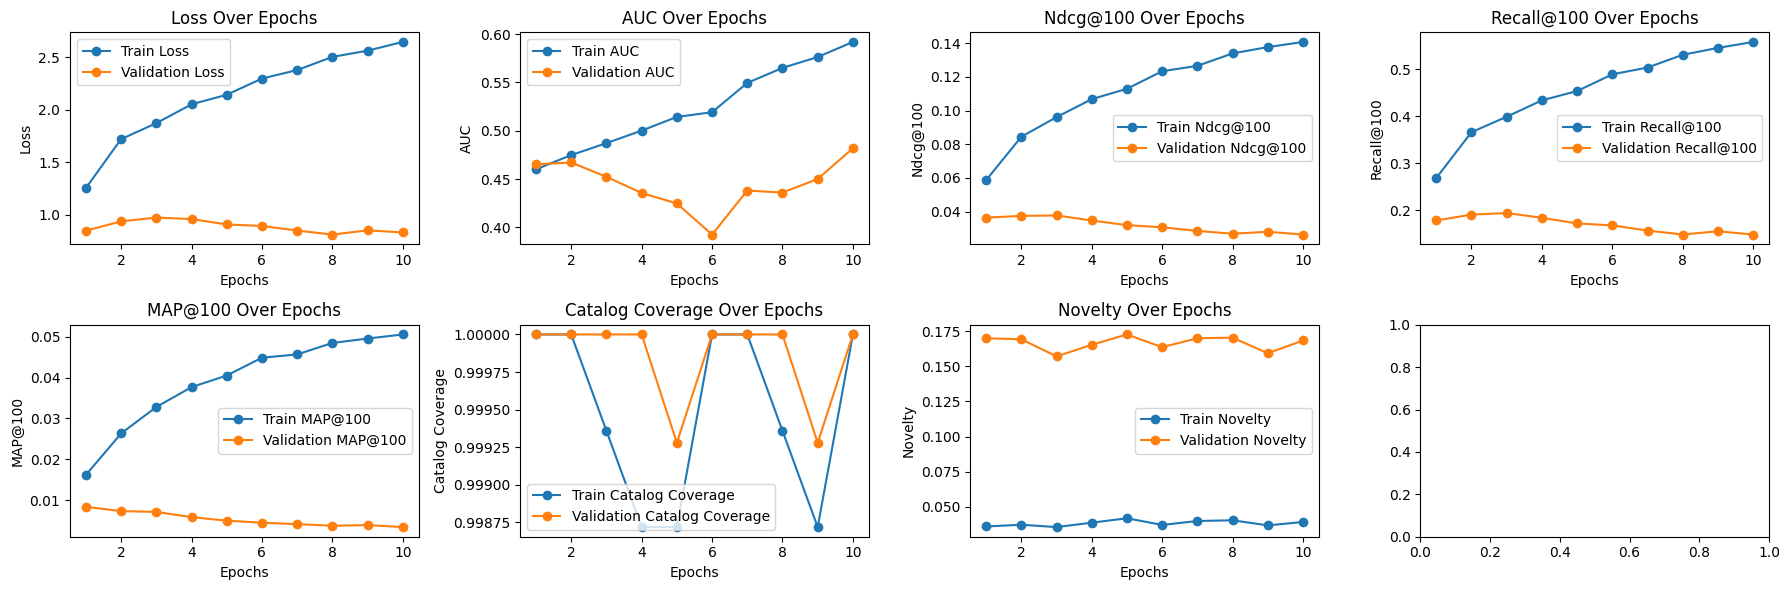

In [39]:
_history = train_evaluation_clbk.get_records()
_history_val = valid_evaluation_clbk.get_records()
AUC_TERM = [k for k in _history if k.startswith('auc')][0]
_metrics  = {
    'Loss': 'loss',
    'AUC': AUC_TERM,
    'Ndcg@100': 'ndcg_at_100',
    'Recall@100': 'recall_at_100',
    'MAP@100':'map_at_100',
    'Catalog Coverage': 'coverage',
    'Novelty':'novelty'
}
print('Plot for model', VERSION)
plot_metrics(_history, _history_val, _metrics)


Plot for model v10


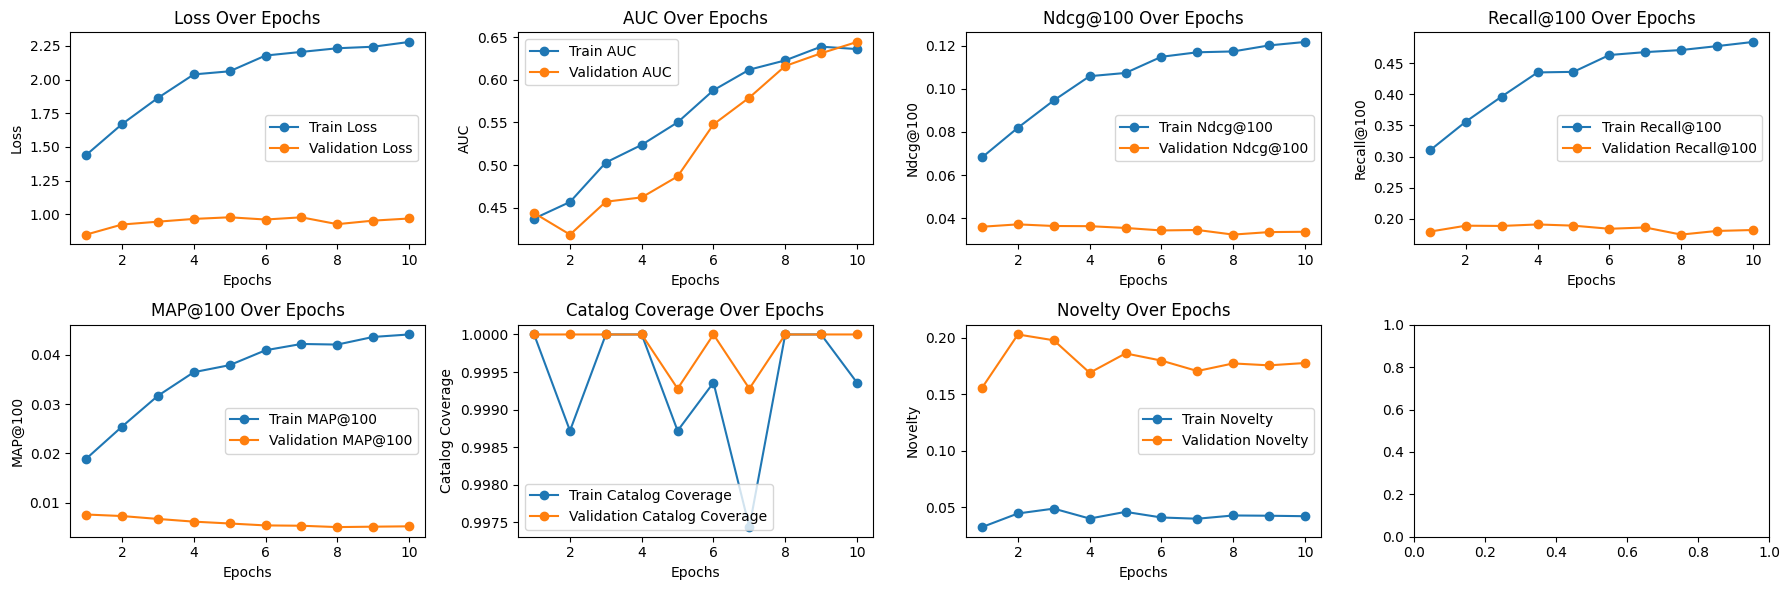

In [ ]:
_history = train_evaluation_clbk.get_records()
_history_val = valid_evaluation_clbk.get_records()
AUC_TERM = [k for k in _history if k.startswith('auc')][0]
_metrics  = {
    'Loss': 'loss',
    'AUC': AUC_TERM,
    'Ndcg@100': 'ndcg_at_100',
    'Recall@100': 'recall_at_100',
    'MAP@100':'map_at_100',
    'Catalog Coverage': 'coverage',
    'Novelty':'novelty'
}
print('Plot for model', VERSION)
plot_metrics(_history, _history_val, _metrics)


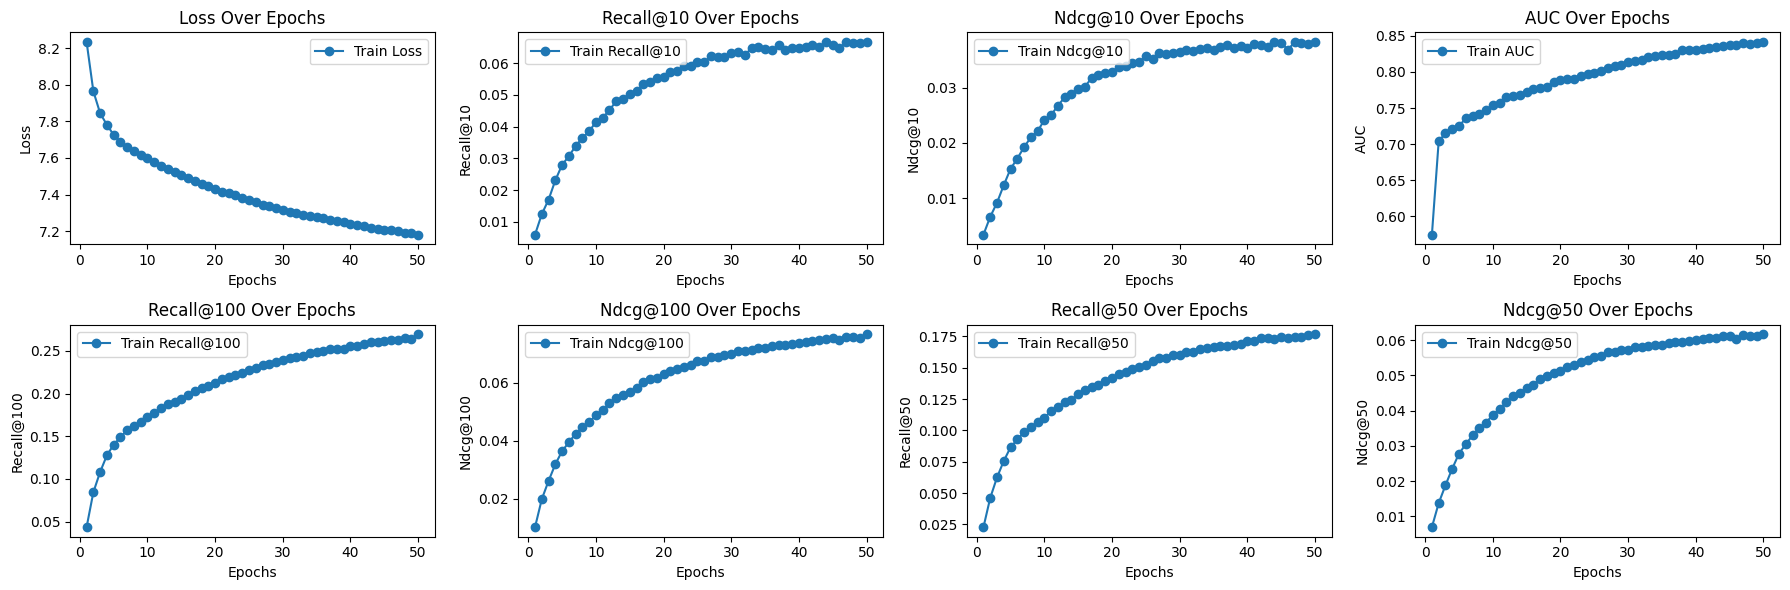

In [40]:
_history = merge_model_history(*history)
# AUC_TERM = [k for k in _history if k.startswith('auc')][0]
METRIC_AT = {'@'.join([k.split('_')[0].title(), k.split('_')[-1]]):k for k in _history if k.startswith('recall') or k.startswith('ndcg')}
val_history = { k[4:]:v for k,v in _history.items() if k.startswith('val')}
plot_metrics(_history, None, default_plot_metrics | {'AUC': 'auc', **METRIC_AT,})
# {'AUC': AUC_TERM, 'Recall@100': 'recall_at_100','NDCG@10': 'ndcg_at_10',}

### model_v4

In [41]:
VERSION = 'v4'

_tower_dim = [256, 256] # @param

_learning_rate = 0.01 # @param
_batch_size = 1024 * 2 # @param
_epochs = 50 # @param
_validation_batch_size = 2048 # @param
_sample_neg = _batch_size * 2 # @param
_validation_freq = 5 # @param
_loss = 'categorical_crossentropy' # @param
# _loss = 'bpr-max' # @param

_logq_sampling_correction = False # @param

embedding_dims = {
    'item': {
        'movie_id': 64,
        'genres': 8*2
    },
    'user': {
        'user_id': 64,
        'gender': 8,
        'occupation': 8*2
    }
}

In [42]:
if VERSION in models:
    raise RuntimeError('Reusing model version: ', VERSION)

In [43]:
from merlin.models.tf.outputs.sampling.in_batch import InBatchSamplerV2

sampler = [InBatchSamplerV2(_sample_neg)]

models[VERSION] = model = build_towers(
    train,
    tower_dim=_tower_dim,
    neg_sampler=sampler,
    embedding_dims=embedding_dims,
    logq_sampling_correction=_logq_sampling_correction,
    item_categorical=Tags.CATEGORICAL
)

train_evaluation_clbks[VERSION] = EvaluationCallback(period=5, topk=100, data=train, type_='Train', schema=train.schema)
valid_evaluation_clbks[VERSION] = EvaluationCallback(period=5, topk=100, data=valid, type_='Validation', schema=train.schema)
historys[VERSION] = []

TOP_K = [100, 50, 10]
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=_learning_rate),
    run_eagerly=False,
    metrics=topk_metrics_aggregator(TOP_K),
    loss=_loss,
)

#### model

In [44]:
history = historys[VERSION]
model = models[VERSION]
train_evaluation_clbk = train_evaluation_clbks[VERSION]
valid_evaluation_clbk = valid_evaluation_clbks[VERSION]

In [45]:
# %pdb on
history.append(
    model.fit(train, validation_data=valid, batch_size=_batch_size, epochs=_epochs,
                 validation_batch_size=_validation_batch_size, validation_freq=_validation_freq,
                 callbacks=[train_evaluation_clbk,
                            valid_evaluation_clbk],
                  verbose=1)
)

Epoch 1/50
35/35 [==============================] - 20s 241ms/step - loss: 7.4924 - auc: 0.6086 - recall_at_100: 0.0722 - mrr_at_100: 0.0051 - ndcg_at_100: 0.0163 - map_at_100: 0.0051 - precision_at_100: 7.2176e-04 - recall_at_50: 0.0372 - mrr_at_50: 0.0046 - ndcg_at_50: 0.0107 - map_at_50: 0.0046 - precision_at_50: 7.4355e-04 - recall_at_10: 0.0086 - mrr_at_10: 0.0035 - ndcg_at_10: 0.0046 - map_at_10: 0.0035 - precision_at_10: 8.5606e-04 - regularization_loss: 0.0000e+00 - loss_batch: 7.4232
Epoch 2/50
35/35 [==============================] - 6s 166ms/step - loss: 7.2058 - auc: 0.7082 - recall_at_100: 0.1636 - mrr_at_100: 0.0127 - ndcg_at_100: 0.0383 - map_at_100: 0.0127 - precision_at_100: 0.0016 - recall_at_50: 0.0944 - mrr_at_50: 0.0117 - ndcg_at_50: 0.0272 - map_at_50: 0.0117 - precision_at_50: 0.0019 - recall_at_10: 0.0236 - mrr_at_10: 0.0089 - ndcg_at_10: 0.0122 - map_at_10: 0.0089 - precision_at_10: 0.0024 - regularization_loss: 0.0000e+00 - loss_batch: 7.1395
Epoch 3/50
35/35 

69/69 [==============================] - 4s 17ms/step - loss: 1.3677 - auc: 0.4554 - recall_at_100: 0.2912 - mrr_at_100: 0.0176 - ndcg_at_100: 0.0638 - map_at_100: 0.0176 - precision_at_100: 0.0029 - recall_at_10: 0.0347 - mrr_at_10: 0.0107 - ndcg_at_10: 0.0162 - map_at_10: 0.0107 - precision_at_10: 0.0035 - regularization_loss: 0.0000e+00 - loss_batch: 1.3750
Candidate set rows: 943
Train dataset topk evaluation {'loss': 1.3676549196243286, 'auc': 0.4553963243961334, 'recall_at_100': 0.2933962047100067, 'mrr_at_100': 0.0176954735070467, 'ndcg_at_100': 0.06425714492797852, 'map_at_100': 0.0176954735070467, 'precision_at_100': 0.002933961572125554, 'recall_at_10': 0.03581094741821289, 'mrr_at_10': 0.01078240480273962, 'ndcg_at_10': 0.016510674729943275, 'map_at_10': 0.01078240480273962, 'precision_at_10': 0.003581094555556774, 'regularization_loss': 0.0, 'loss_batch': 1.7238532304763794, 'coverage': 1.0, 'novelty': 0.04153453136011275}
Candidate set rows: 1387


15/15 [==============================] - 4s 21ms/step - loss: 0.8872 - auc: 0.4613 - recall_at_100: 0.1826 - mrr_at_100: 0.0074 - ndcg_at_100: 0.0363 - map_at_100: 0.0074 - precision_at_100: 0.0018 - recall_at_10: 0.0138 - mrr_at_10: 0.0033 - ndcg_at_10: 0.0056 - map_at_10: 0.0033 - precision_at_10: 0.0014 - regularization_loss: 0.0000e+00 - loss_batch: 0.9488
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.8871564269065857, 'auc': 0.4612625539302826, 'recall_at_100': 0.18617092072963715, 'mrr_at_100': 0.00814694631844759, 'ndcg_at_100': 0.03749559447169304, 'map_at_100': 0.00814694631844759, 'precision_at_100': 0.0018617092864587903, 'recall_at_10': 0.01444429624825716, 'mrr_at_10': 0.0038603036664426327, 'ndcg_at_10': 0.006259877700358629, 'map_at_10': 0.0038603036664426327, 'precision_at_10': 0.0014444297412410378, 'regularization_loss': 0.0, 'loss_batch': 1.593597173690796, 'coverage': 1.0, 'novelty': 0.18349873516248297}
35/35 [==============================]

69/69 [==============================] - 4s 17ms/step - loss: 1.6611 - auc: 0.4634 - recall_at_100: 0.3530 - mrr_at_100: 0.0241 - ndcg_at_100: 0.0801 - map_at_100: 0.0241 - precision_at_100: 0.0035 - recall_at_10: 0.0490 - mrr_at_10: 0.0156 - ndcg_at_10: 0.0232 - map_at_10: 0.0156 - precision_at_10: 0.0049 - regularization_loss: 0.0000e+00 - loss_batch: 1.6708
Candidate set rows: 943
Train dataset topk evaluation {'loss': 1.6611015796661377, 'auc': 0.4634109139442444, 'recall_at_100': 0.3522549271583557, 'mrr_at_100': 0.02415752038359642, 'ndcg_at_100': 0.08012908697128296, 'map_at_100': 0.02415752038359642, 'precision_at_100': 0.0035225492902100086, 'recall_at_10': 0.050027064979076385, 'mrr_at_10': 0.015753095969557762, 'ndcg_at_10': 0.023596877232193947, 'map_at_10': 0.015753095969557762, 'precision_at_10': 0.005002705845981836, 'regularization_loss': 0.0, 'loss_batch': 2.1319491863250732, 'coverage': 1.0, 'novelty': 0.0441438067596667}
Candidate set rows: 1387


15/15 [==============================] - 4s 29ms/step - loss: 0.9275 - auc: 0.4430 - recall_at_100: 0.1862 - mrr_at_100: 0.0075 - ndcg_at_100: 0.0369 - map_at_100: 0.0075 - precision_at_100: 0.0019 - recall_at_10: 0.0122 - mrr_at_10: 0.0031 - ndcg_at_10: 0.0052 - map_at_10: 0.0031 - precision_at_10: 0.0012 - regularization_loss: 0.0000e+00 - loss_batch: 0.9823
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.9275317788124084, 'auc': 0.4430190622806549, 'recall_at_100': 0.18897953629493713, 'mrr_at_100': 0.00755222188308835, 'ndcg_at_100': 0.03735506907105446, 'map_at_100': 0.00755222188308835, 'precision_at_100': 0.0018897952977567911, 'recall_at_10': 0.012170656584203243, 'mrr_at_10': 0.003163086250424385, 'ndcg_at_10': 0.005217577330768108, 'map_at_10': 0.003163086250424385, 'precision_at_10': 0.0012170658446848392, 'regularization_loss': 0.0, 'loss_batch': 1.5548113584518433, 'coverage': 1.0, 'novelty': 0.19560257208048124}
35/35 [==============================]

69/69 [==============================] - 5s 19ms/step - loss: 1.7591 - auc: 0.4638 - recall_at_100: 0.3701 - mrr_at_100: 0.0285 - ndcg_at_100: 0.0873 - map_at_100: 0.0285 - precision_at_100: 0.0037 - recall_at_10: 0.0593 - mrr_at_10: 0.0196 - ndcg_at_10: 0.0287 - map_at_10: 0.0196 - precision_at_10: 0.0059 - regularization_loss: 0.0000e+00 - loss_batch: 1.7712
Candidate set rows: 943
Train dataset topk evaluation {'loss': 1.7590522766113281, 'auc': 0.46383172273635864, 'recall_at_100': 0.37305206060409546, 'mrr_at_100': 0.02901538833975792, 'ndcg_at_100': 0.08827412128448486, 'map_at_100': 0.02901538833975792, 'precision_at_100': 0.003730520373210311, 'recall_at_10': 0.06085296720266342, 'mrr_at_10': 0.02011130563914776, 'ndcg_at_10': 0.029467705637216568, 'map_at_10': 0.02011130563914776, 'precision_at_10': 0.006085297092795372, 'regularization_loss': 0.0, 'loss_batch': 2.3481497764587402, 'coverage': 0.9987187700192185, 'novelty': 0.04366953783458368}
Candidate set rows: 1387


15/15 [==============================] - 3s 21ms/step - loss: 0.9826 - auc: 0.4157 - recall_at_100: 0.1904 - mrr_at_100: 0.0065 - ndcg_at_100: 0.0364 - map_at_100: 0.0065 - precision_at_100: 0.0019 - recall_at_10: 0.0100 - mrr_at_10: 0.0022 - ndcg_at_10: 0.0040 - map_at_10: 0.0022 - precision_at_10: 0.0010 - regularization_loss: 0.0000e+00 - loss_batch: 1.0502
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.9826272130012512, 'auc': 0.41569411754608154, 'recall_at_100': 0.19566671550273895, 'mrr_at_100': 0.006936739664524794, 'ndcg_at_100': 0.037784263491630554, 'map_at_100': 0.006936739664524794, 'precision_at_100': 0.0019566668197512627, 'recall_at_10': 0.011769426055252552, 'mrr_at_10': 0.0025342267472296953, 'ndcg_at_10': 0.0046195643953979015, 'map_at_10': 0.0025342267472296953, 'precision_at_10': 0.001176942721940577, 'regularization_loss': 0.0, 'loss_batch': 1.7563798427581787, 'coverage': 1.0, 'novelty': 0.18769904458598727}
35/35 [=========================

69/69 [==============================] - 6s 28ms/step - loss: 1.9550 - auc: 0.4877 - recall_at_100: 0.4157 - mrr_at_100: 0.0330 - ndcg_at_100: 0.0993 - map_at_100: 0.0330 - precision_at_100: 0.0042 - recall_at_10: 0.0704 - mrr_at_10: 0.0230 - ndcg_at_10: 0.0339 - map_at_10: 0.0230 - precision_at_10: 0.0070 - regularization_loss: 0.0000e+00 - loss_batch: 1.9671
Candidate set rows: 943
Train dataset topk evaluation {'loss': 1.9550291299819946, 'auc': 0.4876561760902405, 'recall_at_100': 0.4167402684688568, 'mrr_at_100': 0.03451818972826004, 'ndcg_at_100': 0.10077494382858276, 'map_at_100': 0.03451818972826004, 'precision_at_100': 0.004167403094470501, 'recall_at_10': 0.07378707081079483, 'mrr_at_10': 0.024546455591917038, 'ndcg_at_10': 0.0358639732003212, 'map_at_10': 0.024546455591917038, 'precision_at_10': 0.007378708105534315, 'regularization_loss': 0.0, 'loss_batch': 2.5382955074310303, 'coverage': 0.9980781550288277, 'novelty': 0.038987886054492084}
Candidate set rows: 1387


15/15 [==============================] - 3s 20ms/step - loss: 0.9753 - auc: 0.4103 - recall_at_100: 0.1923 - mrr_at_100: 0.0063 - ndcg_at_100: 0.0366 - map_at_100: 0.0063 - precision_at_100: 0.0019 - recall_at_10: 0.0106 - mrr_at_10: 0.0021 - ndcg_at_10: 0.0040 - map_at_10: 0.0021 - precision_at_10: 0.0011 - regularization_loss: 0.0000e+00 - loss_batch: 1.0198
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.9752843379974365, 'auc': 0.4103192090988159, 'recall_at_100': 0.19386117160320282, 'mrr_at_100': 0.006699411664158106, 'ndcg_at_100': 0.03722688928246498, 'map_at_100': 0.006699411664158106, 'precision_at_100': 0.0019386117346584797, 'recall_at_10': 0.01096696499735117, 'mrr_at_10': 0.002371319802477956, 'ndcg_at_10': 0.0043044136837124825, 'map_at_10': 0.002371319802477956, 'precision_at_10': 0.0010966965928673744, 'regularization_loss': 0.0, 'loss_batch': 1.4856270551681519, 'coverage': 1.0, 'novelty': 0.16872427983539096}
35/35 [=============================

69/69 [==============================] - 6s 29ms/step - loss: 2.0792 - auc: 0.4974 - recall_at_100: 0.4418 - mrr_at_100: 0.0383 - ndcg_at_100: 0.1086 - map_at_100: 0.0383 - precision_at_100: 0.0044 - recall_at_10: 0.0808 - mrr_at_10: 0.0275 - ndcg_at_10: 0.0398 - map_at_10: 0.0275 - precision_at_10: 0.0081 - regularization_loss: 0.0000e+00 - loss_batch: 2.0912
Candidate set rows: 943
Train dataset topk evaluation {'loss': 2.079153060913086, 'auc': 0.49741068482398987, 'recall_at_100': 0.44202443957328796, 'mrr_at_100': 0.037583932280540466, 'ndcg_at_100': 0.10794942080974579, 'map_at_100': 0.037583932280540466, 'precision_at_100': 0.004420244600623846, 'recall_at_10': 0.08018290251493454, 'mrr_at_10': 0.02686857059597969, 'ndcg_at_10': 0.03913005813956261, 'map_at_10': 0.02686857059597969, 'precision_at_10': 0.008018290624022484, 'regularization_loss': 0.0, 'loss_batch': 2.6626453399658203, 'coverage': 1.0, 'novelty': 0.03976721629485936}
Candidate set rows: 1387


15/15 [==============================] - 3s 21ms/step - loss: 0.9424 - auc: 0.3980 - recall_at_100: 0.1785 - mrr_at_100: 0.0056 - ndcg_at_100: 0.0337 - map_at_100: 0.0056 - precision_at_100: 0.0018 - recall_at_10: 0.0083 - mrr_at_10: 0.0017 - ndcg_at_10: 0.0032 - map_at_10: 0.0017 - precision_at_10: 8.2992e-04 - regularization_loss: 0.0000e+00 - loss_batch: 0.9901
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.942435622215271, 'auc': 0.3980265259742737, 'recall_at_100': 0.1838304102420807, 'mrr_at_100': 0.0059676035307347775, 'ndcg_at_100': 0.034816838800907135, 'map_at_100': 0.0059676035307347775, 'precision_at_100': 0.0018383041024208069, 'recall_at_10': 0.008693326264619827, 'mrr_at_10': 0.0018663321388885379, 'ndcg_at_10': 0.0033956938423216343, 'map_at_10': 0.0018663321388885379, 'precision_at_10': 0.0008693326381035149, 'regularization_loss': 0.0, 'loss_batch': 1.4879965782165527, 'coverage': 1.0, 'novelty': 0.17563792140063325}
35/35 [=====================

69/69 [==============================] - 6s 29ms/step - loss: 2.0816 - auc: 0.5166 - recall_at_100: 0.4415 - mrr_at_100: 0.0366 - ndcg_at_100: 0.1071 - map_at_100: 0.0366 - precision_at_100: 0.0044 - recall_at_10: 0.0798 - mrr_at_10: 0.0260 - ndcg_at_10: 0.0383 - map_at_10: 0.0260 - precision_at_10: 0.0080 - regularization_loss: 0.0000e+00 - loss_batch: 2.0948
Candidate set rows: 943
Train dataset topk evaluation {'loss': 2.0816452503204346, 'auc': 0.5166303515434265, 'recall_at_100': 0.44155436754226685, 'mrr_at_100': 0.03793654218316078, 'ndcg_at_100': 0.10829094052314758, 'map_at_100': 0.03793654218316078, 'precision_at_100': 0.0044155428186059, 'recall_at_10': 0.08186376094818115, 'mrr_at_10': 0.027268344536423683, 'ndcg_at_10': 0.03982318192720413, 'map_at_10': 0.027268344536423683, 'precision_at_10': 0.008186375722289085, 'regularization_loss': 0.0, 'loss_batch': 2.7173168659210205, 'coverage': 0.9974375400384369, 'novelty': 0.043661450134271695}
Candidate set rows: 1387


15/15 [==============================] - 3s 23ms/step - loss: 0.9391 - auc: 0.3989 - recall_at_100: 0.1787 - mrr_at_100: 0.0055 - ndcg_at_100: 0.0334 - map_at_100: 0.0055 - precision_at_100: 0.0018 - recall_at_10: 0.0070 - mrr_at_10: 0.0015 - ndcg_at_10: 0.0028 - map_at_10: 0.0015 - precision_at_10: 7.0310e-04 - regularization_loss: 0.0000e+00 - loss_batch: 0.9853
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.939082145690918, 'auc': 0.3989476263523102, 'recall_at_100': 0.1816236525774002, 'mrr_at_100': 0.0058564986102283, 'ndcg_at_100': 0.03428959473967552, 'map_at_100': 0.0058564986102283, 'precision_at_100': 0.0018162362975999713, 'recall_at_10': 0.007890865206718445, 'mrr_at_10': 0.0017941792029887438, 'ndcg_at_10': 0.003161040600389242, 'map_at_10': 0.0017941792029887438, 'precision_at_10': 0.0007890865672379732, 'regularization_loss': 0.0, 'loss_batch': 1.4680747985839844, 'coverage': 1.0, 'novelty': 0.16939105442787855}
35/35 [=============================

69/69 [==============================] - 6s 19ms/step - loss: 2.2050 - auc: 0.5613 - recall_at_100: 0.4700 - mrr_at_100: 0.0416 - ndcg_at_100: 0.1167 - map_at_100: 0.0416 - precision_at_100: 0.0047 - recall_at_10: 0.0932 - mrr_at_10: 0.0304 - ndcg_at_10: 0.0448 - map_at_10: 0.0304 - precision_at_10: 0.0093 - regularization_loss: 0.0000e+00 - loss_batch: 2.2182
Candidate set rows: 943
Train dataset topk evaluation {'loss': 2.2049834728240967, 'auc': 0.5613293051719666, 'recall_at_100': 0.46908921003341675, 'mrr_at_100': 0.04116208478808403, 'ndcg_at_100': 0.11609363555908203, 'map_at_100': 0.04116208478808403, 'precision_at_100': 0.004690892528742552, 'recall_at_10': 0.09122247248888016, 'mrr_at_10': 0.029793137684464455, 'ndcg_at_10': 0.04390890151262283, 'map_at_10': 0.029793137684464455, 'precision_at_10': 0.009122245945036411, 'regularization_loss': 0.0, 'loss_batch': 2.8472602367401123, 'coverage': 0.9993593850096092, 'novelty': 0.03963017440638789}
Candidate set rows: 1387


15/15 [==============================] - 3s 21ms/step - loss: 0.9573 - auc: 0.4561 - recall_at_100: 0.1803 - mrr_at_100: 0.0055 - ndcg_at_100: 0.0339 - map_at_100: 0.0055 - precision_at_100: 0.0018 - recall_at_10: 0.0064 - mrr_at_10: 0.0012 - ndcg_at_10: 0.0024 - map_at_10: 0.0012 - precision_at_10: 6.3566e-04 - regularization_loss: 0.0000e+00 - loss_batch: 0.9938
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.9572553634643555, 'auc': 0.4560559391975403, 'recall_at_100': 0.18543533980846405, 'mrr_at_100': 0.005605172365903854, 'ndcg_at_100': 0.03476296365261078, 'map_at_100': 0.005605172365903854, 'precision_at_100': 0.00185435323510319, 'recall_at_10': 0.006820917595177889, 'mrr_at_10': 0.0013371430104598403, 'ndcg_at_10': 0.002570746699348092, 'map_at_10': 0.0013371430104598403, 'precision_at_10': 0.0006820917478762567, 'regularization_loss': 0.0, 'loss_batch': 1.3760201930999756, 'coverage': 1.0, 'novelty': 0.17111232081291963}
35/35 [=========================

69/69 [==============================] - 6s 28ms/step - loss: 2.1764 - auc: 0.5754 - recall_at_100: 0.4610 - mrr_at_100: 0.0403 - ndcg_at_100: 0.1139 - map_at_100: 0.0403 - precision_at_100: 0.0046 - recall_at_10: 0.0880 - mrr_at_10: 0.0290 - ndcg_at_10: 0.0426 - map_at_10: 0.0290 - precision_at_10: 0.0088 - regularization_loss: 0.0000e+00 - loss_batch: 2.1880
Candidate set rows: 943
Train dataset topk evaluation {'loss': 2.1763648986816406, 'auc': 0.5753764510154724, 'recall_at_100': 0.4603002667427063, 'mrr_at_100': 0.04098603129386902, 'ndcg_at_100': 0.11447577178478241, 'map_at_100': 0.04098603129386902, 'precision_at_100': 0.004603002220392227, 'recall_at_10': 0.08924247324466705, 'mrr_at_10': 0.029731644317507744, 'ndcg_at_10': 0.043431688100099564, 'map_at_10': 0.029731644317507744, 'precision_at_10': 0.008924245834350586, 'regularization_loss': 0.0, 'loss_batch': 2.7429449558258057, 'coverage': 1.0, 'novelty': 0.04257336343115124}
Candidate set rows: 1387


15/15 [==============================] - 3s 21ms/step - loss: 0.9487 - auc: 0.4663 - recall_at_100: 0.1738 - mrr_at_100: 0.0051 - ndcg_at_100: 0.0324 - map_at_100: 0.0051 - precision_at_100: 0.0017 - recall_at_10: 0.0057 - mrr_at_10: 0.0011 - ndcg_at_10: 0.0021 - map_at_10: 0.0011 - precision_at_10: 5.6992e-04 - regularization_loss: 0.0000e+00 - loss_batch: 0.9969
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.9486907720565796, 'auc': 0.46633920073509216, 'recall_at_100': 0.1809549331665039, 'mrr_at_100': 0.005418083630502224, 'ndcg_at_100': 0.033841460943222046, 'map_at_100': 0.005418083630502224, 'precision_at_100': 0.0018095492850989103, 'recall_at_10': 0.0063528153114020824, 'mrr_at_10': 0.0012800365220755339, 'ndcg_at_10': 0.002430396154522896, 'map_at_10': 0.0012800365220755339, 'precision_at_10': 0.0006352816126309335, 'regularization_loss': 0.0, 'loss_batch': 1.501013159751892, 'coverage': 1.0, 'novelty': 0.17385693215339232}
35/35 [======================

69/69 [==============================] - 7s 30ms/step - loss: 2.2035 - auc: 0.5958 - recall_at_100: 0.4645 - mrr_at_100: 0.0413 - ndcg_at_100: 0.1156 - map_at_100: 0.0413 - precision_at_100: 0.0046 - recall_at_10: 0.0910 - mrr_at_10: 0.0299 - ndcg_at_10: 0.0439 - map_at_10: 0.0299 - precision_at_10: 0.0091 - regularization_loss: 0.0000e+00 - loss_batch: 2.2182
Candidate set rows: 943
Train dataset topk evaluation {'loss': 2.2034995555877686, 'auc': 0.5958341956138611, 'recall_at_100': 0.4659268856048584, 'mrr_at_100': 0.041949424892663956, 'ndcg_at_100': 0.11638291925191879, 'map_at_100': 0.041949424892663956, 'precision_at_100': 0.004659268073737621, 'recall_at_10': 0.09226232767105103, 'mrr_at_10': 0.03057386726140976, 'ndcg_at_10': 0.04476592317223549, 'map_at_10': 0.03057386726140976, 'precision_at_10': 0.009226230904459953, 'regularization_loss': 0.0, 'loss_batch': 2.914879322052002, 'coverage': 1.0, 'novelty': 0.04079601990049751}
Candidate set rows: 1387


15/15 [==============================] - 3s 24ms/step - loss: 0.9576 - auc: 0.4860 - recall_at_100: 0.1778 - mrr_at_100: 0.0049 - ndcg_at_100: 0.0328 - map_at_100: 0.0049 - precision_at_100: 0.0018 - recall_at_10: 0.0054 - mrr_at_10: 9.1598e-04 - ndcg_at_10: 0.0019 - map_at_10: 9.1598e-04 - precision_at_10: 5.4290e-04 - regularization_loss: 0.0000e+00 - loss_batch: 1.0040
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.9575546383857727, 'auc': 0.4860232472419739, 'recall_at_100': 0.18055370450019836, 'mrr_at_100': 0.005302526988089085, 'ndcg_at_100': 0.033607423305511475, 'map_at_100': 0.005302526988089085, 'precision_at_100': 0.0018055371474474669, 'recall_at_10': 0.006285943556576967, 'mrr_at_10': 0.0012504750629886985, 'ndcg_at_10': 0.0023812365252524614, 'map_at_10': 0.0012504750629886985, 'precision_at_10': 0.000628594309091568, 'regularization_loss': 0.0, 'loss_batch': 1.4894225597381592, 'coverage': 1.0, 'novelty': 0.170647846543612}
35/35 [================

69/69 [==============================] - 5s 28ms/step - loss: 2.2881 - auc: 0.6101 - recall_at_100: 0.4876 - mrr_at_100: 0.0435 - ndcg_at_100: 0.1217 - map_at_100: 0.0435 - precision_at_100: 0.0049 - recall_at_10: 0.0995 - mrr_at_10: 0.0315 - ndcg_at_10: 0.0471 - map_at_10: 0.0315 - precision_at_10: 0.0099 - regularization_loss: 0.0000e+00 - loss_batch: 2.2997
Candidate set rows: 943
Train dataset topk evaluation {'loss': 2.2881202697753906, 'auc': 0.6100656986236572, 'recall_at_100': 0.48680949211120605, 'mrr_at_100': 0.044006191194057465, 'ndcg_at_100': 0.12199301272630692, 'map_at_100': 0.044006191194057465, 'precision_at_100': 0.00486809341236949, 'recall_at_10': 0.09918520599603653, 'mrr_at_10': 0.032072000205516815, 'ndcg_at_10': 0.04748668521642685, 'map_at_10': 0.032072000205516815, 'precision_at_10': 0.009918520227074623, 'regularization_loss': 0.0, 'loss_batch': 2.8483188152313232, 'coverage': 0.9993593850096092, 'novelty': 0.0395222129086337}
Candidate set rows: 1387


15/15 [==============================] - 5s 21ms/step - loss: 1.0082 - auc: 0.5182 - recall_at_100: 0.1876 - mrr_at_100: 0.0050 - ndcg_at_100: 0.0343 - map_at_100: 0.0050 - precision_at_100: 0.0019 - recall_at_10: 0.0039 - mrr_at_10: 8.0990e-04 - ndcg_at_10: 0.0015 - map_at_10: 8.0990e-04 - precision_at_10: 3.9187e-04 - regularization_loss: 0.0000e+00 - loss_batch: 1.0514
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 1.0082162618637085, 'auc': 0.5182082056999207, 'recall_at_100': 0.19025009870529175, 'mrr_at_100': 0.0052005210891366005, 'ndcg_at_100': 0.03493901714682579, 'map_at_100': 0.0052005210891366005, 'precision_at_100': 0.0019025010988116264, 'recall_at_10': 0.005082252435386181, 'mrr_at_10': 0.000987207400612533, 'ndcg_at_10': 0.0019005598733201623, 'map_at_10': 0.000987207400612533, 'precision_at_10': 0.0005082252318970859, 'regularization_loss': 0.0, 'loss_batch': 1.5024738311767578, 'coverage': 1.0, 'novelty': 0.174274625762336}
35/35 [================

#### analysis

In [46]:
history = historys[VERSION]
model = models[VERSION]
train_evaluation_clbk = train_evaluation_clbks[VERSION]
valid_evaluation_clbk = valid_evaluation_clbks[VERSION]

Plot for model v4


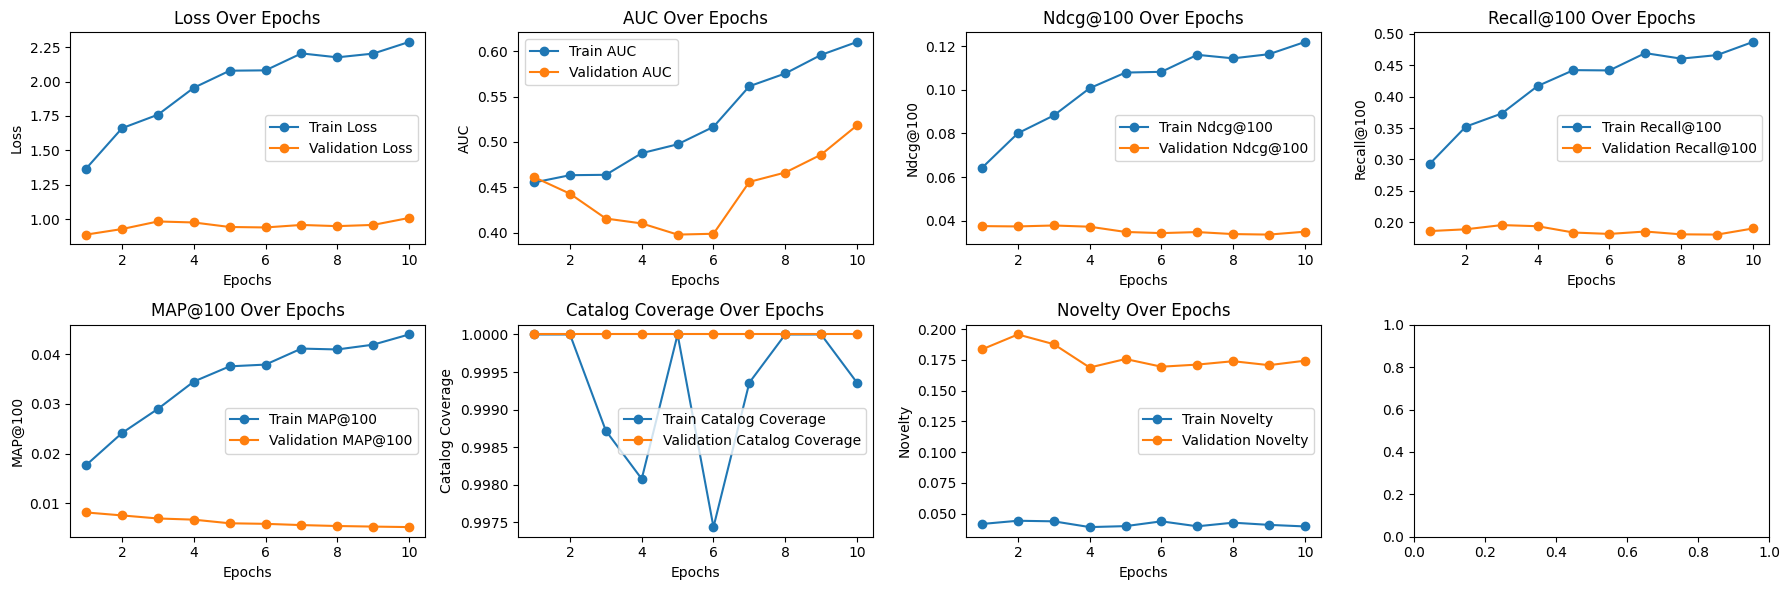

In [47]:
_history = train_evaluation_clbk.get_records()
_history_val = valid_evaluation_clbk.get_records()
AUC_TERM = [k for k in _history if k.startswith('auc')][0]
_metrics  = {
    'Loss': 'loss',
    'AUC': AUC_TERM,
    'Ndcg@100': 'ndcg_at_100',
    'Recall@100': 'recall_at_100',
    'MAP@100':'map_at_100',
    'Catalog Coverage': 'coverage',
    'Novelty':'novelty'
}
print('Plot for model', VERSION)
plot_metrics(_history, _history_val, _metrics)


Plot for model v10


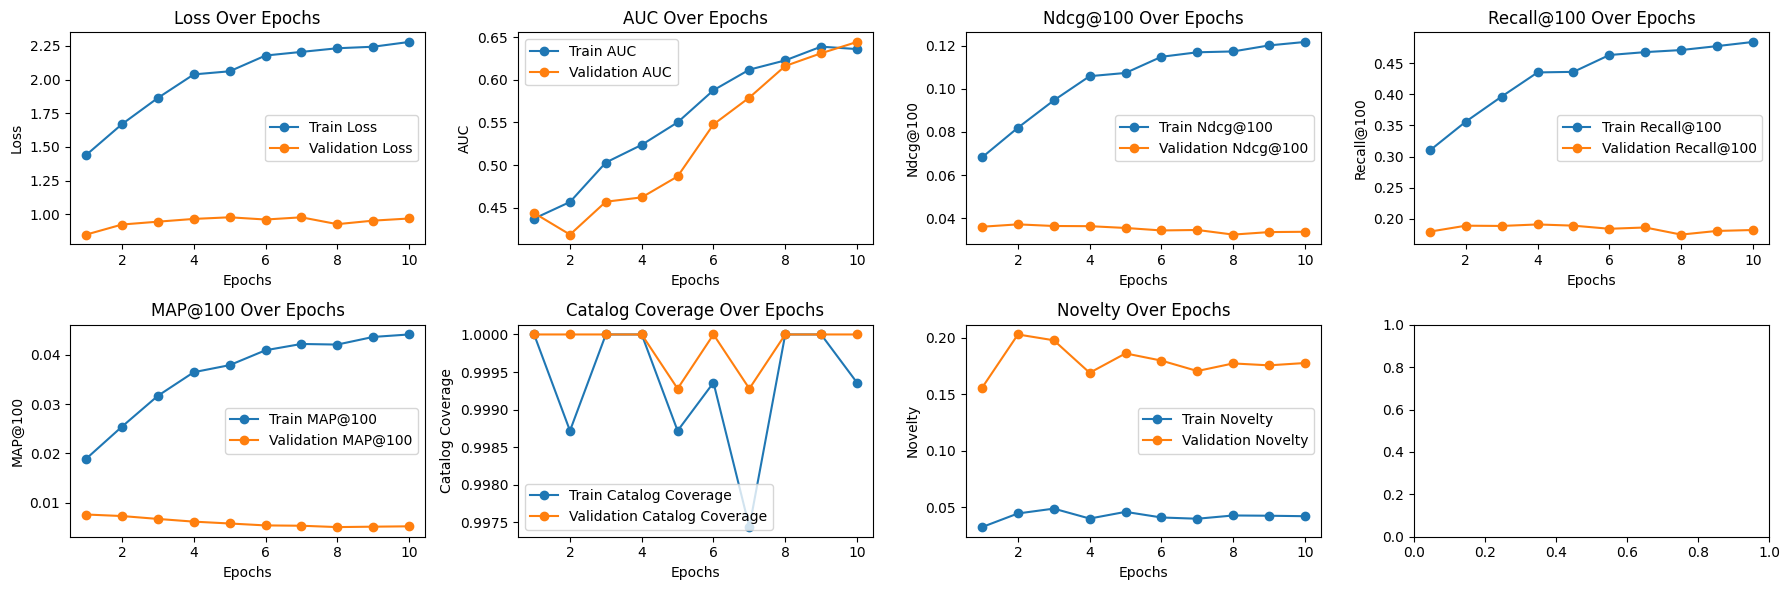

In [ ]:
_history = train_evaluation_clbk.get_records()
_history_val = valid_evaluation_clbk.get_records()
AUC_TERM = [k for k in _history if k.startswith('auc')][0]
_metrics  = {
    'Loss': 'loss',
    'AUC': AUC_TERM,
    'Ndcg@100': 'ndcg_at_100',
    'Recall@100': 'recall_at_100',
    'MAP@100':'map_at_100',
    'Catalog Coverage': 'coverage',
    'Novelty':'novelty'
}
print('Plot for model', VERSION)
plot_metrics(_history, _history_val, _metrics)


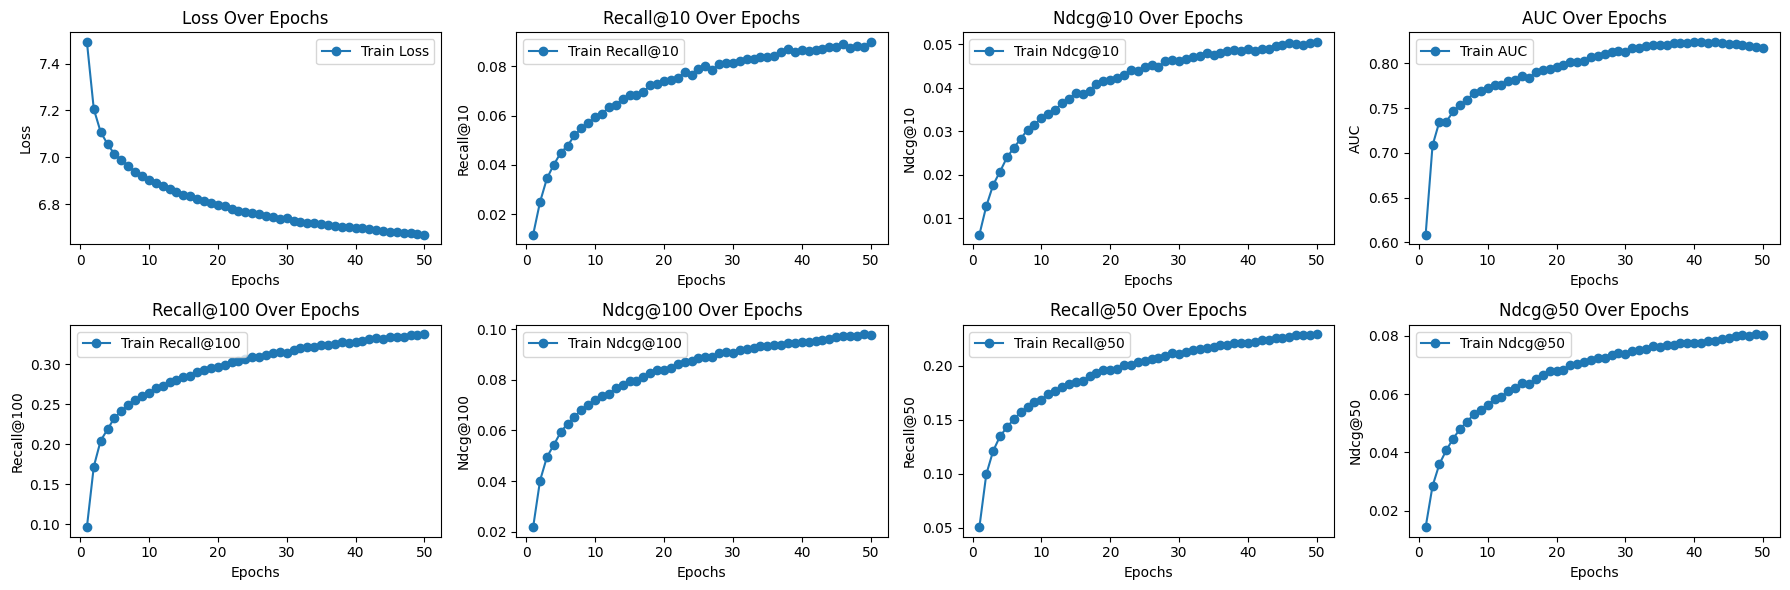

In [48]:
_history = merge_model_history(*history)
# AUC_TERM = [k for k in _history if k.startswith('auc')][0]
METRIC_AT = {'@'.join([k.split('_')[0].title(), k.split('_')[-1]]):k for k in _history if k.startswith('recall') or k.startswith('ndcg')}
val_history = { k[4:]:v for k,v in _history.items() if k.startswith('val')}
plot_metrics(_history, None, default_plot_metrics | {'AUC': 'auc', **METRIC_AT,})
# {'AUC': AUC_TERM, 'Recall@100': 'recall_at_100','NDCG@10': 'ndcg_at_10',}

### model_v5

In [49]:
VERSION = 'v5'

_tower_dim = [128, 128] # @param

_learning_rate = 0.01 # @param
_batch_size = 1024 * 2 # @param
_epochs = 50 # @param
_validation_batch_size = 2048 # @param
_sample_neg = _batch_size * 2 # @param
_validation_freq = 5 # @param
# _loss = 'categorical_crossentropy' # @param
_loss = 'bpr-max' # @param

_logq_sampling_correction = False # @param

embedding_dims = {
    'item': {
        'movie_id': 64,
        'genres': 8*2
    },
    'user': {
        'user_id': 64,
        'gender': 8,
        'occupation': 8*2
    }
}

In [50]:
if VERSION in models:
    raise RuntimeError('Reusing model version: ', VERSION)

In [51]:
from merlin.models.tf.outputs.sampling.in_batch import InBatchSamplerV2

sampler = [InBatchSamplerV2(_sample_neg)]

models[VERSION] = model = build_towers(
    train,
    tower_dim=_tower_dim,
    neg_sampler=sampler,
    embedding_dims=embedding_dims,
    logq_sampling_correction=_logq_sampling_correction,
    item_categorical=Tags.CATEGORICAL
)

train_evaluation_clbks[VERSION] = EvaluationCallback(period=5, topk=100, data=train, type_='Train', schema=train.schema)
valid_evaluation_clbks[VERSION] = EvaluationCallback(period=5, topk=100, data=valid, type_='Validation', schema=train.schema)
historys[VERSION] = []

TOP_K = [100, 50, 10]
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=_learning_rate),
    run_eagerly=False,
    metrics=topk_metrics_aggregator(TOP_K),
    loss=_loss,
)

#### model

In [52]:
history = historys[VERSION]
model = models[VERSION]
train_evaluation_clbk = train_evaluation_clbks[VERSION]
valid_evaluation_clbk = valid_evaluation_clbks[VERSION]

In [53]:
# %pdb on
history.append(
    model.fit(train, validation_data=valid, batch_size=_batch_size, epochs=_epochs,
                 validation_batch_size=_validation_batch_size, validation_freq=_validation_freq,
                 callbacks=[train_evaluation_clbk,
                            valid_evaluation_clbk],
                  verbose=1)
)

Epoch 1/50
35/35 [==============================] - 23s 297ms/step - loss: 8.4007 - auc: 0.6339 - recall_at_100: 0.0733 - mrr_at_100: 0.0052 - ndcg_at_100: 0.0165 - map_at_100: 0.0052 - precision_at_100: 7.3339e-04 - recall_at_50: 0.0384 - mrr_at_50: 0.0047 - ndcg_at_50: 0.0109 - map_at_50: 0.0047 - precision_at_50: 7.6762e-04 - recall_at_10: 0.0084 - mrr_at_10: 0.0035 - ndcg_at_10: 0.0046 - map_at_10: 0.0035 - precision_at_10: 8.4412e-04 - regularization_loss: 0.0000e+00 - loss_batch: 8.3409
Epoch 2/50
35/35 [==============================] - 5s 116ms/step - loss: 8.3610 - auc: 0.7445 - recall_at_100: 0.1754 - mrr_at_100: 0.0134 - ndcg_at_100: 0.0409 - map_at_100: 0.0134 - precision_at_100: 0.0018 - recall_at_50: 0.1003 - mrr_at_50: 0.0123 - ndcg_at_50: 0.0288 - map_at_50: 0.0123 - precision_at_50: 0.0020 - recall_at_10: 0.0255 - mrr_at_10: 0.0093 - ndcg_at_10: 0.0130 - map_at_10: 0.0093 - precision_at_10: 0.0026 - regularization_loss: 0.0000e+00 - loss_batch: 8.3020
Epoch 3/50
35/35 

69/69 [==============================] - 8s 29ms/step - loss: 1.3264 - auc: 0.5221 - recall_at_100: 0.2868 - mrr_at_100: 0.0179 - ndcg_at_100: 0.0633 - map_at_100: 0.0179 - precision_at_100: 0.0029 - recall_at_10: 0.0368 - mrr_at_10: 0.0113 - ndcg_at_10: 0.0171 - map_at_10: 0.0113 - precision_at_10: 0.0037 - regularization_loss: 0.0000e+00 - loss_batch: 1.3352
Candidate set rows: 943
Train dataset topk evaluation {'loss': 1.3264058828353882, 'auc': 0.5220791101455688, 'recall_at_100': 0.2886669933795929, 'mrr_at_100': 0.018114501610398293, 'ndcg_at_100': 0.06385612487792969, 'map_at_100': 0.018114501610398293, 'precision_at_100': 0.0028866699431091547, 'recall_at_10': 0.03727814182639122, 'mrr_at_10': 0.011390984989702702, 'ndcg_at_10': 0.0173043143004179, 'map_at_10': 0.011390984989702702, 'precision_at_10': 0.0037278137169778347, 'regularization_loss': 0.0, 'loss_batch': 1.7540100812911987, 'coverage': 1.0, 'novelty': 0.03767629549722322}
Candidate set rows: 1387


15/15 [==============================] - 3s 22ms/step - loss: 0.8356 - auc: 0.5228 - recall_at_100: 0.1775 - mrr_at_100: 0.0079 - ndcg_at_100: 0.0358 - map_at_100: 0.0079 - precision_at_100: 0.0018 - recall_at_10: 0.0149 - mrr_at_10: 0.0040 - ndcg_at_10: 0.0065 - map_at_10: 0.0040 - precision_at_10: 0.0015 - regularization_loss: 0.0000e+00 - loss_batch: 0.9036
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.8355849981307983, 'auc': 0.5227566361427307, 'recall_at_100': 0.18068744242191315, 'mrr_at_100': 0.00839339941740036, 'ndcg_at_100': 0.03682909905910492, 'map_at_100': 0.00839339941740036, 'precision_at_100': 0.0018068744102492929, 'recall_at_10': 0.015514243394136429, 'mrr_at_10': 0.004338437225669622, 'ndcg_at_10': 0.006877336651086807, 'map_at_10': 0.004338437225669622, 'precision_at_10': 0.0015514245023950934, 'regularization_loss': 0.0, 'loss_batch': 1.6147170066833496, 'coverage': 0.9971160778658976, 'novelty': 0.16368685992015275}
35/35 [================

69/69 [==============================] - 6s 26ms/step - loss: 1.5820 - auc: 0.5454 - recall_at_100: 0.3431 - mrr_at_100: 0.0246 - ndcg_at_100: 0.0792 - map_at_100: 0.0246 - precision_at_100: 0.0034 - recall_at_10: 0.0507 - mrr_at_10: 0.0163 - ndcg_at_10: 0.0242 - map_at_10: 0.0163 - precision_at_10: 0.0051 - regularization_loss: 0.0000e+00 - loss_batch: 1.5980
Candidate set rows: 943
Train dataset topk evaluation {'loss': 1.5819796323776245, 'auc': 0.5453653335571289, 'recall_at_100': 0.3458590805530548, 'mrr_at_100': 0.024741532281041145, 'ndcg_at_100': 0.07980793714523315, 'map_at_100': 0.024741532281041145, 'precision_at_100': 0.0034585902467370033, 'recall_at_10': 0.05234893411397934, 'mrr_at_10': 0.016464369371533394, 'ndcg_at_10': 0.0246900524944067, 'map_at_10': 0.016464369371533394, 'precision_at_10': 0.005234893877059221, 'regularization_loss': 0.0, 'loss_batch': 2.357438087463379, 'coverage': 1.0, 'novelty': 0.040553907022749754}
Candidate set rows: 1387


15/15 [==============================] - 3s 21ms/step - loss: 0.8531 - auc: 0.5113 - recall_at_100: 0.1762 - mrr_at_100: 0.0069 - ndcg_at_100: 0.0348 - map_at_100: 0.0069 - precision_at_100: 0.0018 - recall_at_10: 0.0123 - mrr_at_10: 0.0028 - ndcg_at_10: 0.0049 - map_at_10: 0.0028 - precision_at_10: 0.0012 - regularization_loss: 0.0000e+00 - loss_batch: 0.9184
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.8531426787376404, 'auc': 0.511329174041748, 'recall_at_100': 0.18396416306495667, 'mrr_at_100': 0.00756926229223609, 'ndcg_at_100': 0.0366818793118, 'map_at_100': 0.00756926229223609, 'precision_at_100': 0.0018396415980532765, 'recall_at_10': 0.01431055273860693, 'mrr_at_10': 0.003348257625475526, 'ndcg_at_10': 0.005840278696268797, 'map_at_10': 0.003348257625475526, 'precision_at_10': 0.0014310553669929504, 'regularization_loss': 0.0, 'loss_batch': 1.6005409955978394, 'coverage': 0.9985580389329488, 'novelty': 0.1783957623912221}
35/35 [=======================

69/69 [==============================] - 25s 17ms/step - loss: 1.6910 - auc: 0.5523 - recall_at_100: 0.3696 - mrr_at_100: 0.0295 - ndcg_at_100: 0.0882 - map_at_100: 0.0295 - precision_at_100: 0.0037 - recall_at_10: 0.0628 - mrr_at_10: 0.0207 - ndcg_at_10: 0.0304 - map_at_10: 0.0207 - precision_at_10: 0.0063 - regularization_loss: 0.0000e+00 - loss_batch: 1.7060
Candidate set rows: 943
Train dataset topk evaluation {'loss': 1.6910250186920166, 'auc': 0.5522711873054504, 'recall_at_100': 0.3706589639186859, 'mrr_at_100': 0.02915828675031662, 'ndcg_at_100': 0.0880507305264473, 'map_at_100': 0.02915828675031662, 'precision_at_100': 0.0037065891083329916, 'recall_at_10': 0.061721887439489365, 'mrr_at_10': 0.02030448615550995, 'ndcg_at_10': 0.02982289530336857, 'map_at_10': 0.02030448615550995, 'precision_at_10': 0.006172187626361847, 'regularization_loss': 0.0, 'loss_batch': 2.417698383331299, 'coverage': 1.0, 'novelty': 0.03804260125867355}
Candidate set rows: 1387


15/15 [==============================] - 4s 30ms/step - loss: 0.8077 - auc: 0.5064 - recall_at_100: 0.1673 - mrr_at_100: 0.0062 - ndcg_at_100: 0.0327 - map_at_100: 0.0062 - precision_at_100: 0.0017 - recall_at_10: 0.0110 - mrr_at_10: 0.0024 - ndcg_at_10: 0.0044 - map_at_10: 0.0024 - precision_at_10: 0.0011 - regularization_loss: 0.0000e+00 - loss_batch: 0.8690
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.8076563477516174, 'auc': 0.5064057111740112, 'recall_at_100': 0.17386652529239655, 'mrr_at_100': 0.006736868526786566, 'ndcg_at_100': 0.034234631806612015, 'map_at_100': 0.006736868526786566, 'precision_at_100': 0.0017386652762070298, 'recall_at_10': 0.011903169564902782, 'mrr_at_10': 0.002722290111705661, 'ndcg_at_10': 0.004791263025254011, 'map_at_10': 0.002722290111705661, 'precision_at_10': 0.0011903168633580208, 'regularization_loss': 0.0, 'loss_batch': 1.510839581489563, 'coverage': 0.9992790194664743, 'novelty': 0.17264738191138776}
35/35 [==============

69/69 [==============================] - 5s 18ms/step - loss: 1.7732 - auc: 0.5554 - recall_at_100: 0.3903 - mrr_at_100: 0.0312 - ndcg_at_100: 0.0934 - map_at_100: 0.0312 - precision_at_100: 0.0039 - recall_at_10: 0.0671 - mrr_at_10: 0.0217 - ndcg_at_10: 0.0322 - map_at_10: 0.0217 - precision_at_10: 0.0067 - regularization_loss: 0.0000e+00 - loss_batch: 1.7901
Candidate set rows: 943
Train dataset topk evaluation {'loss': 1.773201823234558, 'auc': 0.5553628206253052, 'recall_at_100': 0.3893621265888214, 'mrr_at_100': 0.031375642865896225, 'ndcg_at_100': 0.09340032935142517, 'map_at_100': 0.031375642865896225, 'precision_at_100': 0.0038936217315495014, 'recall_at_10': 0.06746246665716171, 'mrr_at_10': 0.02197432890534401, 'ndcg_at_10': 0.032414510846138, 'map_at_10': 0.02197432890534401, 'precision_at_10': 0.006746247876435518, 'regularization_loss': 0.0, 'loss_batch': 2.590970754623413, 'coverage': 1.0, 'novelty': 0.04050339317928013}
Candidate set rows: 1387


15/15 [==============================] - 3s 21ms/step - loss: 0.7945 - auc: 0.4901 - recall_at_100: 0.1641 - mrr_at_100: 0.0063 - ndcg_at_100: 0.0321 - map_at_100: 0.0063 - precision_at_100: 0.0016 - recall_at_10: 0.0095 - mrr_at_10: 0.0025 - ndcg_at_10: 0.0041 - map_at_10: 0.0025 - precision_at_10: 9.4970e-04 - regularization_loss: 0.0000e+00 - loss_batch: 0.8461
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.7944779992103577, 'auc': 0.49010369181632996, 'recall_at_100': 0.17092417180538177, 'mrr_at_100': 0.0065697417594492435, 'ndcg_at_100': 0.0336051844060421, 'map_at_100': 0.0065697417594492435, 'precision_at_100': 0.0017092416528612375, 'recall_at_10': 0.010632606223225594, 'mrr_at_10': 0.0025431958492845297, 'ndcg_at_10': 0.004375780001282692, 'map_at_10': 0.0025431958492845297, 'precision_at_10': 0.001063260599039495, 'regularization_loss': 0.0, 'loss_batch': 1.3857759237289429, 'coverage': 1.0, 'novelty': 0.17593283582089553}
35/35 [======================

69/69 [==============================] - 5s 18ms/step - loss: 1.7978 - auc: 0.5610 - recall_at_100: 0.3966 - mrr_at_100: 0.0324 - ndcg_at_100: 0.0958 - map_at_100: 0.0324 - precision_at_100: 0.0040 - recall_at_10: 0.0714 - mrr_at_10: 0.0228 - ndcg_at_10: 0.0339 - map_at_10: 0.0228 - precision_at_10: 0.0071 - regularization_loss: 0.0000e+00 - loss_batch: 1.8156
Candidate set rows: 943
Train dataset topk evaluation {'loss': 1.7977665662765503, 'auc': 0.560985803604126, 'recall_at_100': 0.3954445719718933, 'mrr_at_100': 0.03277800977230072, 'ndcg_at_100': 0.09586573392152786, 'map_at_100': 0.03277800977230072, 'precision_at_100': 0.003954445477575064, 'recall_at_10': 0.07137973606586456, 'mrr_at_10': 0.023220952600240707, 'ndcg_at_10': 0.03429146111011505, 'map_at_10': 0.023220952600240707, 'precision_at_10': 0.007137973792850971, 'regularization_loss': 0.0, 'loss_batch': 2.661006212234497, 'coverage': 1.0, 'novelty': 0.041287215411558664}
Candidate set rows: 1387


15/15 [==============================] - 3s 22ms/step - loss: 0.7922 - auc: 0.4787 - recall_at_100: 0.1678 - mrr_at_100: 0.0059 - ndcg_at_100: 0.0324 - map_at_100: 0.0059 - precision_at_100: 0.0017 - recall_at_10: 0.0096 - mrr_at_10: 0.0020 - ndcg_at_10: 0.0037 - map_at_10: 0.0020 - precision_at_10: 9.6448e-04 - regularization_loss: 0.0000e+00 - loss_batch: 0.8468
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.7921935319900513, 'auc': 0.478671669960022, 'recall_at_100': 0.1700548380613327, 'mrr_at_100': 0.006174137350171804, 'ndcg_at_100': 0.03301568701863289, 'map_at_100': 0.006174137350171804, 'precision_at_100': 0.0017005483387038112, 'recall_at_10': 0.010097633115947247, 'mrr_at_10': 0.0022681462578475475, 'ndcg_at_10': 0.004035636316984892, 'map_at_10': 0.0022681462578475475, 'precision_at_10': 0.0010097632184624672, 'regularization_loss': 0.0, 'loss_batch': 1.4180774688720703, 'coverage': 0.9992790194664743, 'novelty': 0.17849706606095023}
35/35 [==========

69/69 [==============================] - 5s 19ms/step - loss: 1.8589 - auc: 0.5680 - recall_at_100: 0.4097 - mrr_at_100: 0.0339 - ndcg_at_100: 0.0992 - map_at_100: 0.0339 - precision_at_100: 0.0041 - recall_at_10: 0.0745 - mrr_at_10: 0.0241 - ndcg_at_10: 0.0357 - map_at_10: 0.0241 - precision_at_10: 0.0075 - regularization_loss: 0.0000e+00 - loss_batch: 1.8764
Candidate set rows: 943
Train dataset topk evaluation {'loss': 1.8589383363723755, 'auc': 0.5680277943611145, 'recall_at_100': 0.40901967883110046, 'mrr_at_100': 0.034526754170656204, 'ndcg_at_100': 0.09970109909772873, 'map_at_100': 0.034526754170656204, 'precision_at_100': 0.004090196918696165, 'recall_at_10': 0.07549642771482468, 'mrr_at_10': 0.02473076805472374, 'ndcg_at_10': 0.03639938682317734, 'map_at_10': 0.02473076805472374, 'precision_at_10': 0.007549642585217953, 'regularization_loss': 0.0, 'loss_batch': 2.703737258911133, 'coverage': 1.0, 'novelty': 0.039083222811671085}
Candidate set rows: 1387


15/15 [==============================] - 3s 21ms/step - loss: 0.8090 - auc: 0.4864 - recall_at_100: 0.1633 - mrr_at_100: 0.0059 - ndcg_at_100: 0.0316 - map_at_100: 0.0059 - precision_at_100: 0.0016 - recall_at_10: 0.0084 - mrr_at_10: 0.0022 - ndcg_at_10: 0.0036 - map_at_10: 0.0022 - precision_at_10: 8.4099e-04 - regularization_loss: 0.0000e+00 - loss_batch: 0.8583
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.8090010285377502, 'auc': 0.4864235520362854, 'recall_at_100': 0.1735990345478058, 'mrr_at_100': 0.006448930595070124, 'ndcg_at_100': 0.03378918021917343, 'map_at_100': 0.006448930595070124, 'precision_at_100': 0.0017359904013574123, 'recall_at_10': 0.009295172058045864, 'mrr_at_10': 0.0024029246997088194, 'ndcg_at_10': 0.0039640371687710285, 'map_at_10': 0.0024029246997088194, 'precision_at_10': 0.0009295170893892646, 'regularization_loss': 0.0, 'loss_batch': 1.3732953071594238, 'coverage': 1.0, 'novelty': 0.17293233082706766}
35/35 [=======================

69/69 [==============================] - 4s 18ms/step - loss: 1.8642 - auc: 0.5602 - recall_at_100: 0.4089 - mrr_at_100: 0.0342 - ndcg_at_100: 0.0994 - map_at_100: 0.0342 - precision_at_100: 0.0041 - recall_at_10: 0.0746 - mrr_at_10: 0.0244 - ndcg_at_10: 0.0359 - map_at_10: 0.0244 - precision_at_10: 0.0075 - regularization_loss: 0.0000e+00 - loss_batch: 1.8829
Candidate set rows: 943
Train dataset topk evaluation {'loss': 1.864174485206604, 'auc': 0.5602129697799683, 'recall_at_100': 0.4102732241153717, 'mrr_at_100': 0.034978676587343216, 'ndcg_at_100': 0.10036864131689072, 'map_at_100': 0.034978676587343216, 'precision_at_100': 0.004102732054889202, 'recall_at_10': 0.07618016749620438, 'mrr_at_10': 0.025111624971032143, 'ndcg_at_10': 0.0368490070104599, 'map_at_10': 0.025111624971032143, 'precision_at_10': 0.007618017494678497, 'regularization_loss': 0.0, 'loss_batch': 2.771230697631836, 'coverage': 1.0, 'novelty': 0.03883215285784879}
Candidate set rows: 1387


15/15 [==============================] - 5s 32ms/step - loss: 0.7850 - auc: 0.4682 - recall_at_100: 0.1655 - mrr_at_100: 0.0058 - ndcg_at_100: 0.0318 - map_at_100: 0.0058 - precision_at_100: 0.0017 - recall_at_10: 0.0085 - mrr_at_10: 0.0020 - ndcg_at_10: 0.0035 - map_at_10: 0.0020 - precision_at_10: 8.4821e-04 - regularization_loss: 0.0000e+00 - loss_batch: 0.8318
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.7849575281143188, 'auc': 0.46815258264541626, 'recall_at_100': 0.16844990849494934, 'mrr_at_100': 0.0063272020779550076, 'ndcg_at_100': 0.03284625709056854, 'map_at_100': 0.0063272020779550076, 'precision_at_100': 0.001684499206021428, 'recall_at_10': 0.010030761361122131, 'mrr_at_10': 0.002450822852551937, 'ndcg_at_10': 0.00416937842965126, 'map_at_10': 0.002450822852551937, 'precision_at_10': 0.0010030762059614062, 'regularization_loss': 0.0, 'loss_batch': 1.3218417167663574, 'coverage': 1.0, 'novelty': 0.17955064737242954}
35/35 [========================

69/69 [==============================] - 4s 18ms/step - loss: 1.9131 - auc: 0.5686 - recall_at_100: 0.4174 - mrr_at_100: 0.0347 - ndcg_at_100: 0.1013 - map_at_100: 0.0347 - precision_at_100: 0.0042 - recall_at_10: 0.0767 - mrr_at_10: 0.0246 - ndcg_at_10: 0.0366 - map_at_10: 0.0246 - precision_at_10: 0.0077 - regularization_loss: 0.0000e+00 - loss_batch: 1.9309
Candidate set rows: 943
Train dataset topk evaluation {'loss': 1.9131065607070923, 'auc': 0.5686045289039612, 'recall_at_100': 0.42094242572784424, 'mrr_at_100': 0.03564112260937691, 'ndcg_at_100': 0.10274453461170197, 'map_at_100': 0.03564112260937691, 'precision_at_100': 0.004209424369037151, 'recall_at_10': 0.07808894664049149, 'mrr_at_10': 0.025524821132421494, 'ndcg_at_10': 0.03760232403874397, 'map_at_10': 0.025524821132421494, 'precision_at_10': 0.007808895315974951, 'regularization_loss': 0.0, 'loss_batch': 2.7749788761138916, 'coverage': 1.0, 'novelty': 0.042922166590805645}
Candidate set rows: 1387


15/15 [==============================] - 4s 30ms/step - loss: 0.7640 - auc: 0.4845 - recall_at_100: 0.1624 - mrr_at_100: 0.0052 - ndcg_at_100: 0.0307 - map_at_100: 0.0052 - precision_at_100: 0.0016 - recall_at_10: 0.0080 - mrr_at_10: 0.0016 - ndcg_at_10: 0.0030 - map_at_10: 0.0016 - precision_at_10: 8.0180e-04 - regularization_loss: 0.0000e+00 - loss_batch: 0.8100
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.7640267014503479, 'auc': 0.48447293043136597, 'recall_at_100': 0.16383576393127441, 'mrr_at_100': 0.005852480884641409, 'ndcg_at_100': 0.03165719658136368, 'map_at_100': 0.005852480884641409, 'precision_at_100': 0.001638357643969357, 'recall_at_10': 0.009562659077346325, 'mrr_at_10': 0.0021646807435899973, 'ndcg_at_10': 0.003826332511380315, 'map_at_10': 0.0021646807435899973, 'precision_at_10': 0.0009562658960931003, 'regularization_loss': 0.0, 'loss_batch': 1.2911494970321655, 'coverage': 0.9992790194664743, 'novelty': 0.18421566712248486}
35/35 [========

69/69 [==============================] - 4s 18ms/step - loss: 1.9059 - auc: 0.5709 - recall_at_100: 0.4186 - mrr_at_100: 0.0365 - ndcg_at_100: 0.1032 - map_at_100: 0.0365 - precision_at_100: 0.0042 - recall_at_10: 0.0795 - mrr_at_10: 0.0265 - ndcg_at_10: 0.0387 - map_at_10: 0.0265 - precision_at_10: 0.0080 - regularization_loss: 0.0000e+00 - loss_batch: 1.9249
Candidate set rows: 943
Train dataset topk evaluation {'loss': 1.9059466123580933, 'auc': 0.5708969235420227, 'recall_at_100': 0.41994529962539673, 'mrr_at_100': 0.03643917292356491, 'ndcg_at_100': 0.10341310501098633, 'map_at_100': 0.03643917292356491, 'precision_at_100': 0.004199452698230743, 'recall_at_10': 0.07958462834358215, 'mrr_at_10': 0.026303021237254143, 'ndcg_at_10': 0.03856746479868889, 'map_at_10': 0.026303021237254143, 'precision_at_10': 0.007958462461829185, 'regularization_loss': 0.0, 'loss_batch': 2.8236377239227295, 'coverage': 0.9993593850096092, 'novelty': 0.04123125355253377}
Candidate set rows: 1387


15/15 [==============================] - 3s 31ms/step - loss: 0.7386 - auc: 0.4658 - recall_at_100: 0.1527 - mrr_at_100: 0.0052 - ndcg_at_100: 0.0292 - map_at_100: 0.0052 - precision_at_100: 0.0015 - recall_at_10: 0.0078 - mrr_at_10: 0.0018 - ndcg_at_10: 0.0032 - map_at_10: 0.0018 - precision_at_10: 7.7795e-04 - regularization_loss: 0.0000e+00 - loss_batch: 0.7825
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.7386467456817627, 'auc': 0.4658207595348358, 'recall_at_100': 0.15828540921211243, 'mrr_at_100': 0.0054872967302799225, 'ndcg_at_100': 0.030414443463087082, 'map_at_100': 0.0054872967302799225, 'precision_at_100': 0.0015828540781512856, 'recall_at_10': 0.008358967490494251, 'mrr_at_10': 0.001879149116575718, 'ndcg_at_10': 0.00334717845544219, 'map_at_10': 0.001879149116575718, 'precision_at_10': 0.0008358967606909573, 'regularization_loss': 0.0, 'loss_batch': 1.2413694858551025, 'coverage': 0.9985580389329488, 'novelty': 0.17802529733811592}
35/35 [========

69/69 [==============================] - 6s 22ms/step - loss: 1.9152 - auc: 0.5754 - recall_at_100: 0.4208 - mrr_at_100: 0.0352 - ndcg_at_100: 0.1025 - map_at_100: 0.0352 - precision_at_100: 0.0042 - recall_at_10: 0.0780 - mrr_at_10: 0.0250 - ndcg_at_10: 0.0372 - map_at_10: 0.0250 - precision_at_10: 0.0078 - regularization_loss: 0.0000e+00 - loss_batch: 1.9334
Candidate set rows: 943
Train dataset topk evaluation {'loss': 1.9152450561523438, 'auc': 0.5753905177116394, 'recall_at_100': 0.4219822883605957, 'mrr_at_100': 0.03655857592821121, 'ndcg_at_100': 0.10389042645692825, 'map_at_100': 0.03655857592821121, 'precision_at_100': 0.004219822585582733, 'recall_at_10': 0.07988376170396805, 'mrr_at_10': 0.02631722018122673, 'ndcg_at_10': 0.03863616660237312, 'map_at_10': 0.02631722018122673, 'precision_at_10': 0.00798837747424841, 'regularization_loss': 0.0, 'loss_batch': 2.7972304821014404, 'coverage': 1.0, 'novelty': 0.04059056473829201}
Candidate set rows: 1387


15/15 [==============================] - 5s 20ms/step - loss: 0.7376 - auc: 0.4741 - recall_at_100: 0.1523 - mrr_at_100: 0.0053 - ndcg_at_100: 0.0292 - map_at_100: 0.0053 - precision_at_100: 0.0015 - recall_at_10: 0.0091 - mrr_at_10: 0.0019 - ndcg_at_10: 0.0035 - map_at_10: 0.0019 - precision_at_10: 9.0907e-04 - regularization_loss: 0.0000e+00 - loss_batch: 0.7928
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.7375985980033875, 'auc': 0.4741288721561432, 'recall_at_100': 0.15808479487895966, 'mrr_at_100': 0.00576480757445097, 'ndcg_at_100': 0.03068637289106846, 'map_at_100': 0.00576480757445097, 'precision_at_100': 0.001580847892910242, 'recall_at_10': 0.010298248380422592, 'mrr_at_10': 0.0022421935573220253, 'ndcg_at_10': 0.004057964310050011, 'map_at_10': 0.0022421935573220253, 'precision_at_10': 0.0010298247216269374, 'regularization_loss': 0.0, 'loss_batch': 1.3696810007095337, 'coverage': 0.9971160778658976, 'novelty': 0.1716105550500455}
35/35 [============

#### analysis

In [54]:
history = historys[VERSION]
model = models[VERSION]
train_evaluation_clbk = train_evaluation_clbks[VERSION]
valid_evaluation_clbk = valid_evaluation_clbks[VERSION]

Plot for model v5


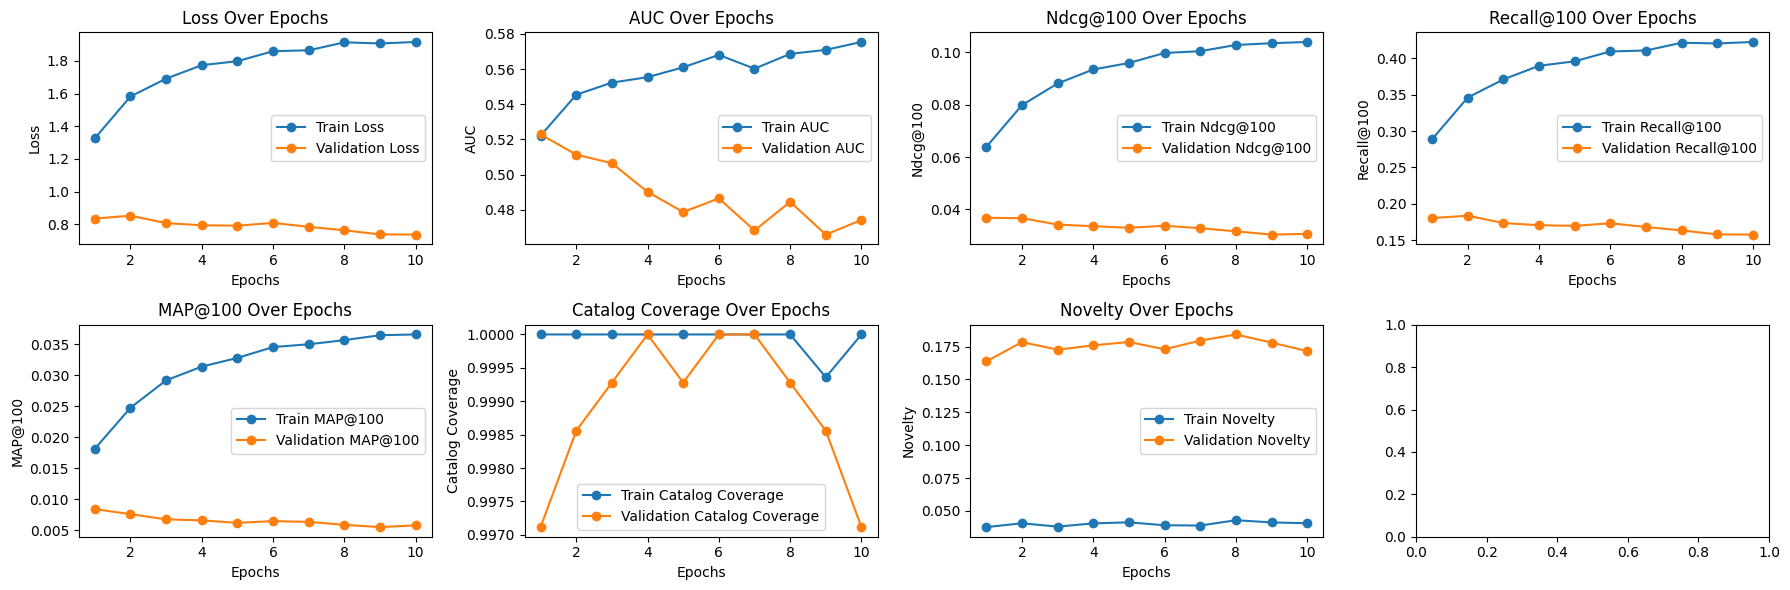

In [55]:
_history = train_evaluation_clbk.get_records()
_history_val = valid_evaluation_clbk.get_records()
AUC_TERM = [k for k in _history if k.startswith('auc')][0]
_metrics  = {
    'Loss': 'loss',
    'AUC': AUC_TERM,
    'Ndcg@100': 'ndcg_at_100',
    'Recall@100': 'recall_at_100',
    'MAP@100':'map_at_100',
    'Catalog Coverage': 'coverage',
    'Novelty':'novelty'
}
print('Plot for model', VERSION)
plot_metrics(_history, _history_val, _metrics)


Plot for model v10


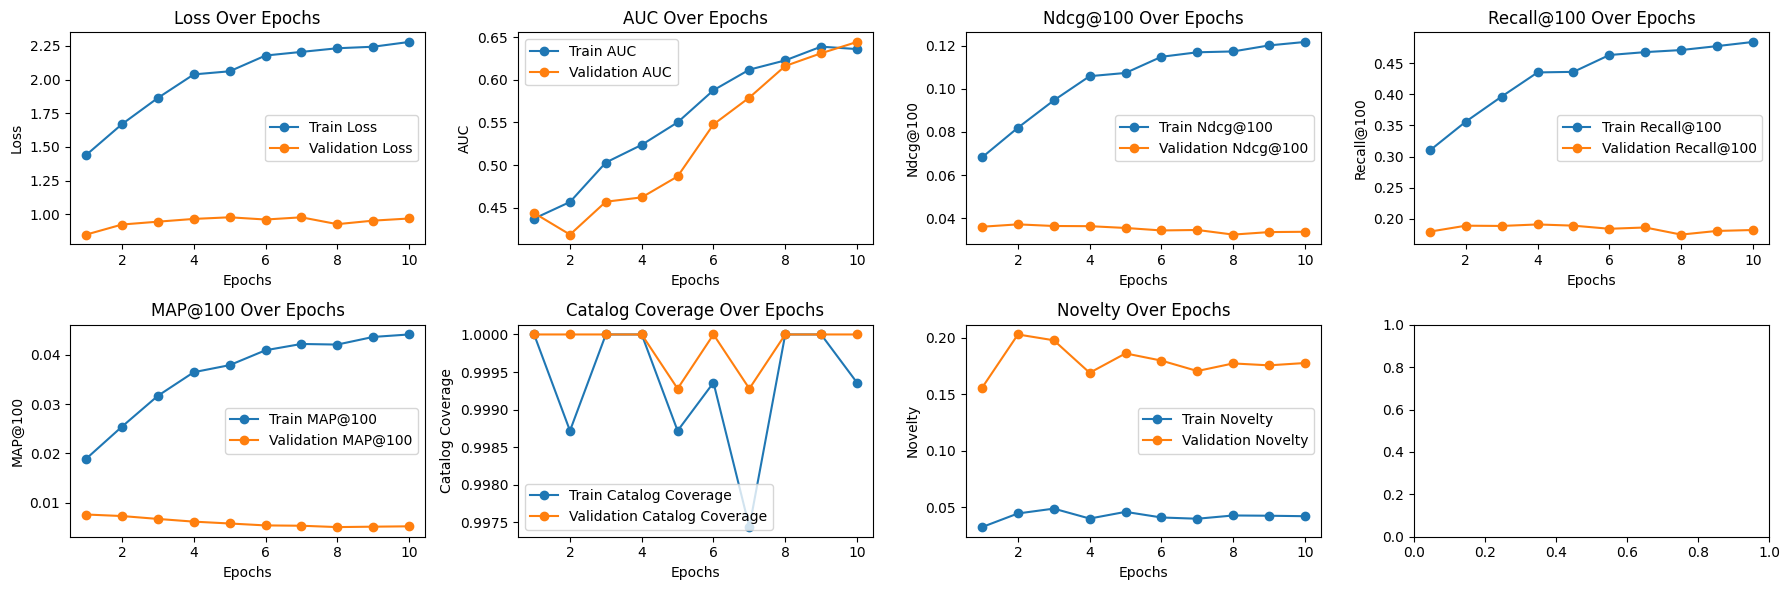

In [ ]:
_history = train_evaluation_clbk.get_records()
_history_val = valid_evaluation_clbk.get_records()
AUC_TERM = [k for k in _history if k.startswith('auc')][0]
_metrics  = {
    'Loss': 'loss',
    'AUC': AUC_TERM,
    'Ndcg@100': 'ndcg_at_100',
    'Recall@100': 'recall_at_100',
    'MAP@100':'map_at_100',
    'Catalog Coverage': 'coverage',
    'Novelty':'novelty'
}
print('Plot for model', VERSION)
plot_metrics(_history, _history_val, _metrics)


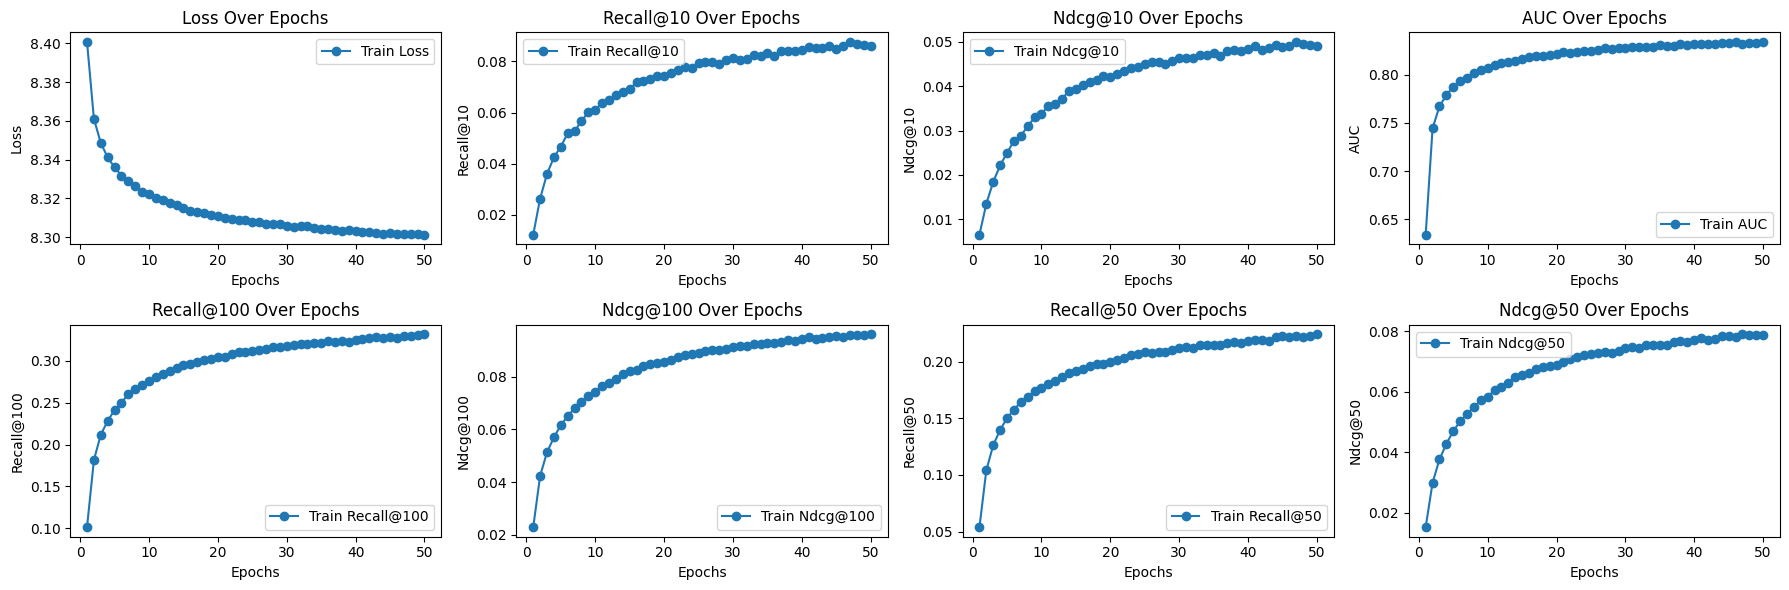

In [56]:
_history = merge_model_history(*history)
# AUC_TERM = [k for k in _history if k.startswith('auc')][0]
METRIC_AT = {'@'.join([k.split('_')[0].title(), k.split('_')[-1]]):k for k in _history if k.startswith('recall') or k.startswith('ndcg')}
val_history = { k[4:]:v for k,v in _history.items() if k.startswith('val')}
plot_metrics(_history, None, default_plot_metrics | {'AUC': 'auc', **METRIC_AT,})
# {'AUC': AUC_TERM, 'Recall@100': 'recall_at_100','NDCG@10': 'ndcg_at_10',}